# *Modern Deep Learning for Tabular Data*, Chapter 2

**Classical Machine Learning Principles and Methods**

This notebook contains the complementary code discussed in Chapter 2 of *Modern Deep Learning for Tabular Data*.

External Kaggle links to datasets used in this notebook:
- [Amazon US Software Reviews Dataset](https://www.kaggle.com/washingtongold/amazon-us-software-reviews)
- [OOD Genomics Dataset](https://www.kaggle.com/washingtongold/cleaned-genomics-data)

You can download these datasets from Kaggle, or import these notebooks into Kaggle and connect them internally.

---

## Imports

In [ ]:
# data management
import numpy as np                   # for linear algebra
import pandas as pd                  # for tabular data manipulation and processing
import category_encoders             # for categorical encoding
from skimage import io               # for input/output processing

# machine learning
import sklearn                       # for data prep and classical ML
import tensorflow as tf              # for deep learning
from tensorflow import keras         # for deep learning

# data visualization and graphics
import matplotlib.pyplot as plt      # for visualization fundamentals
import seaborn as sns                # for pretty visualizations
sns.set_palette("magma")
import cv2                           # for image manipulation

# misc
from tqdm.notebook import tqdm       # for progress bars
import math                          # for calculation
import sys                           # for system manipulation
import os                            # for file manipulation

ModuleNotFoundError: ignored

---

## Data Storage and Manipulation

### TensorFlow Datasets

#### Creating a TensorFlow Dataset

In [ ]:
arr1 = [1, 2, 3]
data1 = tf.data.Dataset.from_tensor_slices(arr1)

arr2 = np.array([1, 2, 3])
data2 = tf.data.Dataset.from_tensor_slices(arr2)

print(data1)
print(data2)

2022-03-07 22:09:19.039738: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-07 22:09:19.138324: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-07 22:09:19.138996: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-07 22:09:19.141433: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

<TensorSliceDataset shapes: (), types: tf.int32>
<TensorSliceDataset shapes: (), types: tf.int64>


In [ ]:
arr = np.arange(2*3*4).reshape((2, 3, 4))
data = tf.data.Dataset.from_tensor_slices(arr)
print(data)

arr = np.arange(2*3*4).reshape((2, 3, 4))
data = tf.data.Dataset.from_tensors(arr)
print(data)

<TensorSliceDataset shapes: (3, 4), types: tf.int64>
<TensorDataset shapes: (2, 3, 4), types: tf.int64>


#### TensorFlow Sequence Datasets

Required methods in a TensorFlow Sequence dataset.

In [ ]:
class CustomData(tf.keras.utils.Sequence):

    def __init__(self):
        ...
        # set up internal variables
        
    def __len__(self):
        ...
        # return the number of batches
    
    def __getitem__(self, index):
        ...
        # return a request chunk of the data

Example good practice setup for a TensorFlow Sequence dataset:

In [ ]:
class CustomData(tf.keras.utils.Sequence):

    def __init__(self, param1, param2, batch_size):
        self.param1 = param1
        self.param2 = param2
        self.batch_size = batch_size
        self.x_data = ...
        self.y_data = ...
        self.train_indices = ...
        self.valid_indices = ...
        self.epoch = 1
          
    def __len__(self):
        return len(self.x_data) // self.batch_size
    
    def __getitem__(self, index):
        start = index*self.batch_size
        end = (index+1)*self.batch_size
        relevant_indices = self.train_indices[start:end]
        x_ret = self.x_data[relevant_indices]
        y_ret = self.y_data[relevant_indices]
        return x_ret, y_ret

    def on_epoch_end(self):
        self.param1 = update(param1)
        self.epoch += 1

Excerpt of dataset used to keep track of training history.

In [ ]:
class CustomData(tf.keras.utils.Sequence):

    def __init__(self, model, k, etc):
        self.model = model
        self.epochs = 1
        self.k = k
        self.train_hist = []
        self.valid_hist = []
        ...

def on_epoch_end(self):
    if self.epochs % k == 0:
        self.train_hist.append(model.eval(train))
        self.valid_hist.append(model.eval(valid))
        self.epochs += 1

---

### Handling Large Datasets

#### Datasets Which Fit in Memory
##### H5 Files

For all other code under the "Handling Large Datasets" Section, refer to the book

In [ ]:
"import h5py
import numpy as np
# the hdf5 extension simply means the 5th version of the h5 format
with h5py.File("path/to/file.hdf5", "w") as f:
    group1 = f.create_dataset("group_name1", (100, 100), 
                               dtype="i8") # int8
    group2 = f.create_dataset("group_name2", (100, 100), 
                               dtype="i8") # int8
    # optional argument "data" to create dataset from np arrays

group1[10, 10] = 10
group1[2, 50:60] = np.arrange(10)

f = h5py.File("path/to/file.hdf5", "r")
# list out the "dataset keys"
f.keys()
# access a certain dataset using key-value pairs
f["group1"][:] # retrieves everything from group 1

---

## Data Encoding

### Discrete Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/hjhuney/Data/master/AmesHousing/train.csv')
df = df.dropna(axis=1, how='any')
df = df[['MSSubClass', 'MSZoning', 'LotArea', 'Street',
         'LotShape', 'OverallCond', 'YearBuilt', 'YrSold',
         'SaleCondition', 'SalePrice']]
df = df.dropna()
df

MSSubClass MSZoning  LotArea Street LotShape  OverallCond  YearBuilt  \
0             60       RL     8450   Pave      Reg            5       2003   
1             20       RL     9600   Pave      Reg            8       1976   
2             60       RL    11250   Pave      IR1            5       2001   
3             70       RL     9550   Pave      IR1            5       1915   
4             60       RL    14260   Pave      IR1            5       2000   
...          ...      ...      ...    ...      ...          ...        ...   
1455          60       RL     7917   Pave      Reg            5       1999   
1456          20       RL    13175   Pave      Reg            6       1978   
1457          70       RL     9042   Pave      Reg            9       1941   
1458          20       RL     9717   Pave      Reg            6       1950   
1459          20       RL     9937   Pave      Reg            6       1965   

      YrSold SaleCondition  SalePrice  
0       2008        Normal     208500  
1       2007        Normal     181500  
2       2008        Normal     223500  
3       2006       Abnorml     140000  
4       2008        Normal     250000  
...      ...           ...        ...  
1455    2007        Normal     175000  
1456    2010        Normal     210000  
1457    2010        Normal     266500  
1458    2010        Normal     142125  
1459    2008        Normal     147500  

[1460 rows x 10 columns]

#### Label Encoding

In [ ]:
def label_encoding(arr):
    unique = np.unique(arr)
    mapping = {elem:index for index, elem in enumerate(unique)}
    return np.array([mapping[elem] for elem in arr])

lot_shape = np.array(df['LotShape'])
encoded = label_encoding(lot_shape)

print(f'Original Array: {lot_shape}')
print(f'Encoded Array:  {encoded}')

Original Array: ['Reg' 'Reg' 'IR1' ... 'Reg' 'Reg' 'Reg']
Encoded Array:  [3 3 0 ... 3 3 3]


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded = encoder.fit_transform(df['LotShape'])

print(f'Original Array: {lot_shape}')
print(f'Encoded Array:  {encoded}')

Original Array: ['Reg' 'Reg' 'IR1' ... 'Reg' 'Reg' 'Reg']
Encoded Array:  [3 3 0 ... 3 3 3]


#### One-Hot Encoding

In [ ]:
def one_hot_encoding(arr):
    labels = label_encoding(arr)
    encoded = np.zeros((len(arr), len(np.unique(arr))))
    for i in range(len(arr)):
        encoded[i][labels[i]] = 1
    return encoded

lot_shape = np.array(df['LotShape'])
encoded = one_hot_encoding(lot_shape)

print(f'Original Array: {lot_shape}')
print(f'Encoded Array: \n{encoded}')

Original Array: ['Reg' 'Reg' 'IR1' ... 'Reg' 'Reg' 'Reg']
Encoded Array: 
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [ ]:
pd.get_dummies(df['LotShape']) 

IR1  IR2  IR3  Reg
0       0    0    0    1
1       0    0    0    1
2       1    0    0    0
3       1    0    0    0
4       1    0    0    0
...   ...  ...  ...  ...
1455    0    0    0    1
1456    0    0    0    1
1457    0    0    0    1
1458    0    0    0    1
1459    0    0    0    1

[1460 rows x 4 columns]

#### Binary Encoding

In [ ]:
def binary_encoding(arr):
    labels = label_encoding(arr)
    max_place = int(np.floor(np.math.log(np.max(labels), 2)))
    encoded = np.zeros((len(arr), max_place+1))
    for i in range(len(arr)):
        curr_val = labels[i]
        for curr_place in range(max_place, -1, -1):
            encoded[i][curr_place] = curr_val // (2 ** curr_place)
            curr_val = curr_val % (2 ** curr_place)
    return encoded

In [ ]:
binary_encoding(['a','b','c','c','d','d','d','e'] )

array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [0., 0., 1.]])

In [ ]:
from category_encoders.binary import BinaryEncoder
encoder = BinaryEncoder()
encoded = encoder.fit_transform(df['LotShape'])
encoded

LotShape_0  LotShape_1  LotShape_2
0              0           0           1
1              0           0           1
2              0           1           0
3              0           1           0
4              0           1           0
...          ...         ...         ...
1455           0           0           1
1456           0           0           1
1457           0           0           1
1458           0           0           1
1459           0           0           1

[1460 rows x 3 columns]

#### Frequency Encoding

In [ ]:
def frequency_encoding(arr):
    labels, counts = np.unique(arr, return_counts=True)
    counts = counts / np.sum(counts)
    mapping_dic = {labels[i]:counts[i] for i in range(len(counts))}
    mapping = lambda label:mapping_dic[label]
    return np.vectorize(mapping)(arr)

In [ ]:
np.round(frequency_encoding(np.array(df['LotShape'])), 2)

array([0.63, 0.63, 0.33, ..., 0.63, 0.63, 0.63])

In [ ]:
from category_encoders.count import CountEncoder
encoder = CountEncoder()
encoder.fit_transform(df['LotShape'])

LotShape
0          925
1          925
2          484
3          484
4          484
...        ...
1455       925
1456       925
1457       925
1458       925
1459       925

[1460 rows x 1 columns]

#### Target Encoding

In [ ]:
def target_encoding(x, y, mode='mean'):
    labels = np.unique(x)
    func = np.mean if mode=='mean' else np.median
    mapping_dic = {label:func(y[x==label]) for label in labels}
    mapping = lambda label:mapping_dic[label]
    return np.vectorize(mapping)(x)

In [ ]:
np.round(target_encoding(df['LotShape'], df['SalePrice']), 2)

array([164754.82, 164754.82, 206101.67, ..., 164754.82, 164754.82,
       164754.82])

In [ ]:
from category_encoders.target_encoder import TargetEncoder
encoder = TargetEncoder()
encoded = encoder.fit_transform(df['LotShape'], df['SalePrice'])
encoded

LotShape
0     164754.818378
1     164754.818378
2     206101.665289
3     206101.665289
4     206101.665289
...             ...
1455  164754.818378
1456  164754.818378
1457  164754.818378
1458  164754.818378
1459  164754.818378

[1460 rows x 1 columns]

#### Leave One Out Encoding

In [ ]:
def leave_one_out_encoding(x, y, mode='mean'):
    labels = np.unique(x)
    func = np.mean if mode=='mean' else np.median
    encoded = []
    for i in range(len(x)):
        leftout = y[np.arange(len(y)) != i]
        encoded.append(np.mean(leftout[x == x[i]]))
    return np.array(encoded)

In [ ]:
leave_one_out_encoding(df['LotShape'], df['SalePrice'])

array([164707.47510823, 164736.69588745, 206065.64389234, ...,
       164644.70454545, 164779.30952381, 164773.49242424])

In [ ]:
from category_encoders.leave_one_out import LeaveOneOutEncoder
encoder = LeaveOneOutEncoder ()
encoded = encoder.fit_transform(df['LotShape'], df['SalePrice'])
encoded

LotShape
0     164707.475108
1     164736.695887
2     206065.643892
3     206238.521739
4     206010.778468
...             ...
1455  164743.730519
1456  164705.851732
1457  164644.704545
1458  164779.309524
1459  164773.492424

[1460 rows x 1 columns]

#### James-Stein Encoding

In [ ]:
from category_encoders import JamesSteinEncoder
encoder = JamesSteinEncoder()
encoded = encoder.fit_transform(df['LotShape'], df['SalePrice'])
encoded

LotShape
0     167097.685845
1     167097.685845
2     201579.625847
3     201579.625847
4     201579.625847
...             ...
1455  167097.685845
1456  167097.685845
1457  167097.685845
1458  167097.685845
1459  167097.685845

[1460 rows x 1 columns]

#### WOE Encoder

In [ ]:
from category_encoders.woe import WOEEncoder
encoder = WOEEncoder()
y = df['Street'].map({'Pave':0, 'Grvl':1})
encoded = encoder.fit_transform(df['LotShape'], y)
encoded

LotShape
0    -0.013101
1    -0.013101
2    -0.284931
3    -0.284931
4    -0.284931
...        ...
1455 -0.013101
1456 -0.013101
1457 -0.013101
1458 -0.013101
1459 -0.013101

[1460 rows x 1 columns]

### Continuous Data

#### Normalization

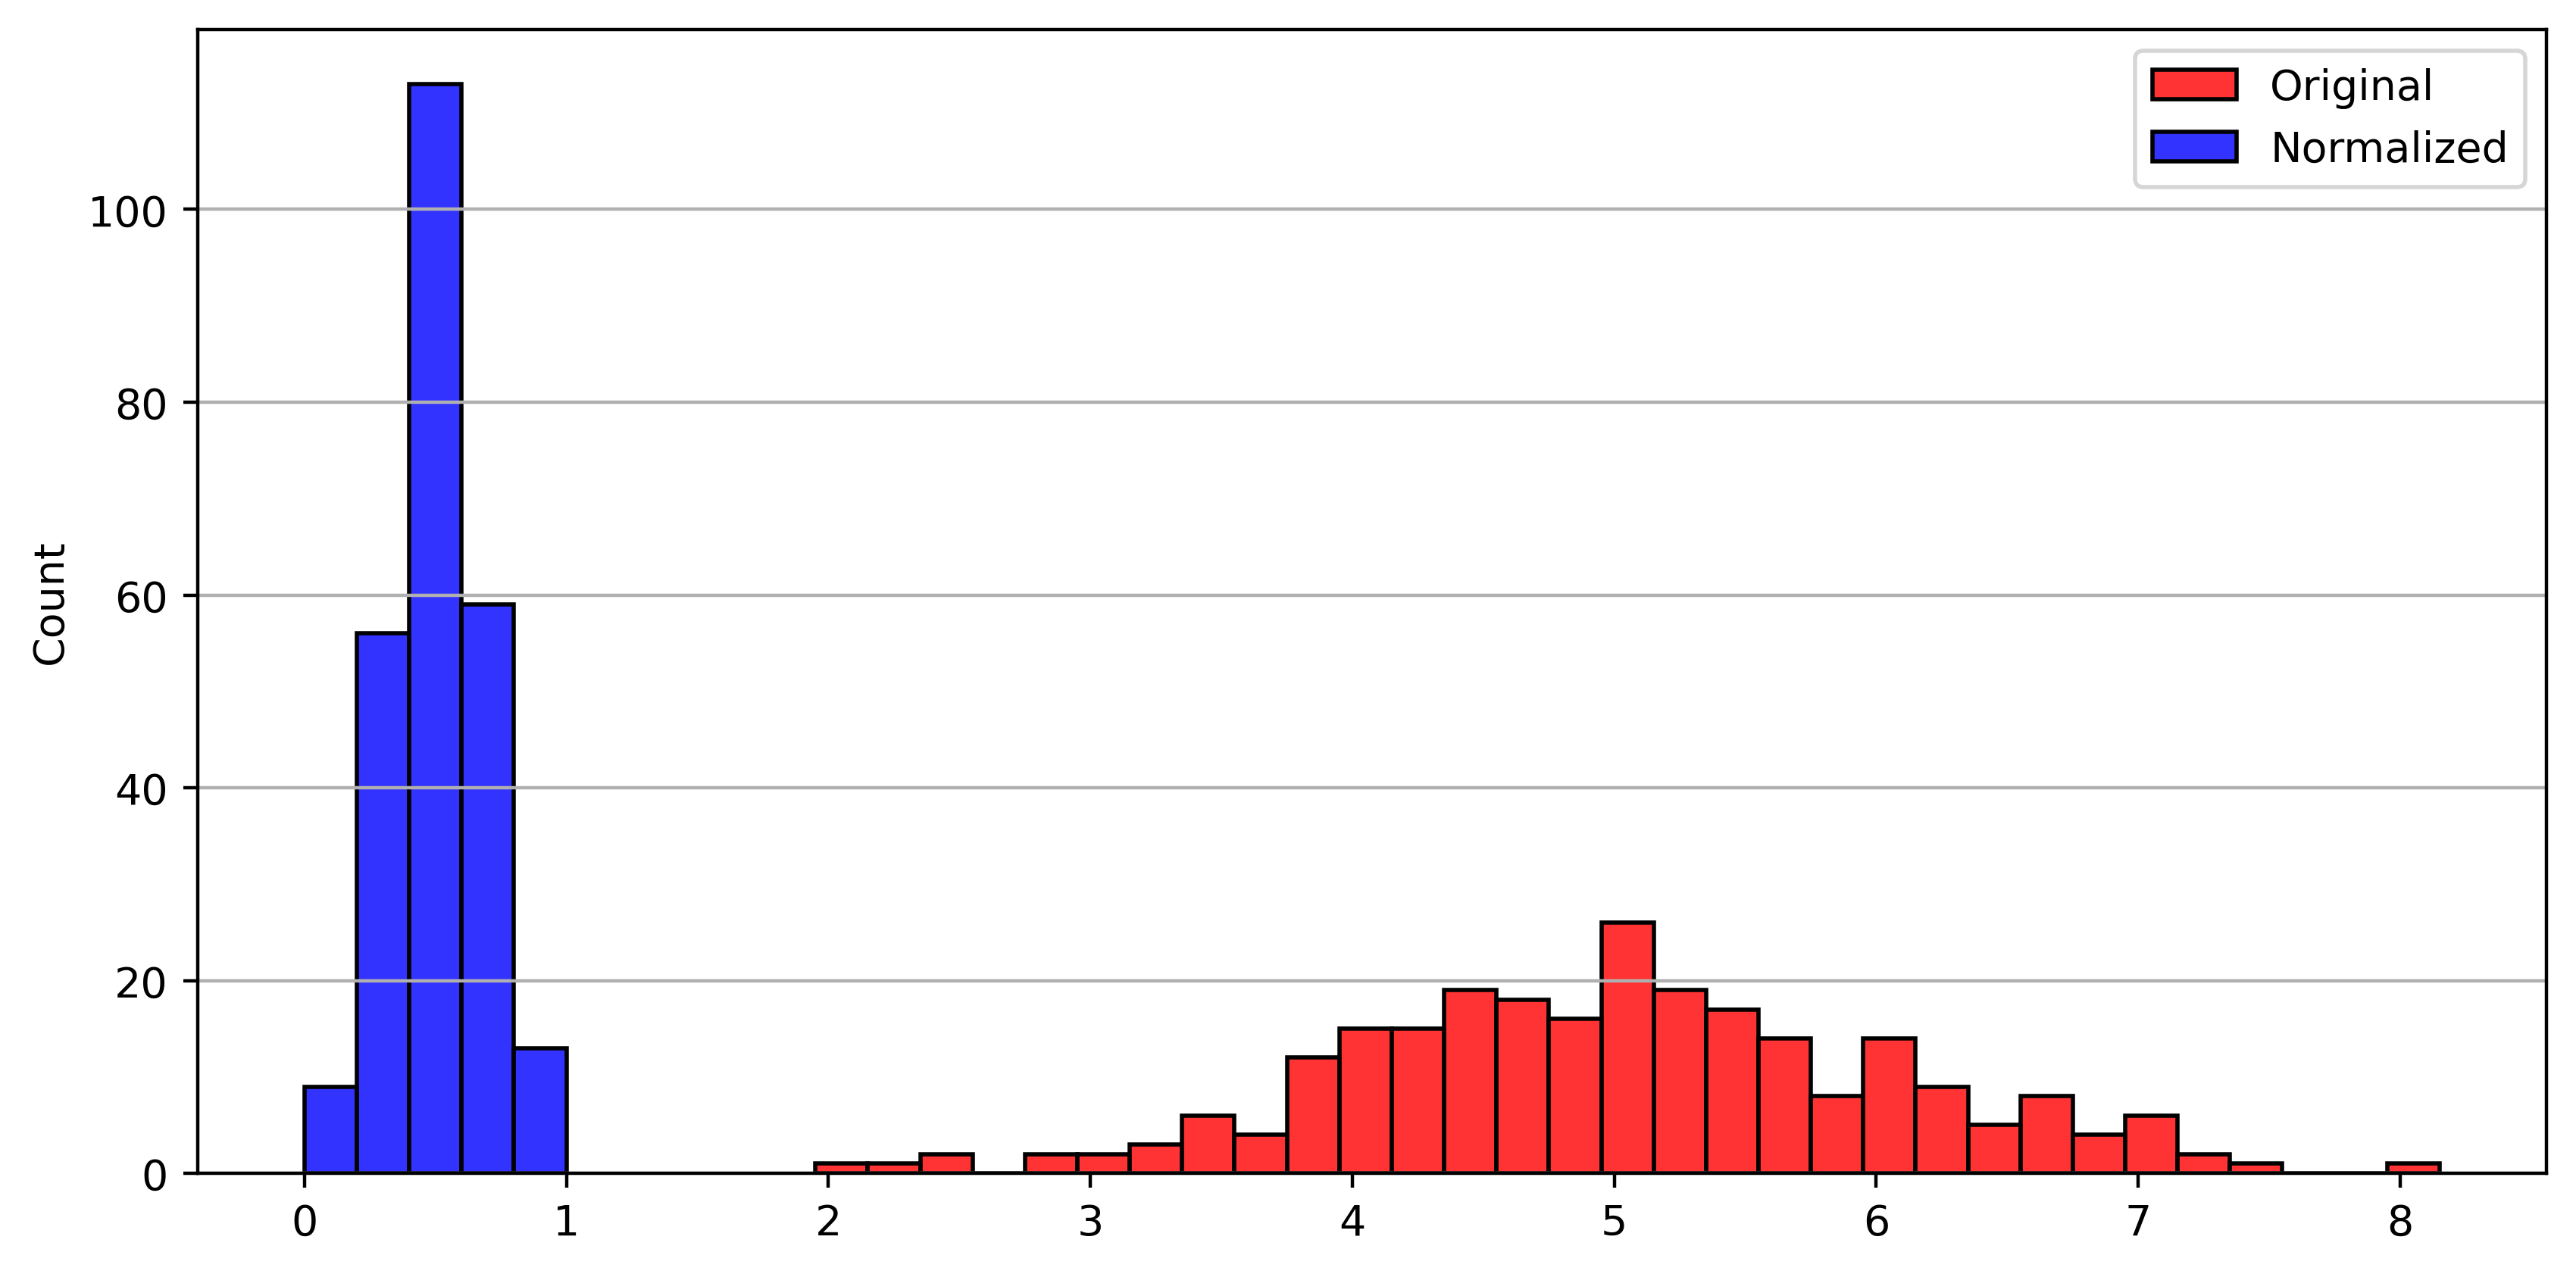

In [ ]:
arr = np.random.normal(loc=5, scale=1, size=(250,))
adjusted = (arr - arr.min()) / (arr.max() - arr.min())

plt.figure(figsize=(10, 5), dpi=400)
axes = plt.gca()
axes.yaxis.grid()
sns.histplot(arr, color='red', label='Original', alpha = 0.8, binwidth=0.2)
sns.histplot(adjusted, color='blue', label='Normalized', alpha = 0.8, binwidth=0.2)
plt.legend()
plt.show()

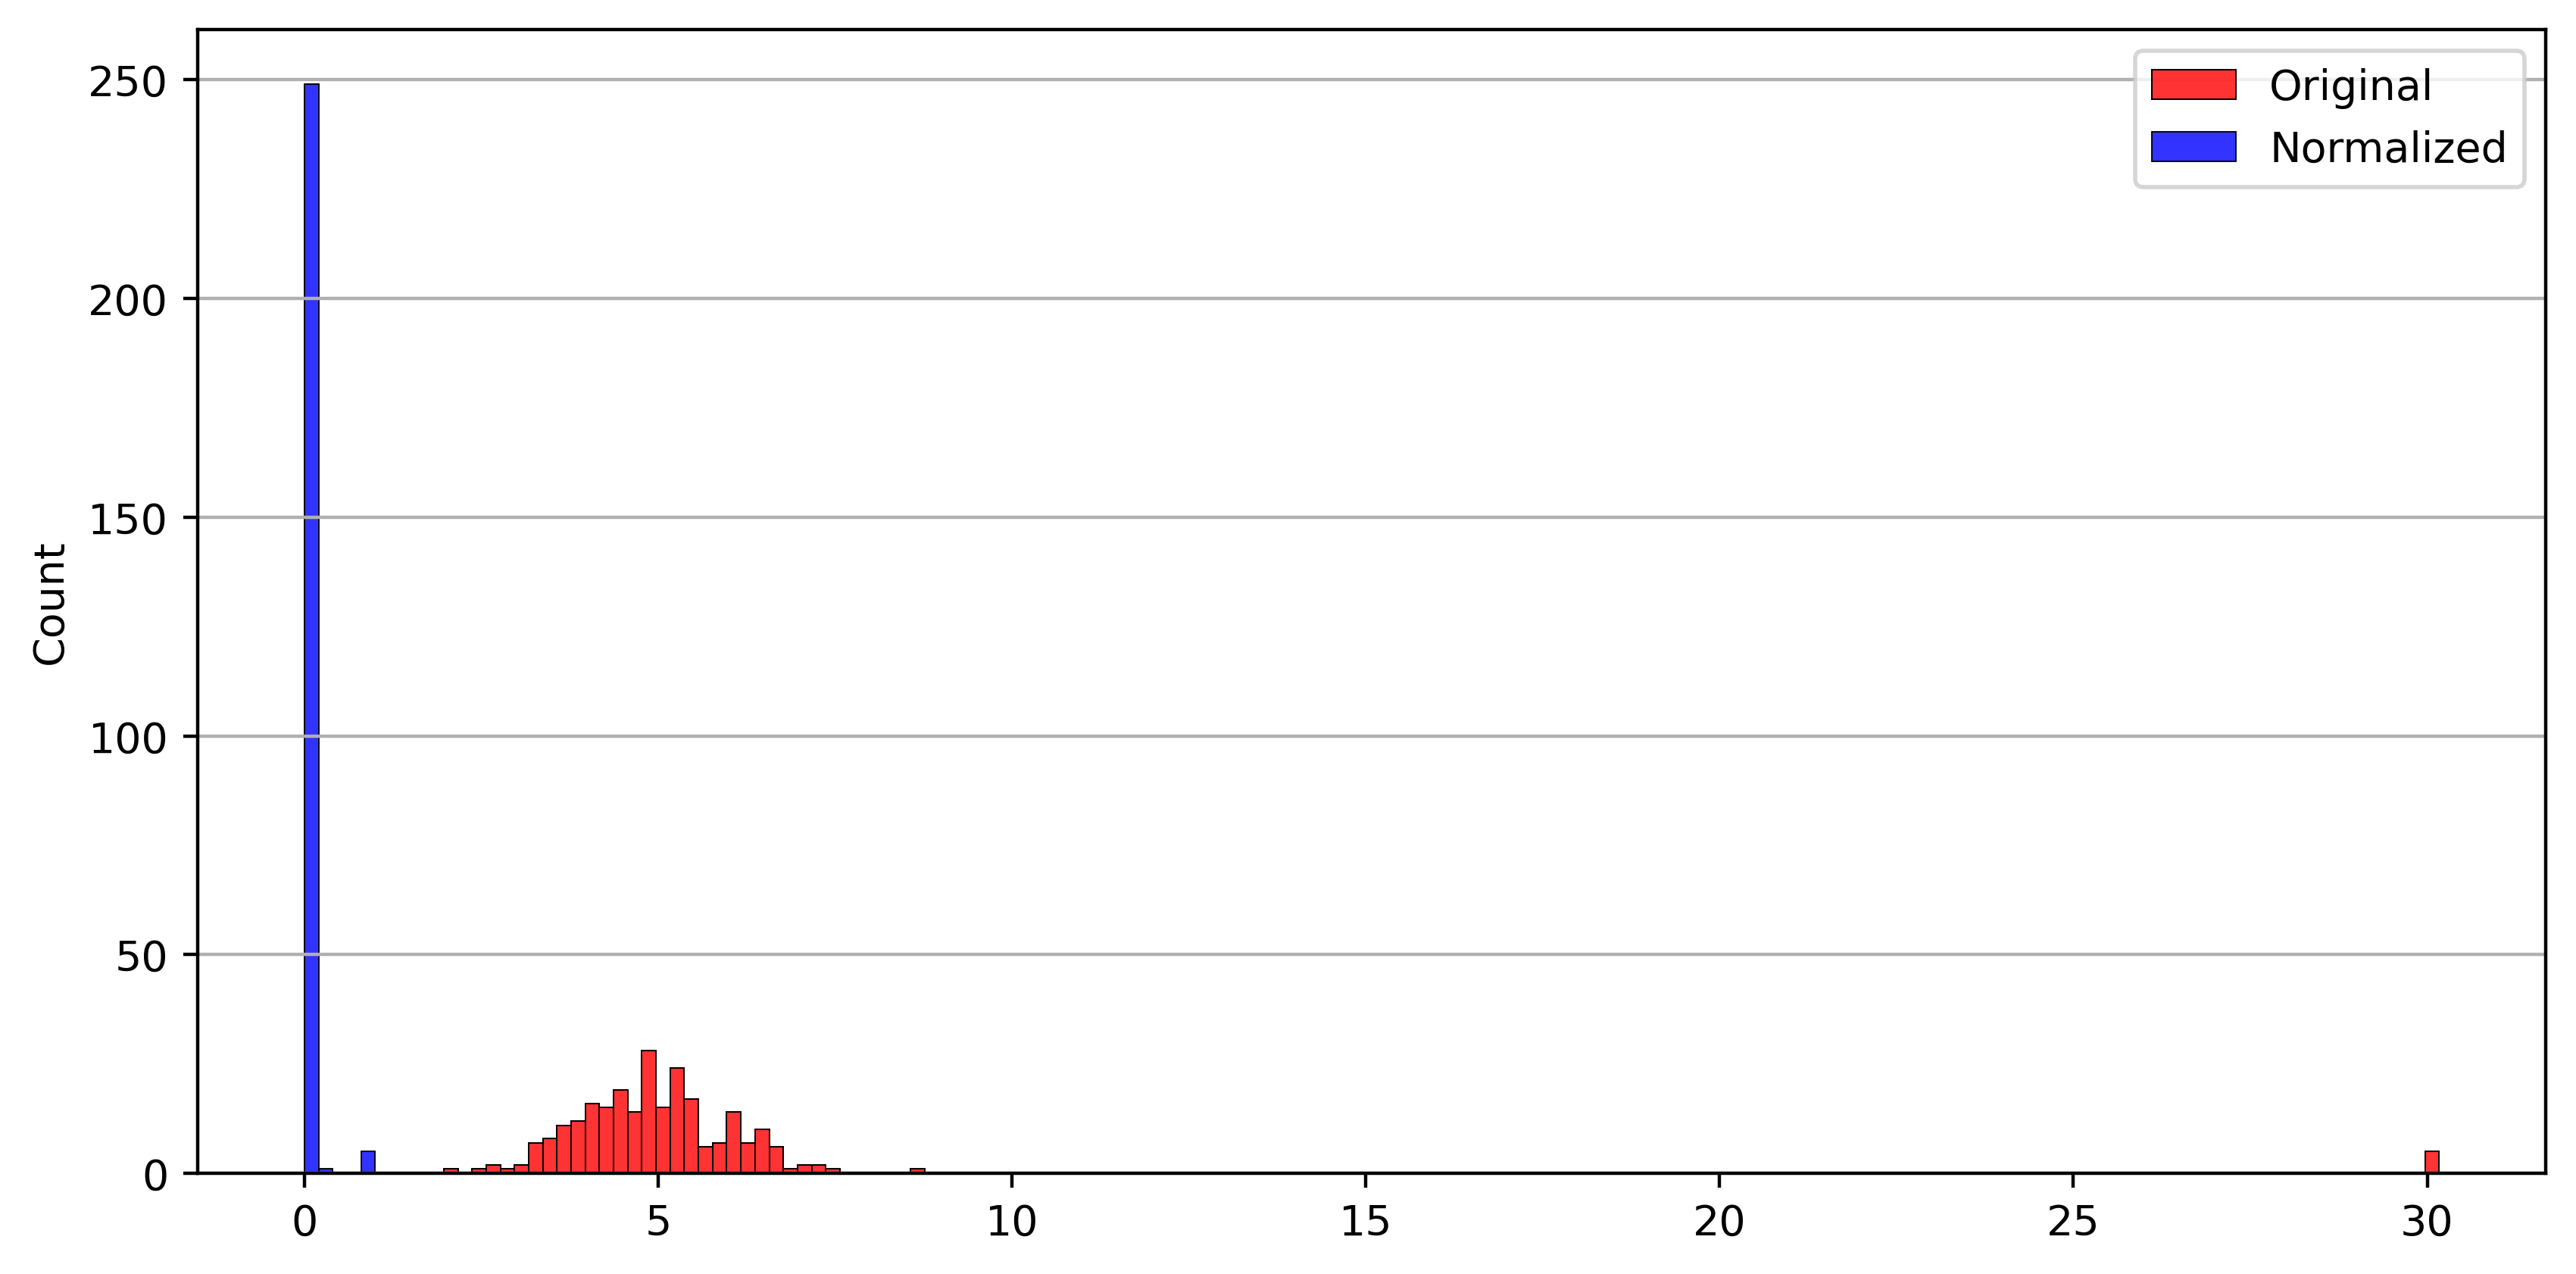

In [ ]:
arr = np.random.normal(loc=5, scale=1, size=(250,))
arr = np.append(arr, [30]*5)
adjusted = (arr - arr.min()) / (arr.max() - arr.min())

plt.figure(figsize=(10, 5), dpi=400)
axes = plt.gca()
axes.yaxis.grid()
sns.histplot(arr, color='red', label='Original', alpha = 0.8, binwidth=0.2)
sns.histplot(adjusted, color='blue', label='Normalized', alpha = 0.8, binwidth=0.2)
plt.legend()
plt.show()

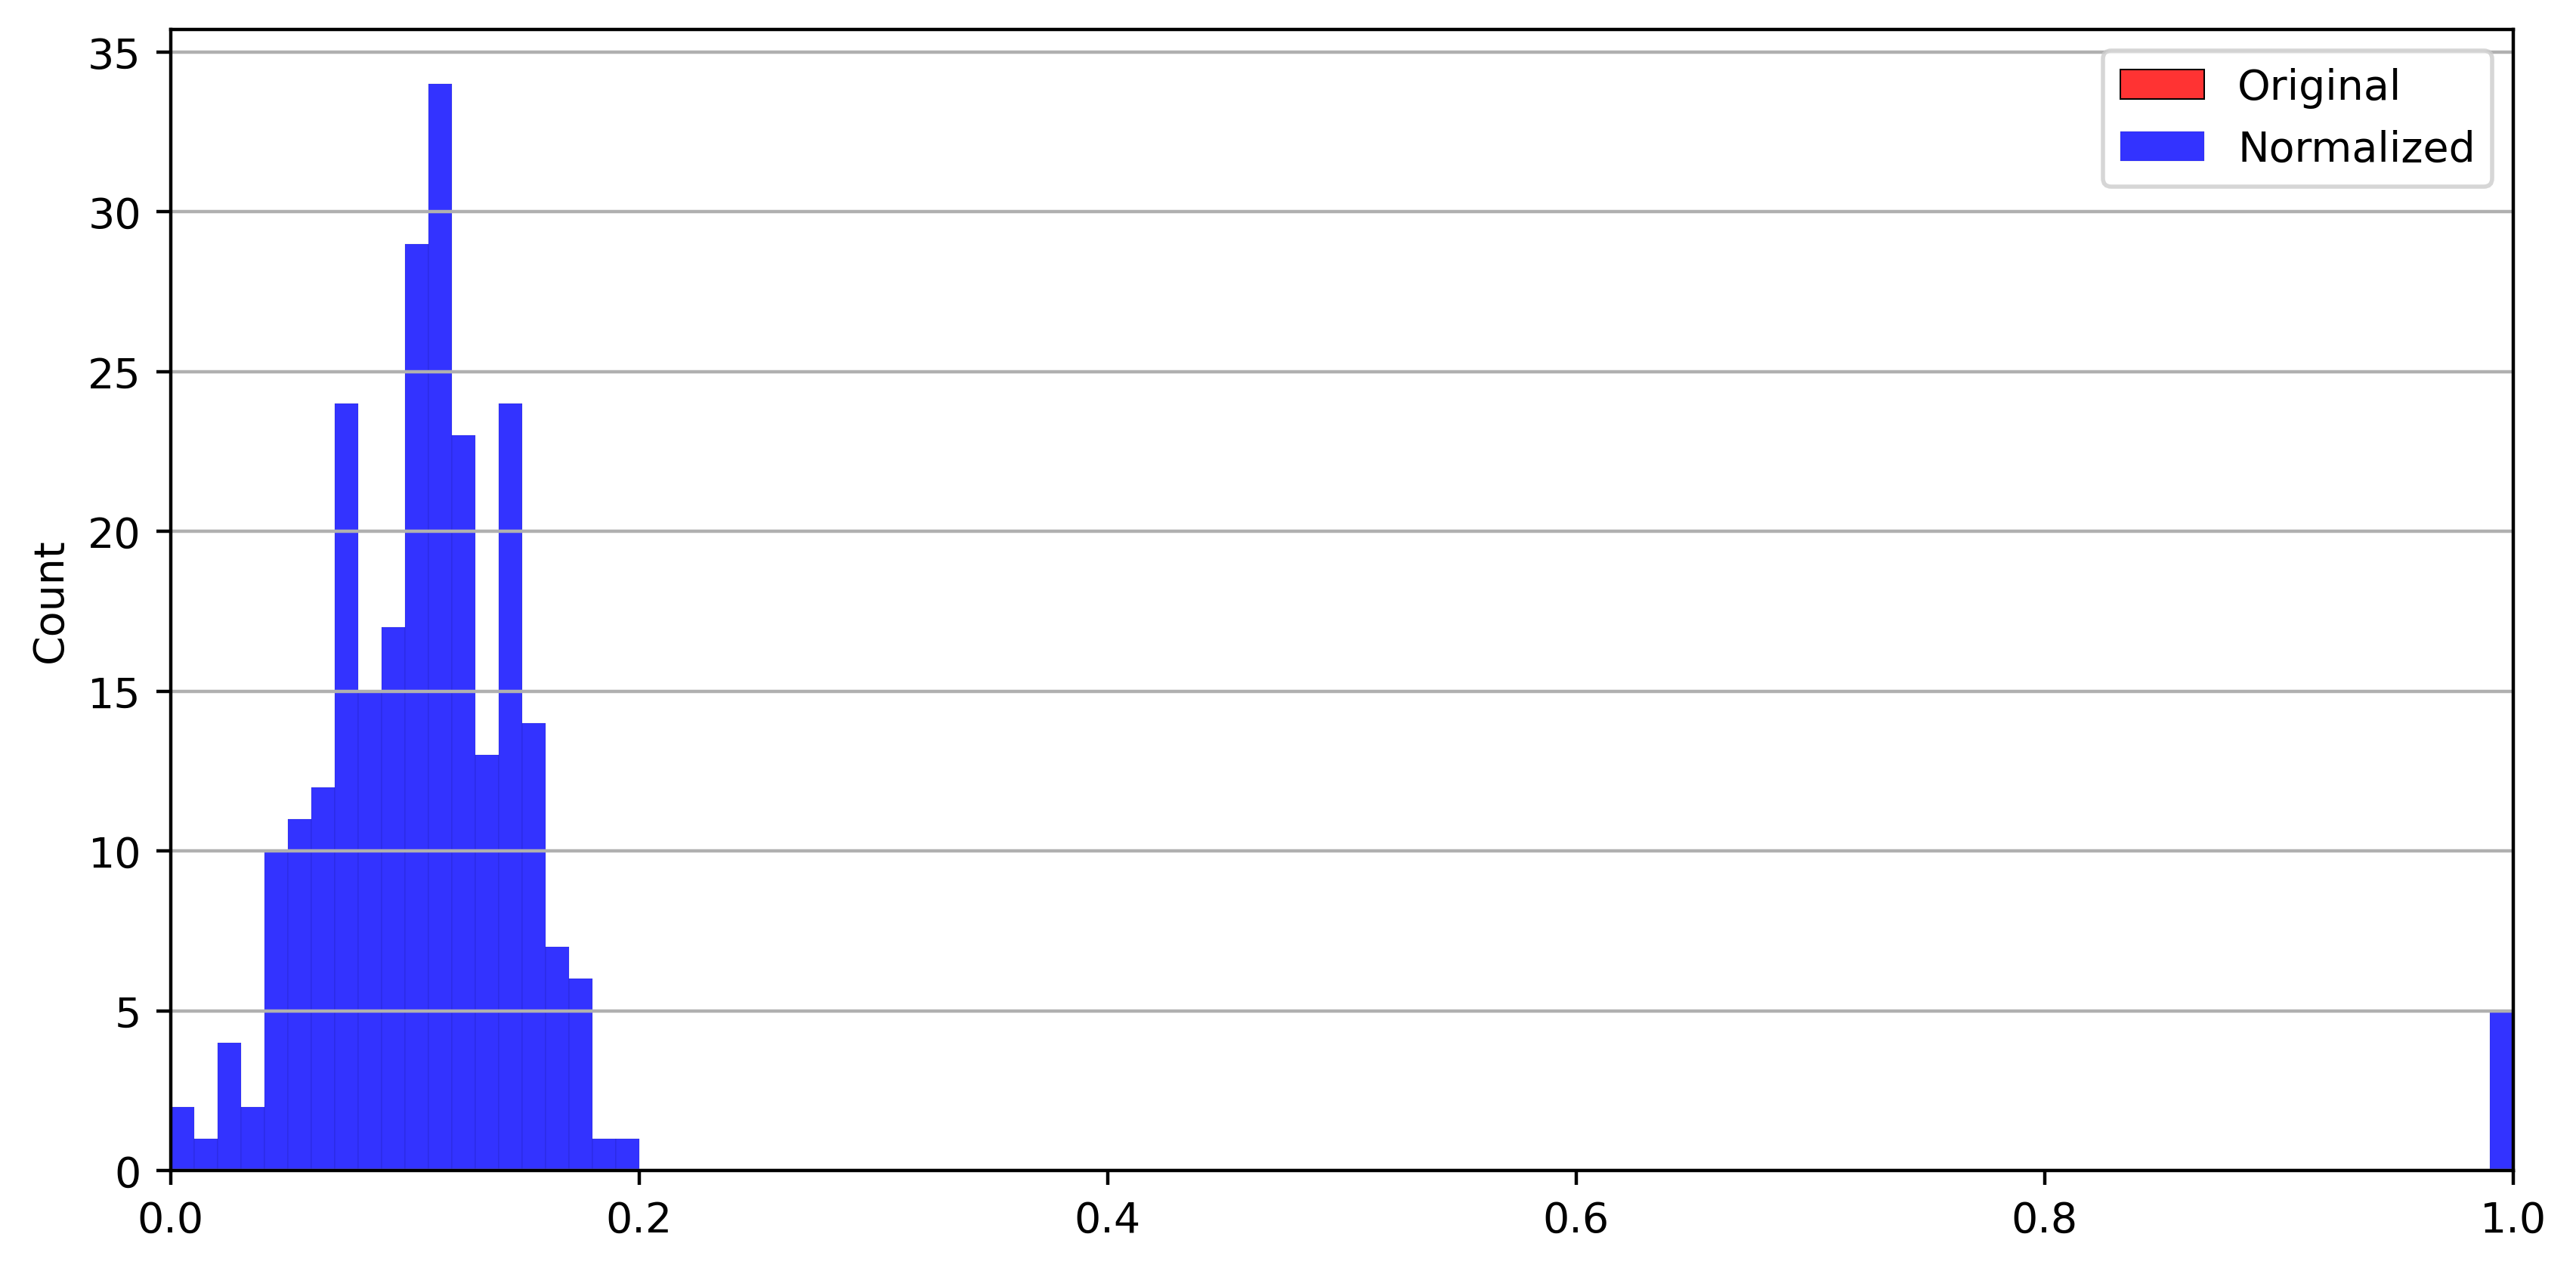

In [ ]:
arr = np.random.normal(loc=5, scale=1, size=(250,))
arr = np.append(arr, [30]*5)
adjusted = (arr - arr.min()) / (arr.max() - arr.min())

plt.figure(figsize=(10, 5), dpi=400)
axes = plt.gca()
axes.yaxis.grid()
sns.histplot(arr, color='red', label='Original', alpha = 0.8, binwidth=0.2)
sns.histplot(adjusted, color='blue', label='Normalized', alpha = 0.8, binwidth=0.01)
plt.legend()
plt.xlim([0, 1])
plt.show()

#### Robust Scaling

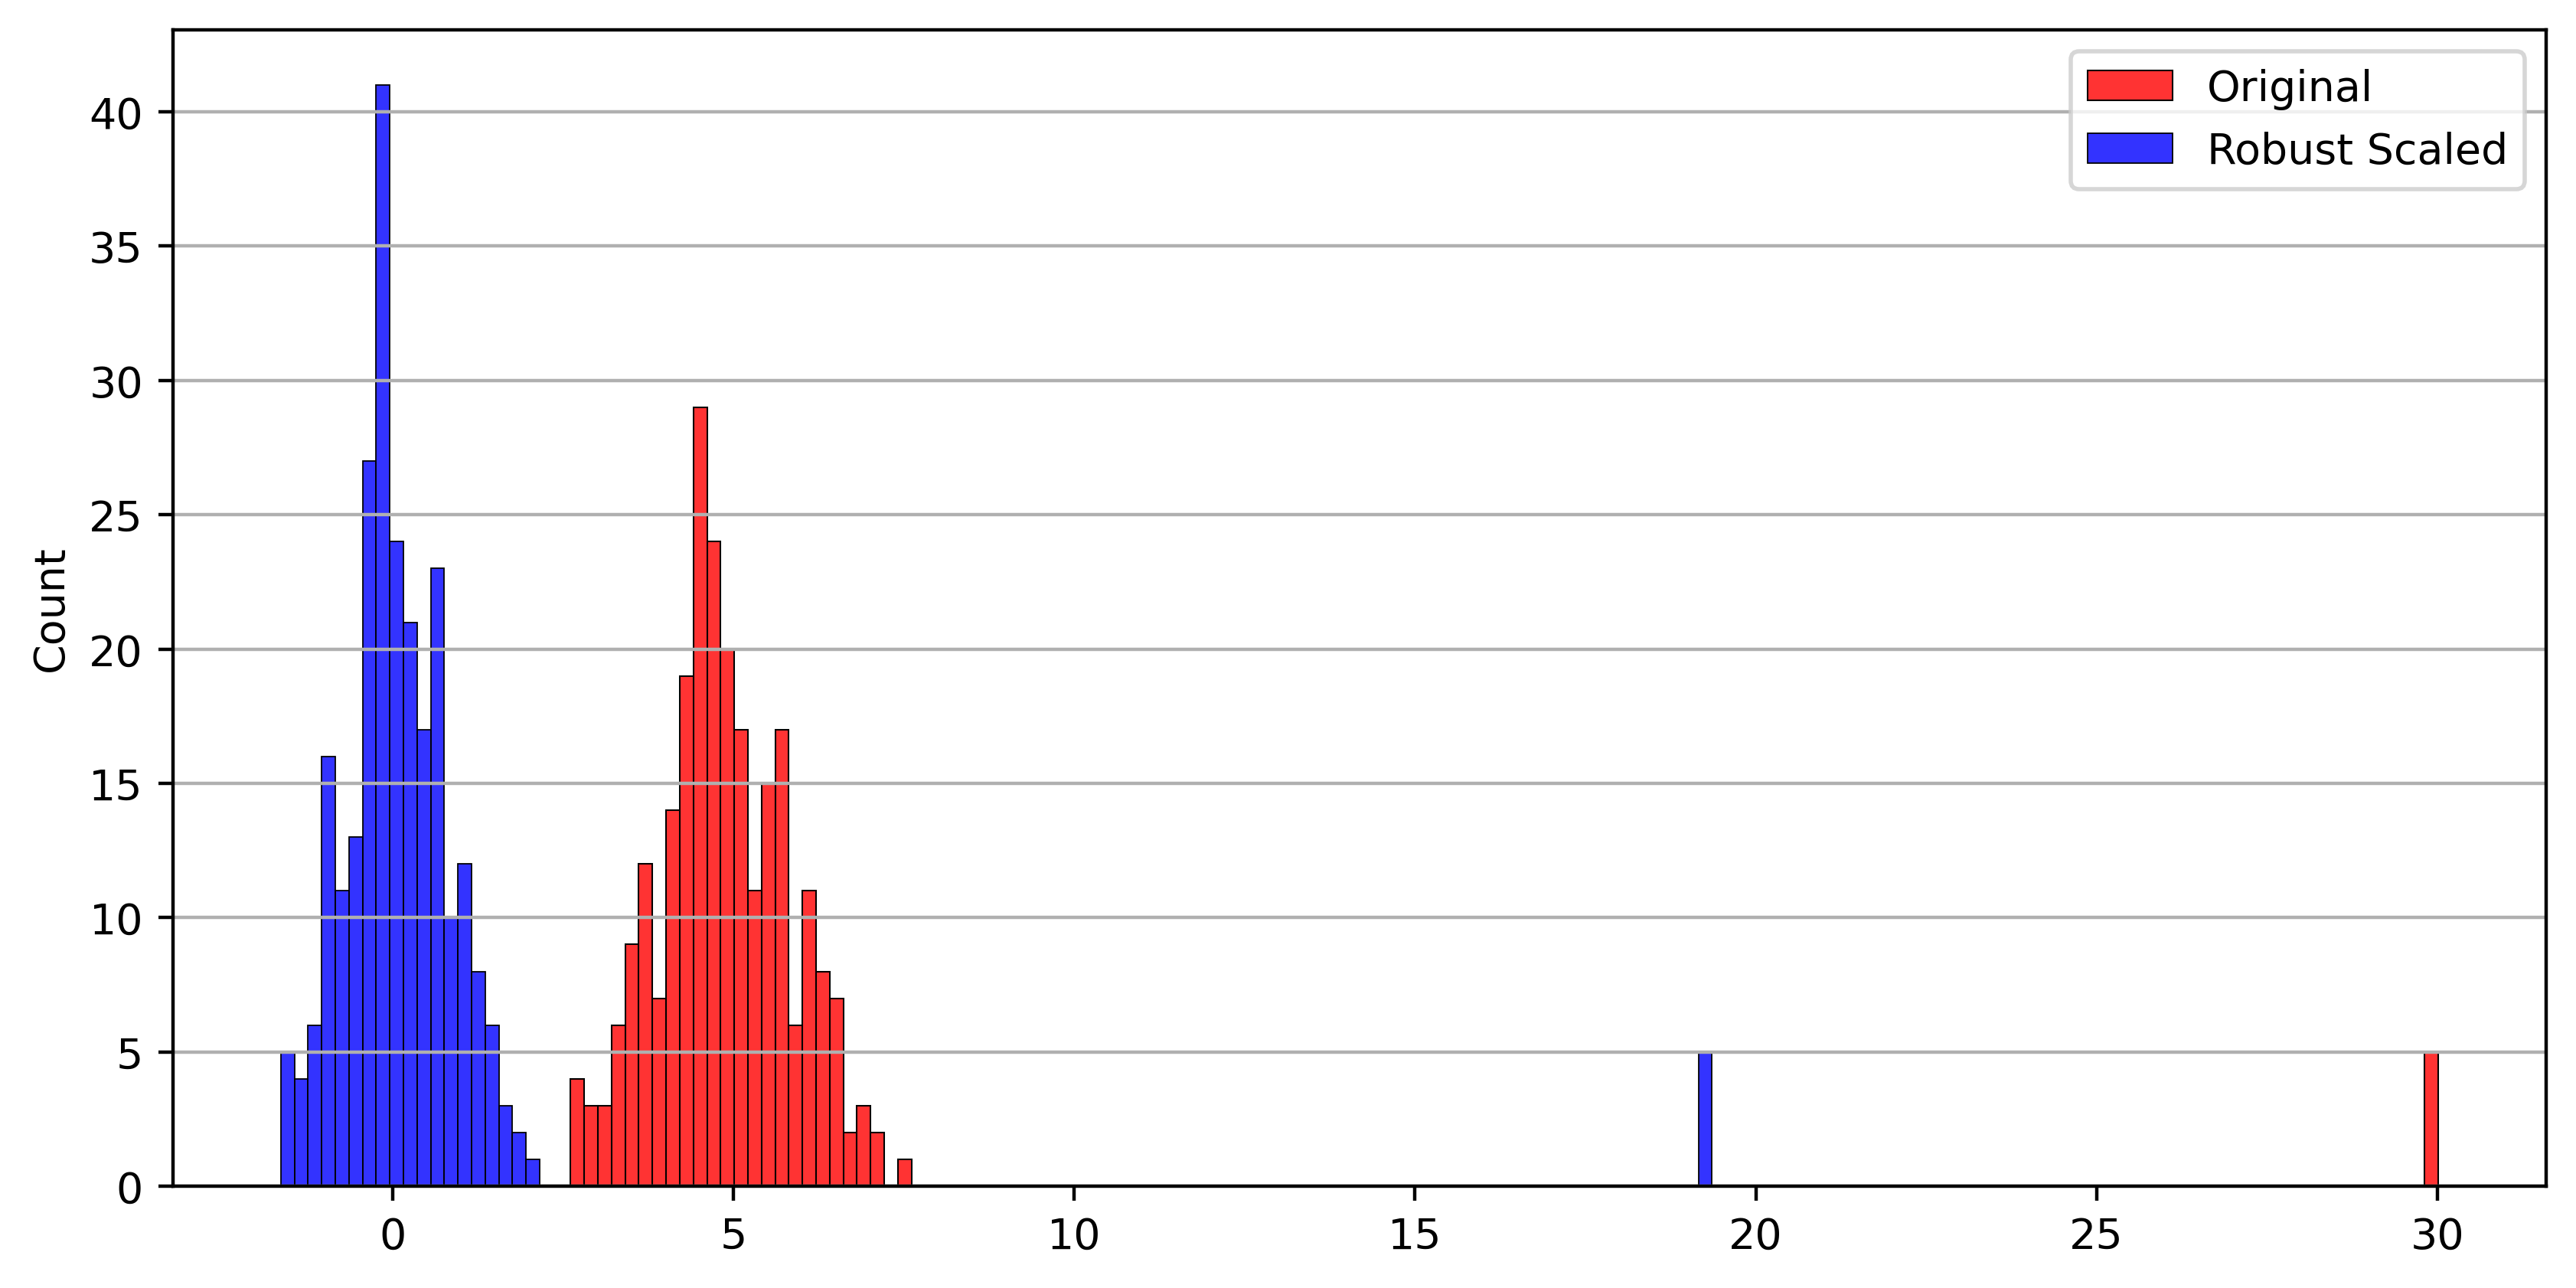

In [ ]:
plt.figure(figsize=(10, 5), dpi=400)
axes = plt.gca()
axes.yaxis.grid()

arr = np.random.normal(loc=5, scale=1, size=(250,))
adjusted = (arr - arr.min()) / (arr.max() - arr.min())

arr = np.append(arr, [30]*5)
rs_adjusted = (arr - np.median(arr)) / (np.quantile(arr, 0.75) - np.quantile(arr, 0.25))

sns.histplot(arr, color='red', label='Original', alpha = 0.8, binwidth=0.2)
sns.histplot(rs_adjusted, color='blue', label='Robust Scaled', alpha = 0.8, binwidth=0.2)
plt.legend()
plt.show()

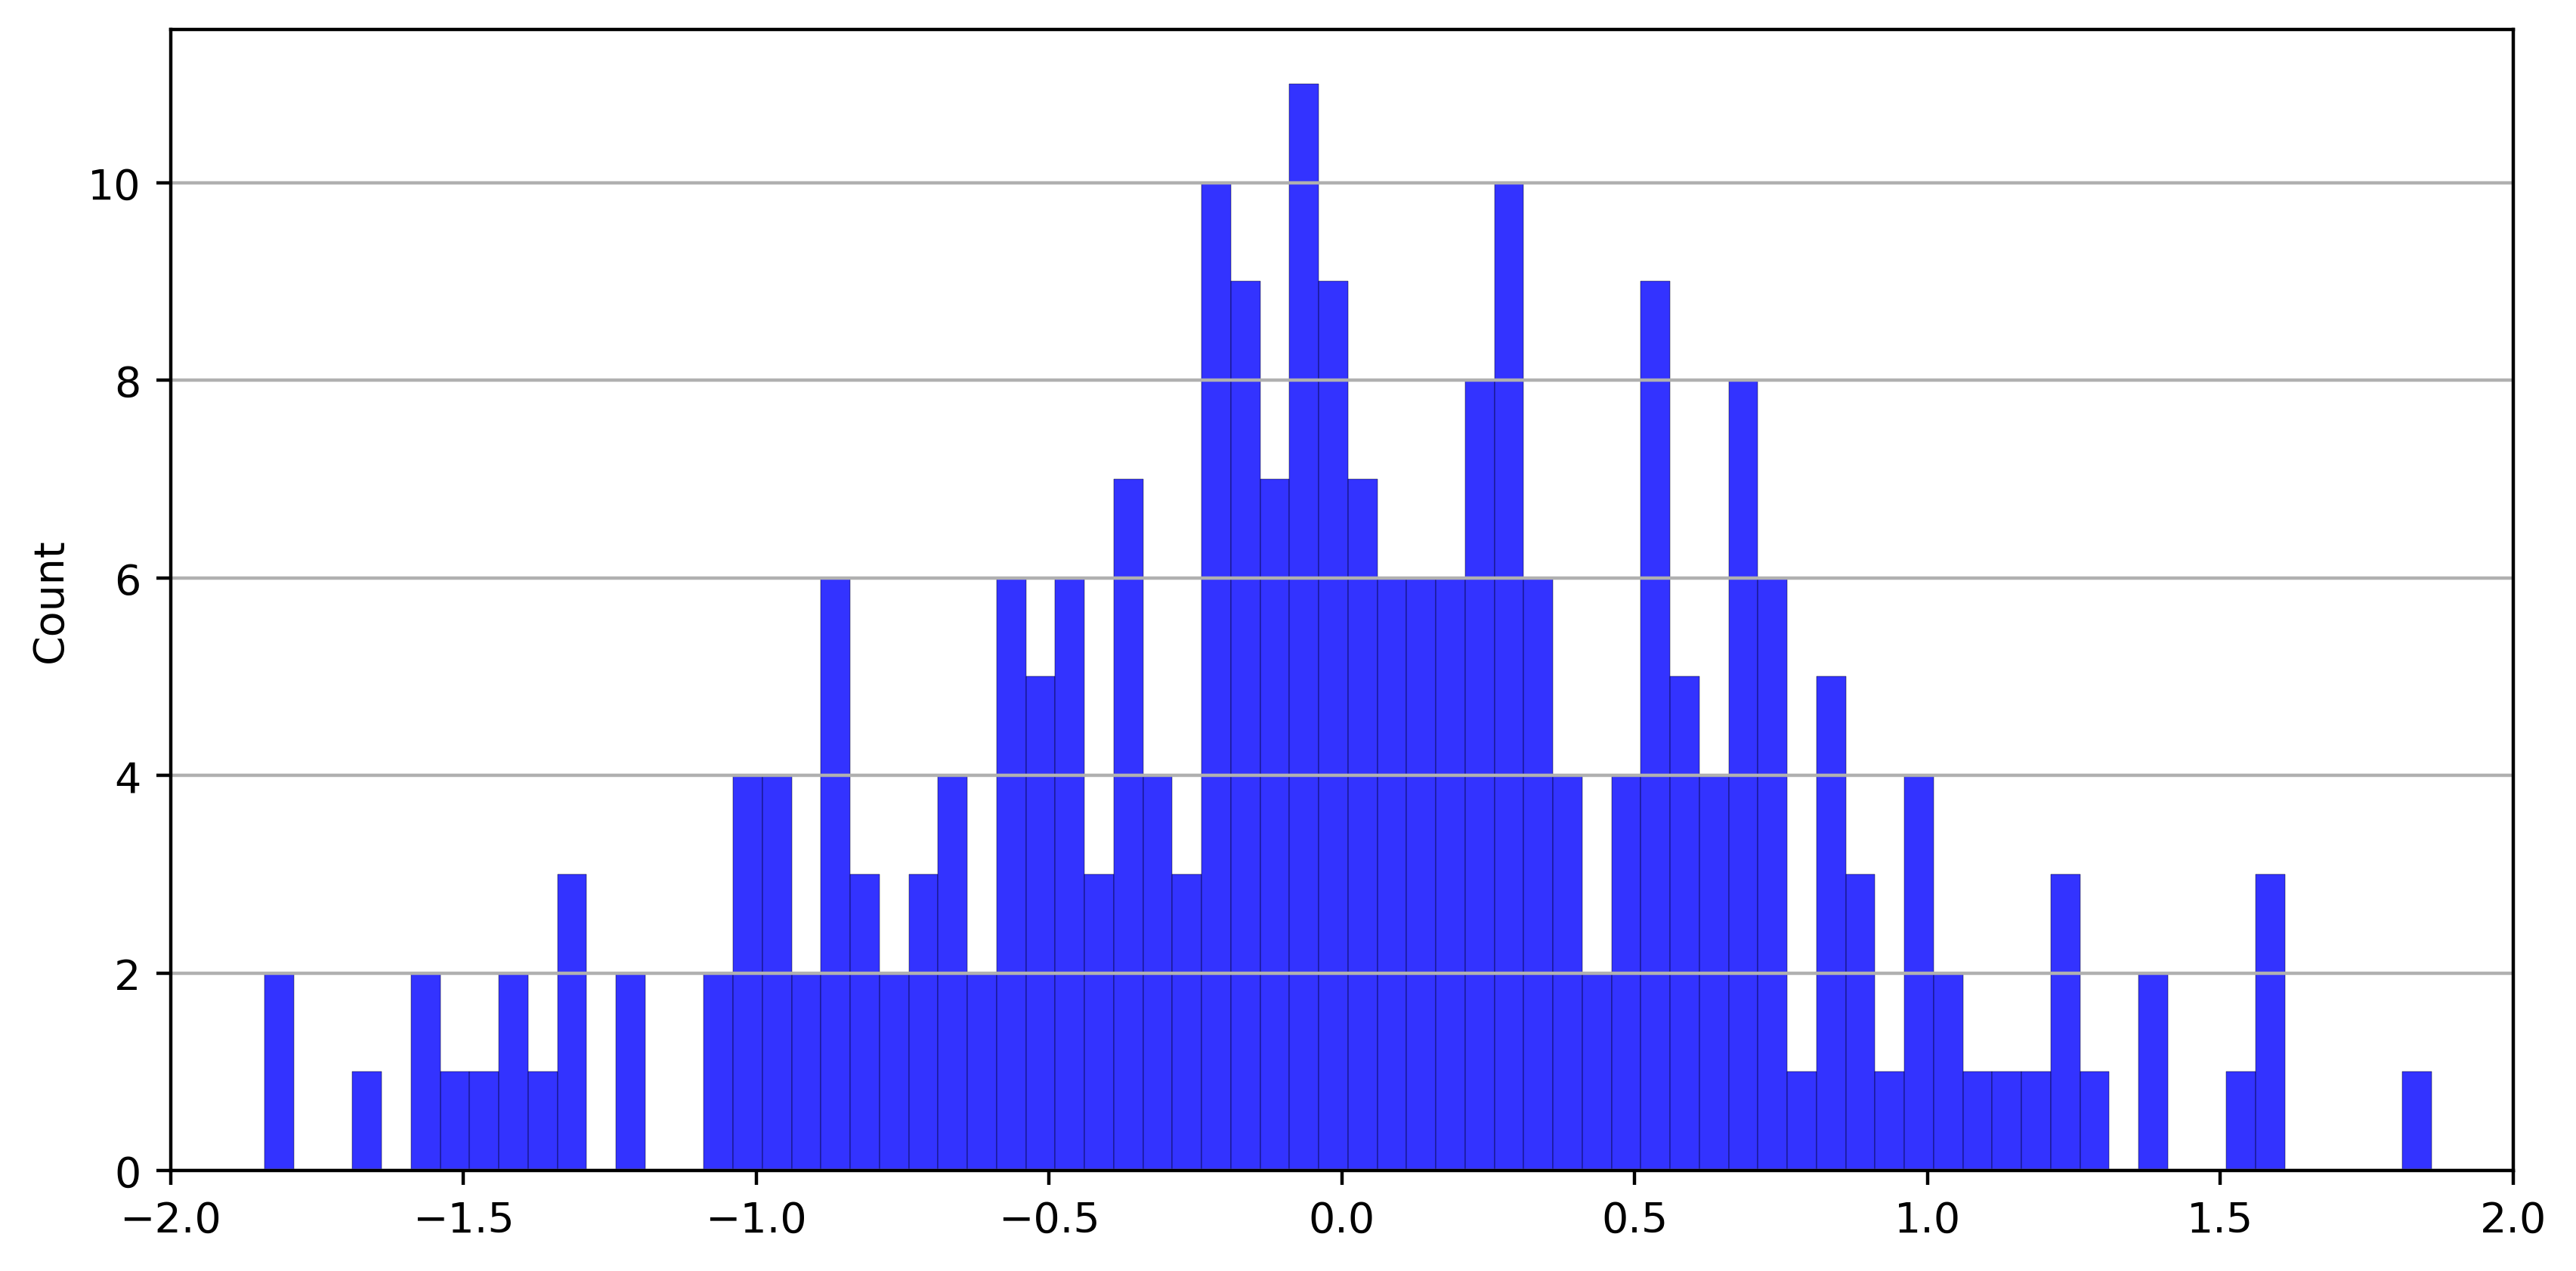

In [ ]:
plt.figure(figsize=(10, 5), dpi=400)
axes = plt.gca()
axes.yaxis.grid()

arr = np.random.normal(loc=5, scale=1, size=(250,))
adjusted = (arr - arr.min()) / (arr.max() - arr.min())

arr = np.append(arr, [30]*5)
rs_adjusted = (arr - np.median(arr)) / (np.quantile(arr, 0.75) - np.quantile(arr, 0.25))

sns.histplot(arr, color='red', label='Original', alpha = 0.8, binwidth=0.05)
sns.histplot(rs_adjusted, color='blue', label='Robust Scaled', alpha = 0.8, binwidth=0.05)
plt.xlim([-2., 2.])
plt.show()

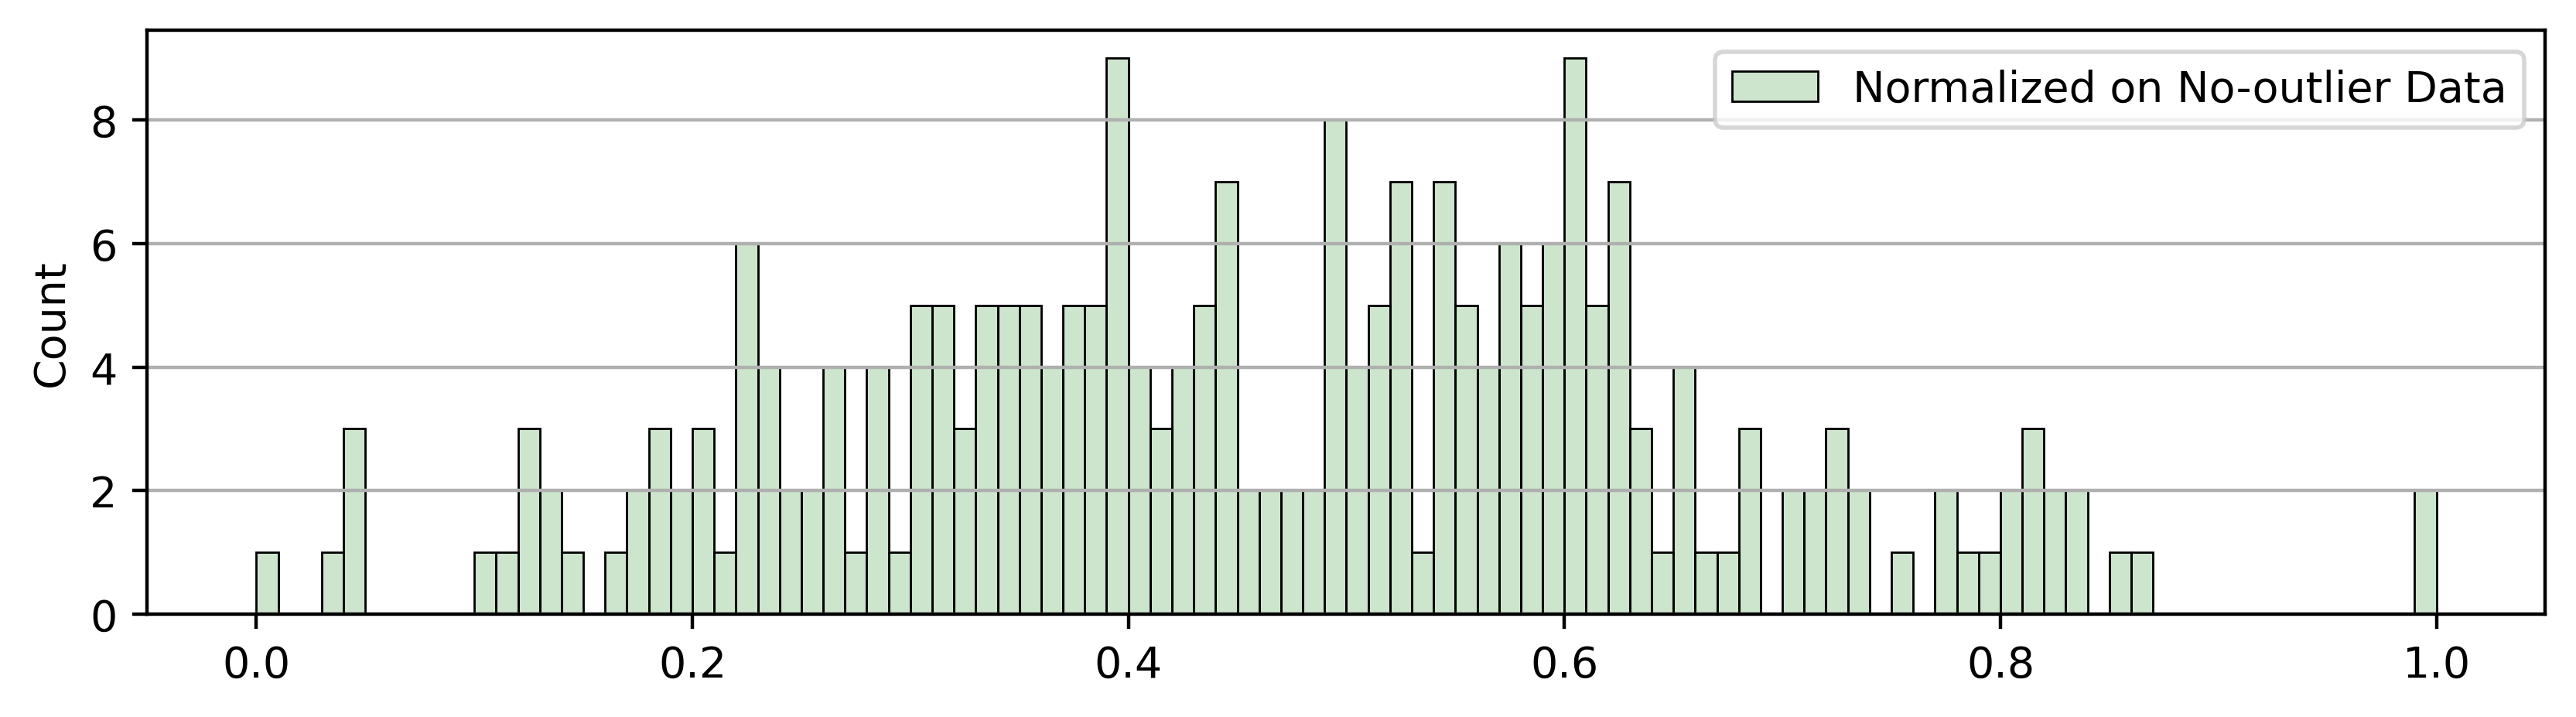

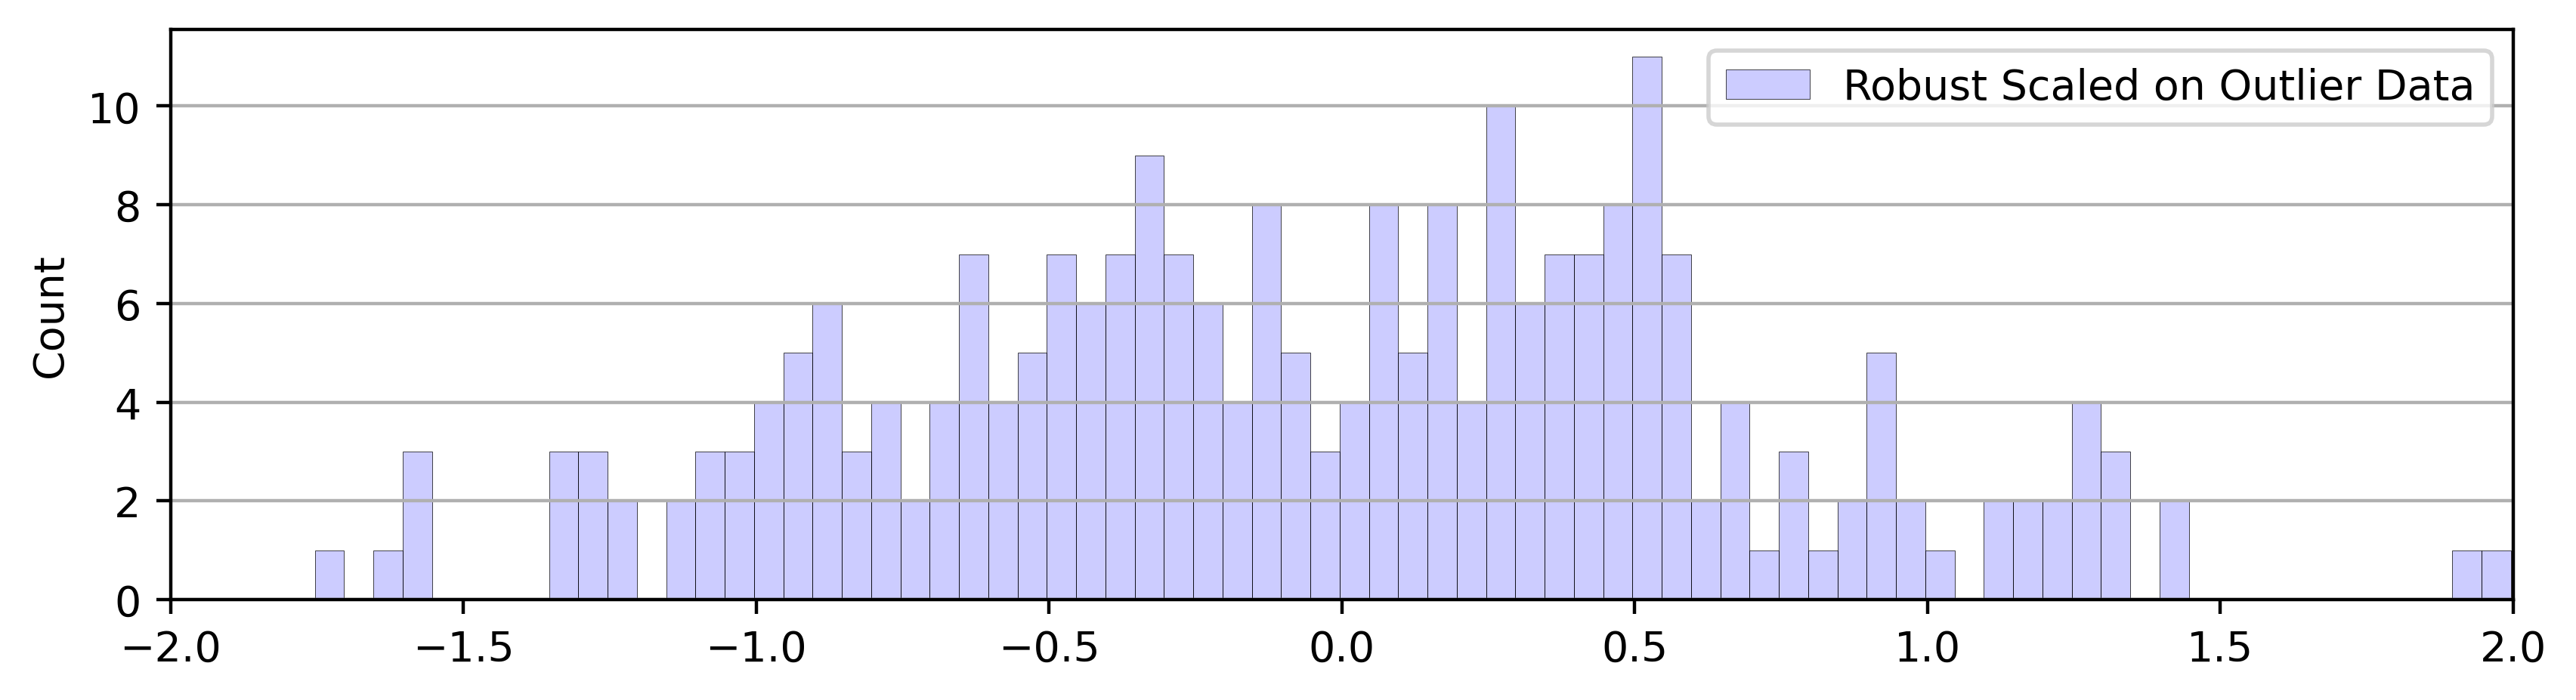

In [ ]:
plt.figure(figsize=(10, 2.5), dpi=400)
axes = plt.gca()
axes.yaxis.grid()

arr = np.random.normal(loc=5, scale=1, size=(250,))
adjusted = (arr - arr.min()) / (arr.max() - arr.min())

sns.histplot(adjusted, color='green', label='Normalized on No-outlier Data', alpha = 0.2, binwidth=0.01)
plt.legend()
plt.show()

plt.figure(figsize=(10, 2.5), dpi=400)
axes = plt.gca()
axes.yaxis.grid()

arr = np.append(arr, [30]*5)
rs_adjusted = (arr - np.median(arr)) / (np.quantile(arr, 0.75) - np.quantile(arr, 0.25))

sns.histplot(rs_adjusted, color='blue', label='Robust Scaled on Outlier Data', alpha = 0.2, binwidth=0.05)
plt.legend()
plt.xlim([-2, 2])
plt.show()

#### Standardization

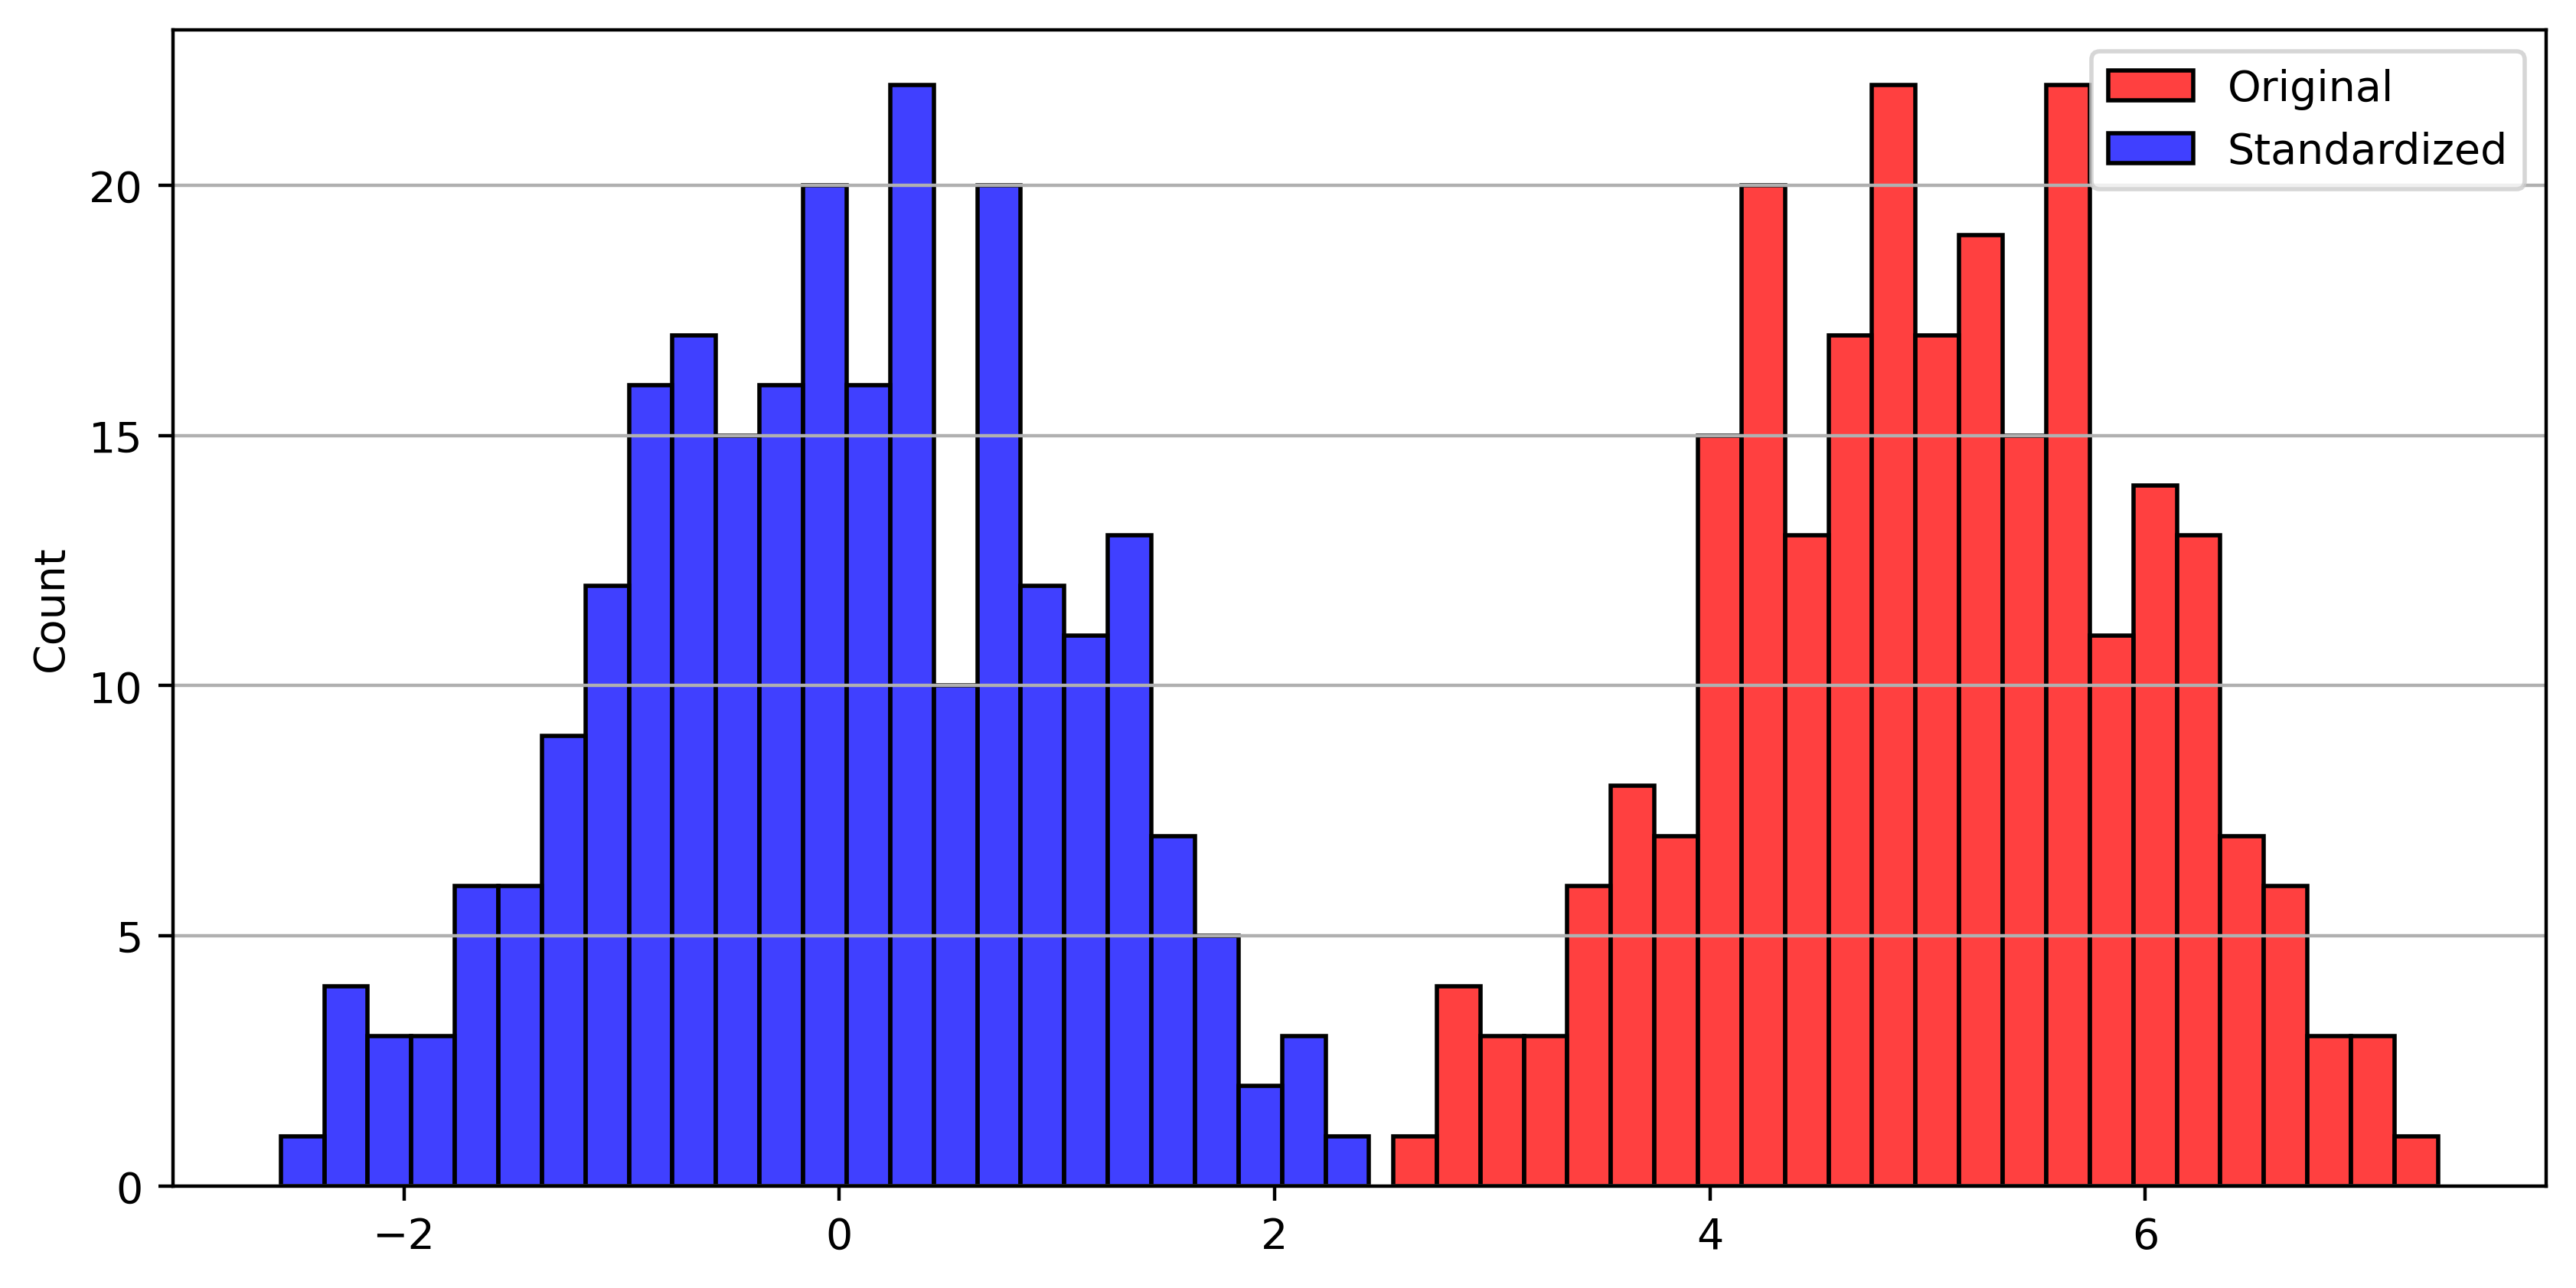

In [ ]:
arr = np.random.normal(loc=5, scale=1, size=(250,))
adjusted = (arr - np.mean(arr)) / np.std(arr)

plt.figure(figsize=(10, 5), dpi=400)
axes = plt.gca()
axes.yaxis.grid()
sns.histplot(arr, color='red', label='Original', binwidth=0.2)
sns.histplot(adjusted, color='blue', label='Standardized', binwidth=0.2)
plt.legend()
plt.show()

### Text Data

We will be using the UCI SMS Spam dataset.

In [ ]:
data = pd.read_csv('../input/sms-spam-collection-dataset/spam.csv', encoding = 'ISO-8859-1')
data = data.rename(columns={'v1':'label', 'v2':'text'})
data['isSpam'] = data['label'].map({'ham':0, 'spam':1})
data = data[['isSpam', 'text']]

from sklearn.model_selection import train_test_split as tts
X_train, X_val, y_train, y_val = tts(data['text'], data['isSpam'],
                                     train_size = 0.8)

#### Keyword Search

In [ ]:
def predict(text):
    keywords = ['buy', 'free', 'win']
    for keyword in keywords:
        if keyword in text.lower():
            return 1
    return 0

from sklearn.metrics import f1_score
f1_score(y_val, X_val.apply(predict))

0.4765625

#### Raw Vectorization

In [ ]:
def raw_vectorize(text):
    return one_hot_encoding(text.split(' '))

texts = np.array(['the dog jumped over the second dog',
                  'a dog is a dog and nothing else',
                  'a dog is an animal'])

def raw_vectorize(text):
    return one_hot_encoding(text.split(' '))

raw_vectorized = np.array([raw_vectorize(text).tolist() for text in texts])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
from keras.preprocessing.text import Tokenizer
tk = Tokenizer(num_words=10)
tk.fit_on_texts(texts)
tk.texts_to_sequences(texts)

[[3, 1, 5, 6, 3, 7, 1], [2, 1, 4, 2, 1, 8, 9], [2, 1, 4]]

In [ ]:
complete_text = ' '.join(texts)
unique = np.unique(complete_text.split(' '))
mapping = {i:token for i, token in enumerate(unique)}
mapping

{0: 'a',
 1: 'an',
 2: 'and',
 3: 'animal',
 4: 'dog',
 5: 'else',
 6: 'is',
 7: 'jumped',
 8: 'nothing',
 9: 'over',
 10: 'second',
 11: 'the'}

#### Bag of Words

In [ ]:
np.sum(tk.texts_to_matrix(texts), axis=0)

array([0., 3., 2., 1., 2., 1., 1., 1., 1., 1.])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features = 3000)
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_val_vec = vectorizer.transform(X_val).toarray()

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_vec, y_train)

pred = model.predict(X_val_vec)
f1_score(pred, y_val)

0.8931297709923663

In [ ]:
from keras.preprocessing.text import Tokenizer
tk = Tokenizer(num_words=3000)
tk.fit_on_texts(X_train)
X_train_vec = tk.texts_to_matrix(X_train, mode='freq')
X_val_vec = tk.texts_to_matrix(X_val, mode='freq')

#### N-Grams

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features = 3000, 
                             ngram_range = (4, 4))
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_val_vec = vectorizer.transform(X_val).toarray()

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_vec, y_train)
pred = model.predict(X_val_vec)
f1_score(pred, y_val)

0.5499999999999999

#### TD-IDF

In [ ]:
from keras.preprocessing.text import Tokenizer
tk = Tokenizer(num_words=3000)
tk.fit_on_texts(X_train)
X_train_vec = tk.texts_to_matrix(X_train, mode='tfidf')
X_val_vec = tk.texts_to_matrix(X_val, mode='tfidf')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 3000, 
                             ngram_range = (1, 1))
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_val_vec = vectorizer.transform(X_val).toarray()

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_vec, y_train)
pred = model.predict(X_val_vec)
f1_score(pred, y_val)

0.8931297709923663

#### Sentiment Analysis

In [ ]:
from textblob import TextBlob
text = TextBlob("Feature encoding is very good")
text.sentiment

Sentiment(polarity=0.9099999999999999, subjectivity=0.7800000000000001)

In [ ]:
text = TextBlob("Feature encoding is very good!")
text.sentiment

Sentiment(polarity=1.0, subjectivity=0.7800000000000001)

In [ ]:
text = TextBlob("Feature encoding is not very good")
text.sentiment

Sentiment(polarity=-0.26923076923076916, subjectivity=0.46153846153846156)

In [ ]:
text = TextBlob("Feature encoding is a technique.")
text.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [ ]:
text = TextBlob("I feel guilty - it's such terrible fun!")
text.sentiment

Sentiment(polarity=-0.28125, subjectivity=0.675)

In [ ]:
get_polarity = lambda x: round(TextBlob(x).sentiment.polarity, 2)
get_subj = lambda x: round(TextBlob(x).sentiment.subjectivity, 2)

In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 595 kB/s            


In [ ]:
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
sentence = "Feature encoding is very good" 
scores = analyzer.polarity_scores(sentence)
scores

{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4927}

In [ ]:
!pip install flair

     |████████████████████████████████| 322 kB 595 kB/s            
     |████████████████████████████████| 788 kB 9.0 MB/s            
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 1.2 MB 33.6 MB/s            
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - \ | done
  Preparing metadata (pyproject.toml) ... - \ | done
     |████████████████████████████████| 981 kB 58.5 MB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 53 kB 1.6 MB/s             
     |████████████████████████████████| 48 kB 5.6 MB/s             
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9691 sha256=1723809dc39b6b1ef9c5bfe2d8902f2c231bf6c498a993df1310528c9d280225
  Stored in directory: /root/.cache/pip/wheels/ba/e0/7e/726e872a53f7358b4b96a9975b04e98113b005cd8609a63abc
  Created wheel for m

In [ ]:
# import flair
# from flair.models import TARSClassifier
# from flair.data import Sentence
# tars = TARSClassifier.load('tars-base')
# sentence = Sentence("Feature encoding is very good")
# classes = ['positive', 'negative']
# tars.predict_zero_shot(sentence, classes)
# print(sentence)

In [ ]:
# sentence = Sentence("I'm feeling good about this, but don't know for sure.")
# classes = ['optimistic but careful']
# tars.predict_zero_shot(sentence, classes)
# print(sentence)

In [ ]:
# sentence = Sentence("Elephants can be found all over the world.")
# classes = ['animals']
# tars.predict_zero_shot(sentence, classes)
# print(sentence)

In [ ]:
# sentence = Sentence("I'm feeling good about this, but we should exercise caution.")
# classes = ['optimistic but careful']
# tars.predict_zero_shot(sentence, classes)
# print(sentence)

In [ ]:
# sent = """Feature encoding is very good
# Feature encoding is very good!
# Feature encoding is not very good
# Feature encoding is a technique.
# I feel guilty - it's such terrible fun!"""

# classes = ['happy', 'sad', 'excited',
#            'anxious', 'neutral']
# # you can also define custom classes

# for thing in sent.split('\n'):
#     sentence = Sentence(thing)
#     tars.predict_zero_shot(sentence, classes)
#     print(sentence)

### Word2Vec

In [ ]:
!pip install clean-text

In [ ]:
from cleantext import clean
import gensim

In [ ]:
import urllib.request
wnp = ""
data = urllib.request.urlopen('https://www.gutenberg.org/files/2600/2600-0.txt')

counter = 0
for line in tqdm(data):
    if counter == 50_000:
        break
    wnp += clean(line, no_line_breaks=True)[1:] + " "
    counter += 1
    
class Sentences(object):
    def __init__(self, text):
        self.text = text
 
    def __iter__(self):
        for sentence in wnp.split('.'):
            yield clean(wnp.split('.')[0], no_punct = True).split(' ')
            
sentences = Sentences(wnp)
model = gensim.models.Word2Vec(vector_size = 50,
                               min_count = 50,
                               workers = 4)
model.build_vocab(sentences)
model.train(sentences, 
            total_examples=model.corpus_count,
            epochs=30)

0it [00:00, ?it/s]

(5813423, 28723200)

In [ ]:
model.wv['war']

array([-0.25696295,  3.5703487 , -1.7798343 ,  0.9945607 ,  4.3973017 ,
       -0.22629872, -1.9143364 ,  2.031107  ,  0.14741819, -2.4769611 ,
       -0.64933735, -1.5481595 ,  0.6939877 ,  5.2614274 , -0.11960845,
       -3.1566374 ,  4.655208  ,  1.1983484 , -2.017265  , -2.0604212 ,
       -0.760677  , -0.55569774, -1.0670184 , -2.2508569 ,  4.3579955 ,
        1.4750543 ,  3.267176  , -0.7014842 , -2.0806925 ,  5.117454  ,
        2.3939033 , -0.8701684 , -2.1189663 , -0.83534604, -3.7275264 ,
        2.1877604 ,  1.298752  , -0.9427906 ,  0.46978647, -1.1171545 ,
       -0.5284408 , -1.9709119 ,  1.0233097 ,  0.67335194, -4.262241  ,
       -0.10164092,  1.5783955 ,  1.2117549 , -0.55686724,  1.4402213 ],
      dtype=float32)

In [ ]:
model.wv['peace']

array([-1.9479796 ,  1.7001966 ,  2.852719  ,  1.5569113 , -2.608776  ,
       -3.7818413 , -0.4186431 , -0.32619056, -1.5053358 , -2.184368  ,
        1.6014141 , -1.6973863 , -0.6713873 ,  2.3487368 ,  0.9876131 ,
        0.44847503, -1.2625687 , -0.08485116, -1.9468433 , -3.4225585 ,
        3.4827902 ,  2.462738  ,  0.19783899, -4.5892105 ,  1.7054439 ,
        3.9968634 ,  1.3223428 , -0.08268118, -0.24083161,  4.426982  ,
        0.36075363, -0.76909536,  2.2624009 ,  0.4293709 , -3.308202  ,
        1.6609577 , -0.7879924 ,  2.267667  ,  3.3017564 , -1.2593559 ,
       -0.16800816,  2.340596  , -0.28163332, -0.682497  , -3.3172214 ,
       -0.30956733,  0.6171133 , -0.12607133,  3.1992614 ,  1.7397348 ],
      dtype=float32)

In [ ]:
model.wv.similarity('war', 'peace')

0.3511804

### Time Data

In [ ]:
data = pd.read_csv('../input/amazon-us-software-reviews/data.csv')
data['data/review_date'] = pd.to_datetime(data['data/review_date'].apply(lambda x:x[2:]))
dates = data['data/review_date']

In [ ]:
year = dates.apply(lambda x:x.year)
months = dates.apply(lambda x:x.month)
day = dates.apply(lambda x:x.day)
weekday = dates.apply(lambda x:x.weekday)

pd.concat([year, months, day, weekday], axis=1)

data/review_date data/review_date data/review_date  \
0                  2015                6               23   
1                  2014                1                1   
2                  2015                4               12   
3                  2013                4               24   
4                  2013                9                8   
...                 ...              ...              ...   
341926             2012                9               11   
341927             2013                4                5   
341928             2014                2                9   
341929             2014               10                6   
341930             2008               12               31   

                                         data/review_date  
0       <built-in method weekday of Timestamp object a...  
1       <built-in method weekday of Timestamp object a...  
2       <built-in method weekday of Timestamp object a...  
3       <built-in method weekday of Timestamp object a...  
4       <built-in method weekday of Timestamp object a...  
...                                                   ...  
341926  <built-in method weekday of Timestamp object a...  
341927  <built-in method weekday of Timestamp object a...  
341928  <built-in method weekday of Timestamp object a...  
341929  <built-in method weekday of Timestamp object a...  
341930  <built-in method weekday of Timestamp object a...  

[341931 rows x 4 columns]

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
allHolidays = cal.holidays(start=dates.min(), 
                           end=dates.max()).to_pydatetime()
isHoliday = dates.apply(lambda x:x in allHolidays)

---

## Feature Extraction

### Single and Multi-Feature Transformations

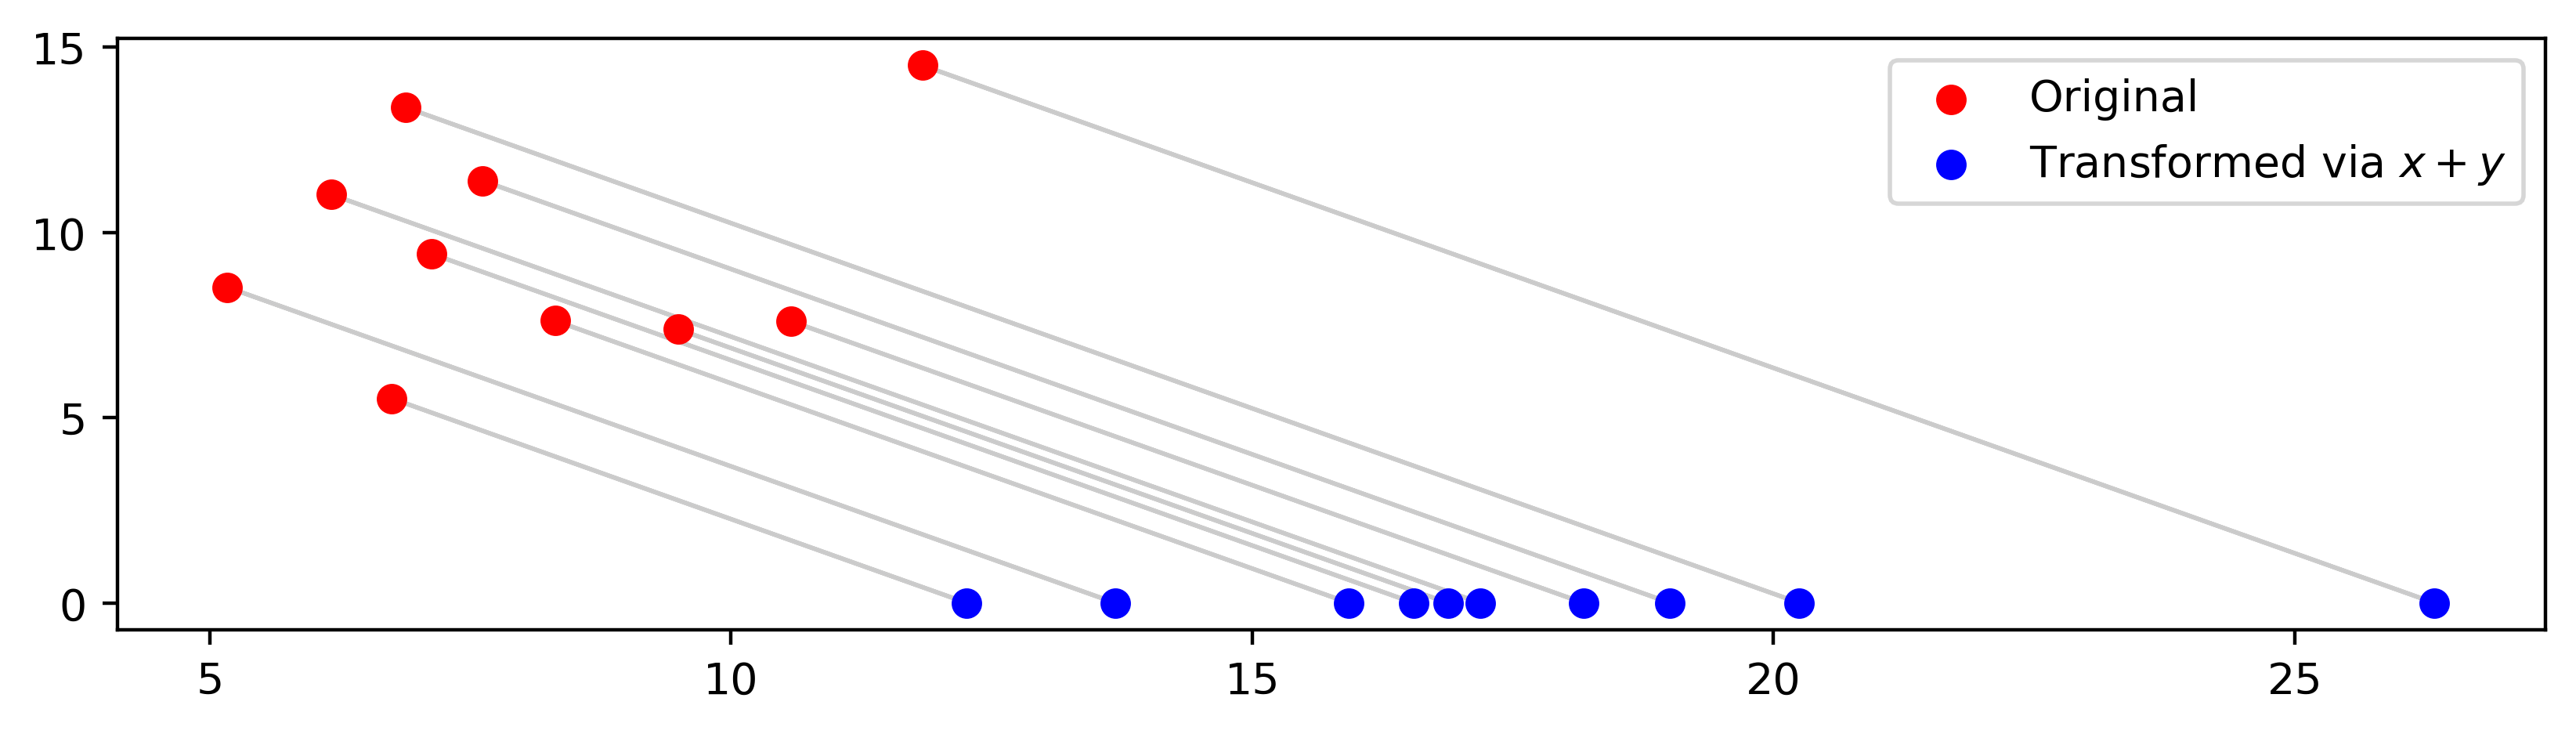

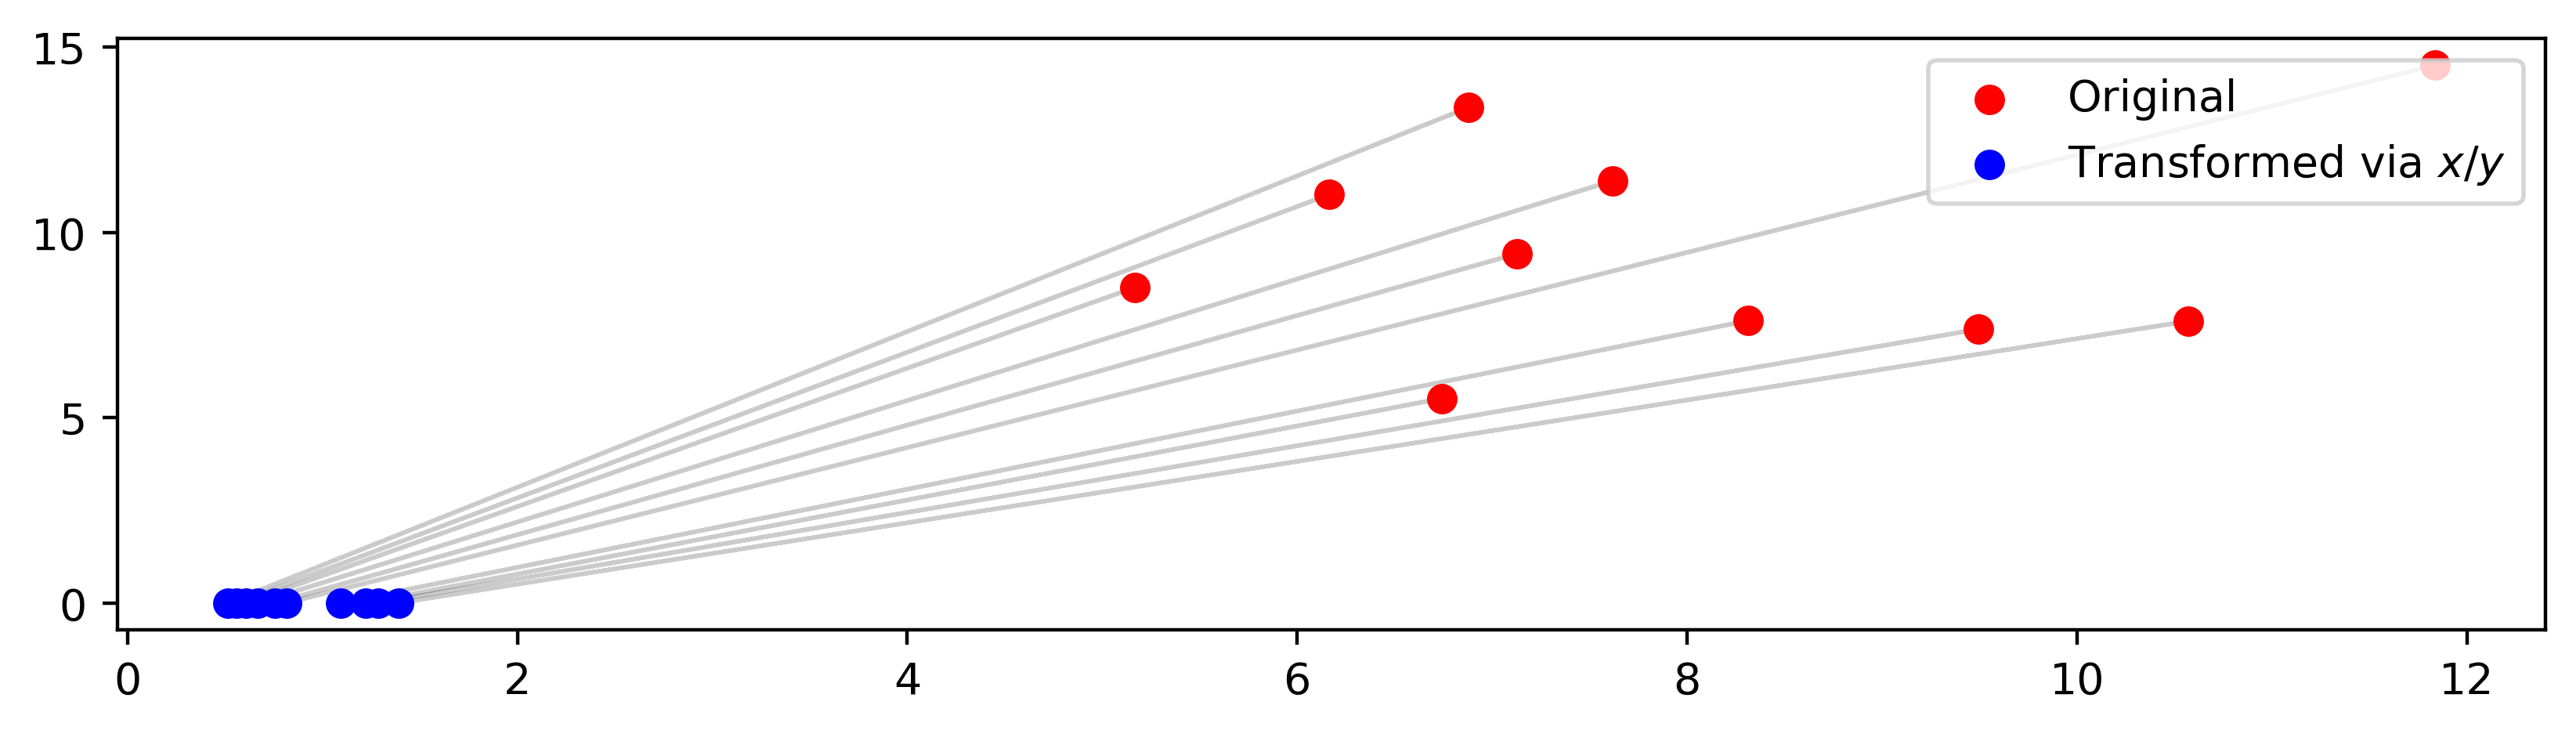

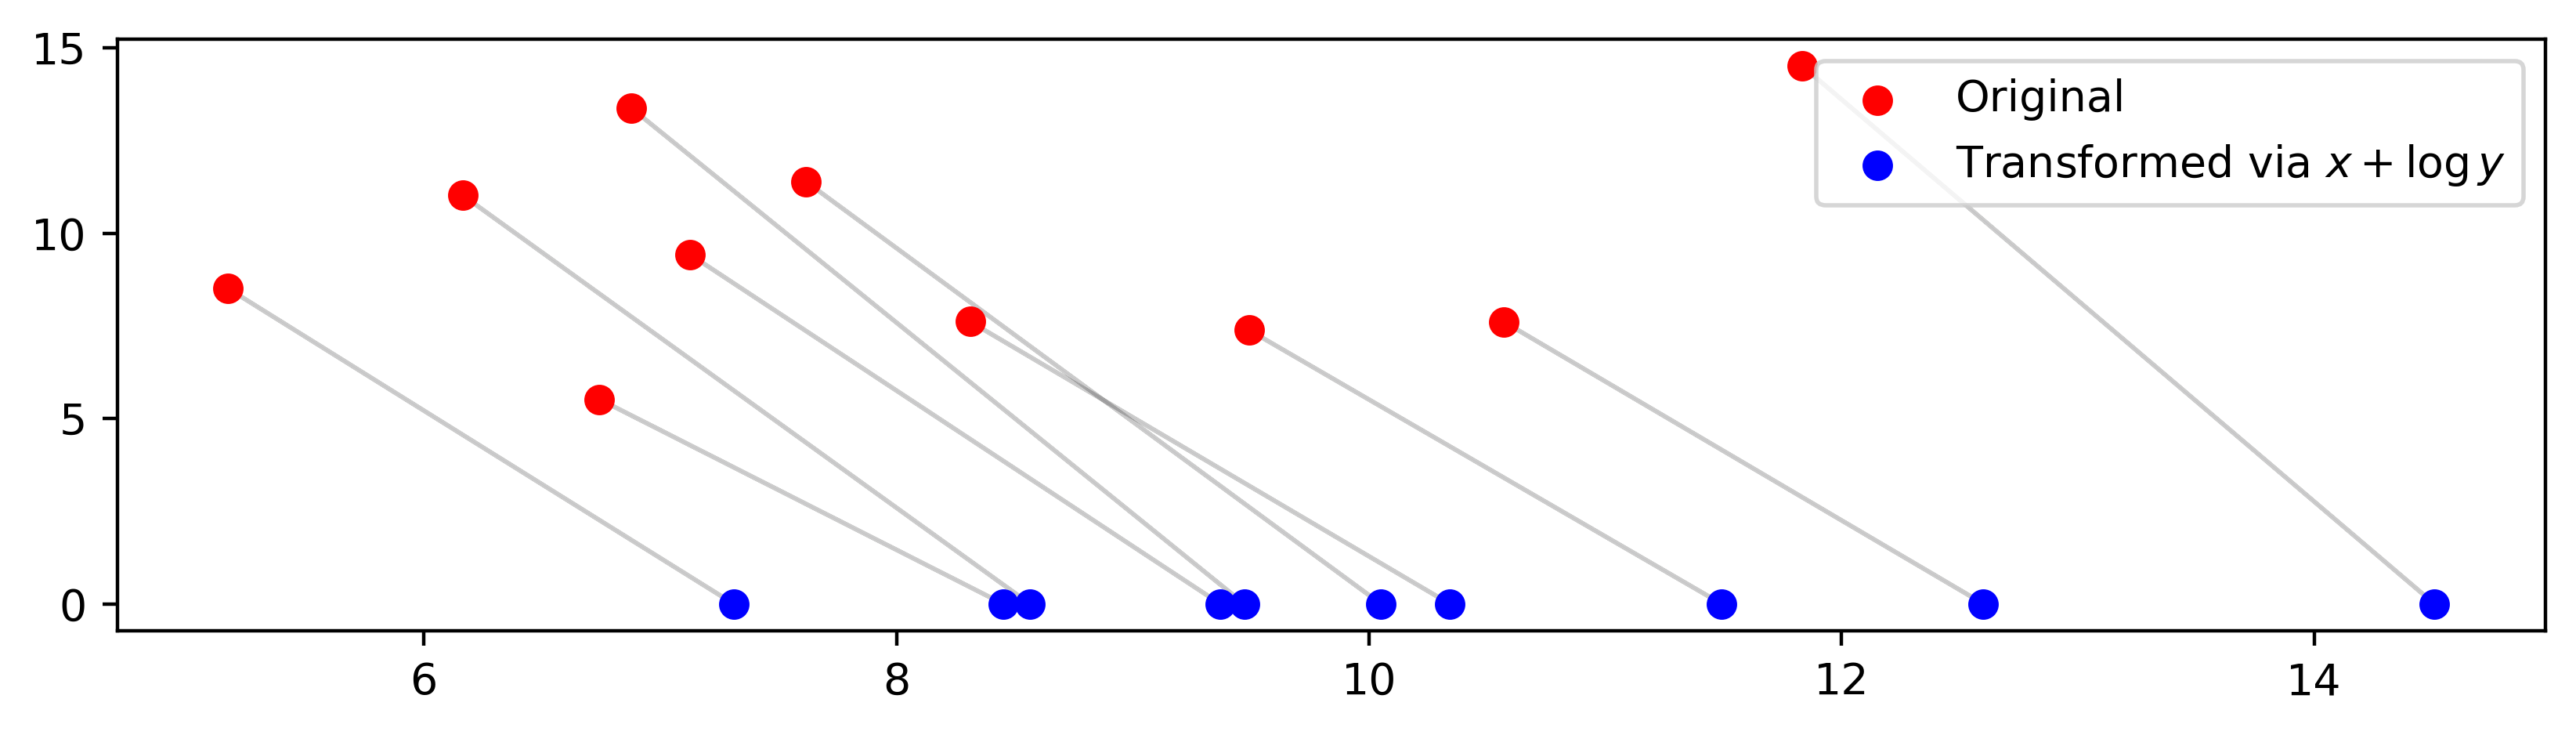

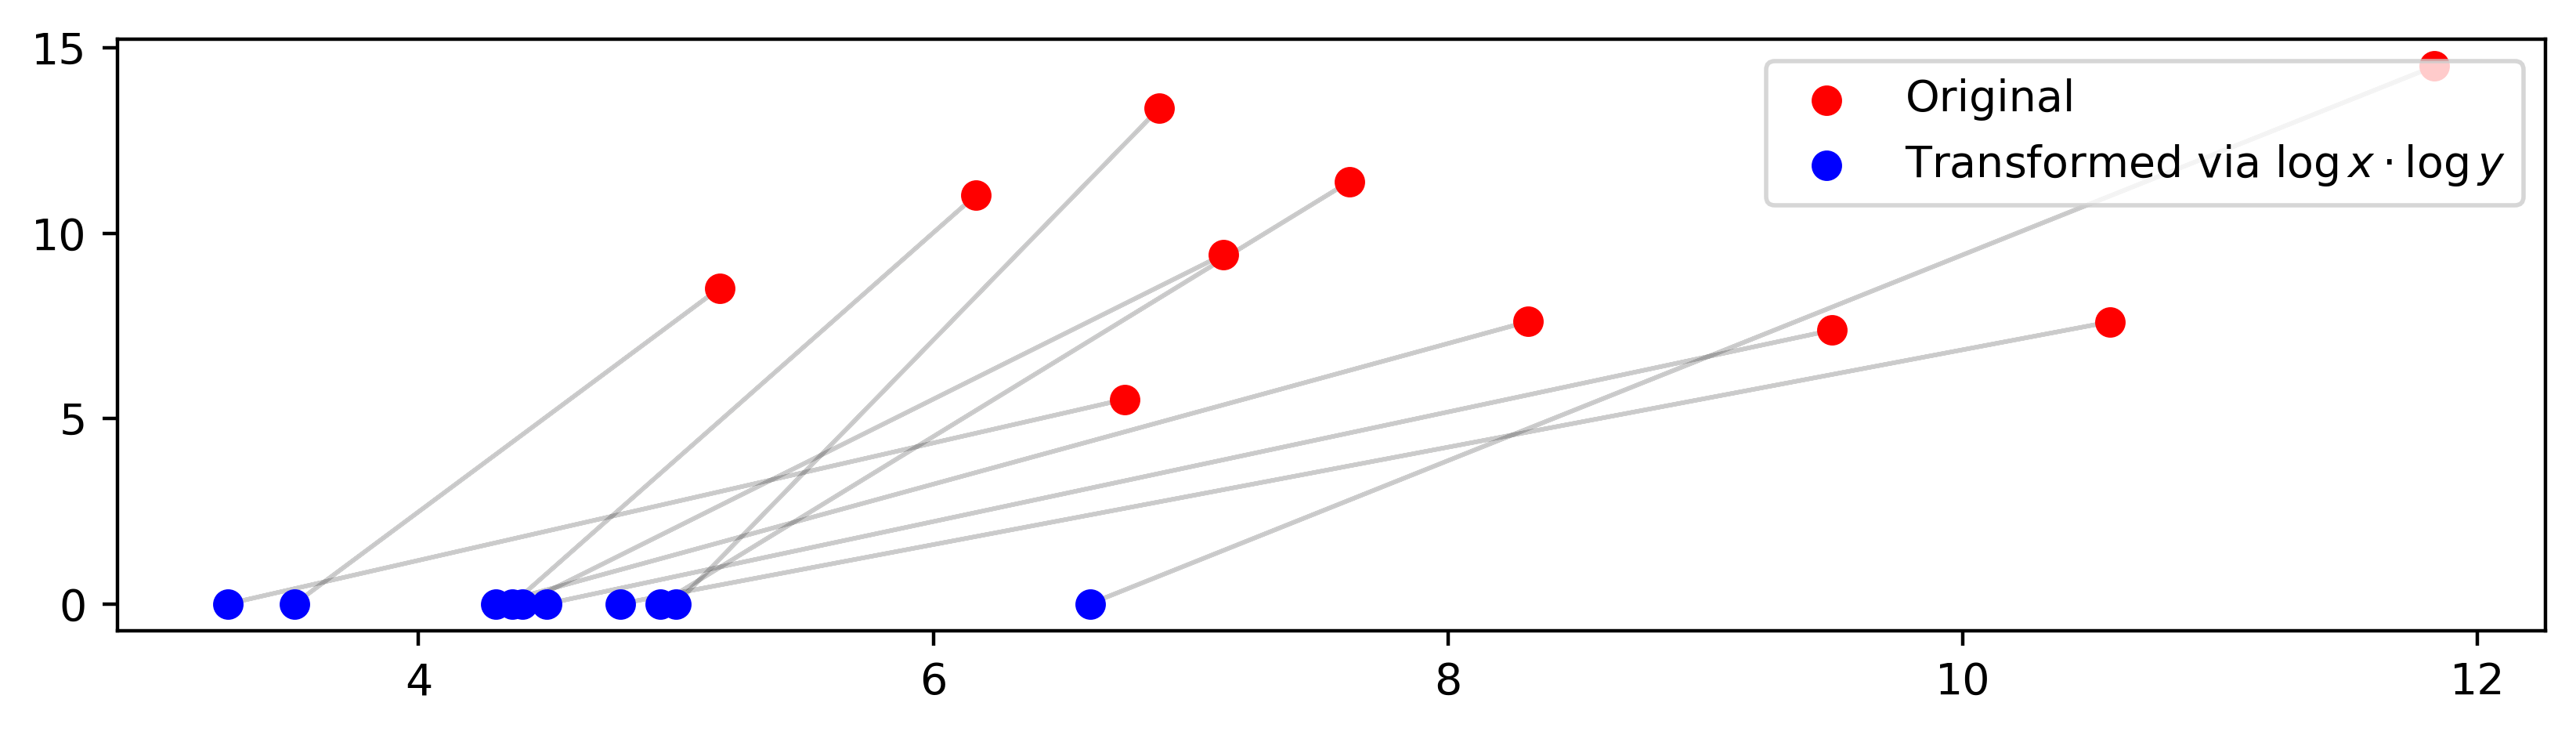

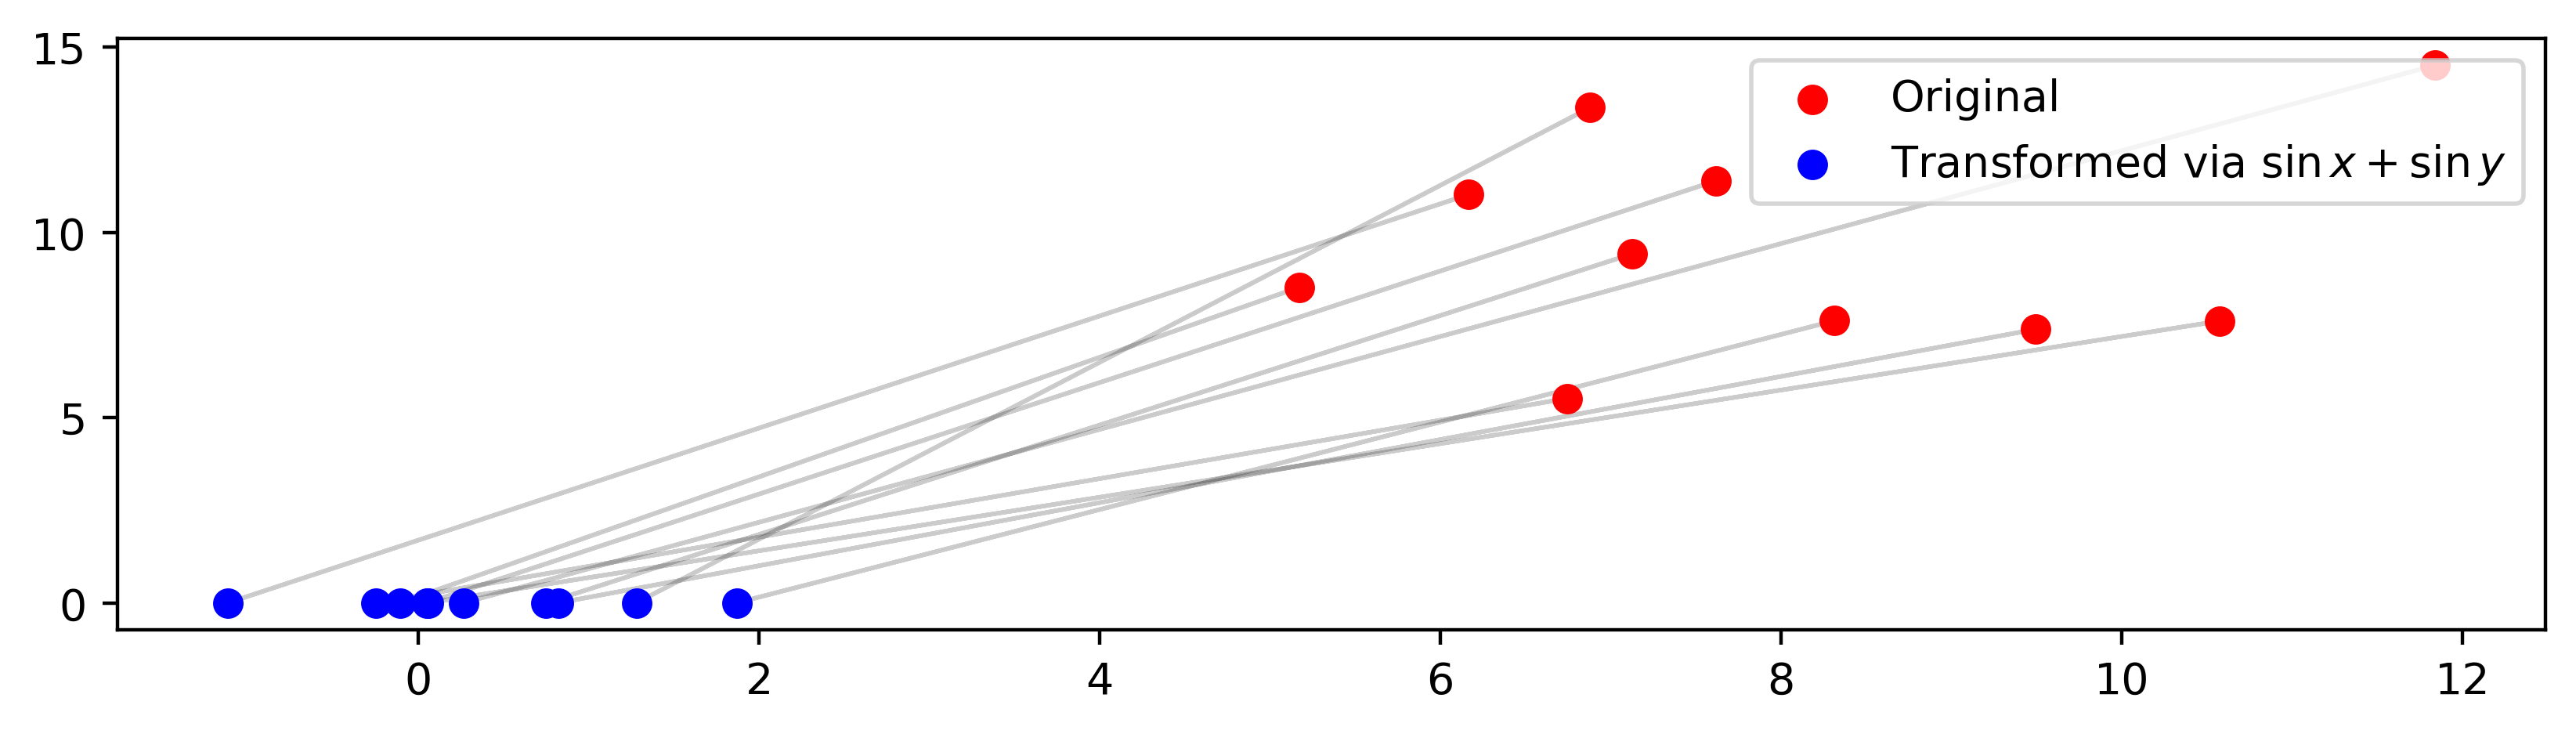

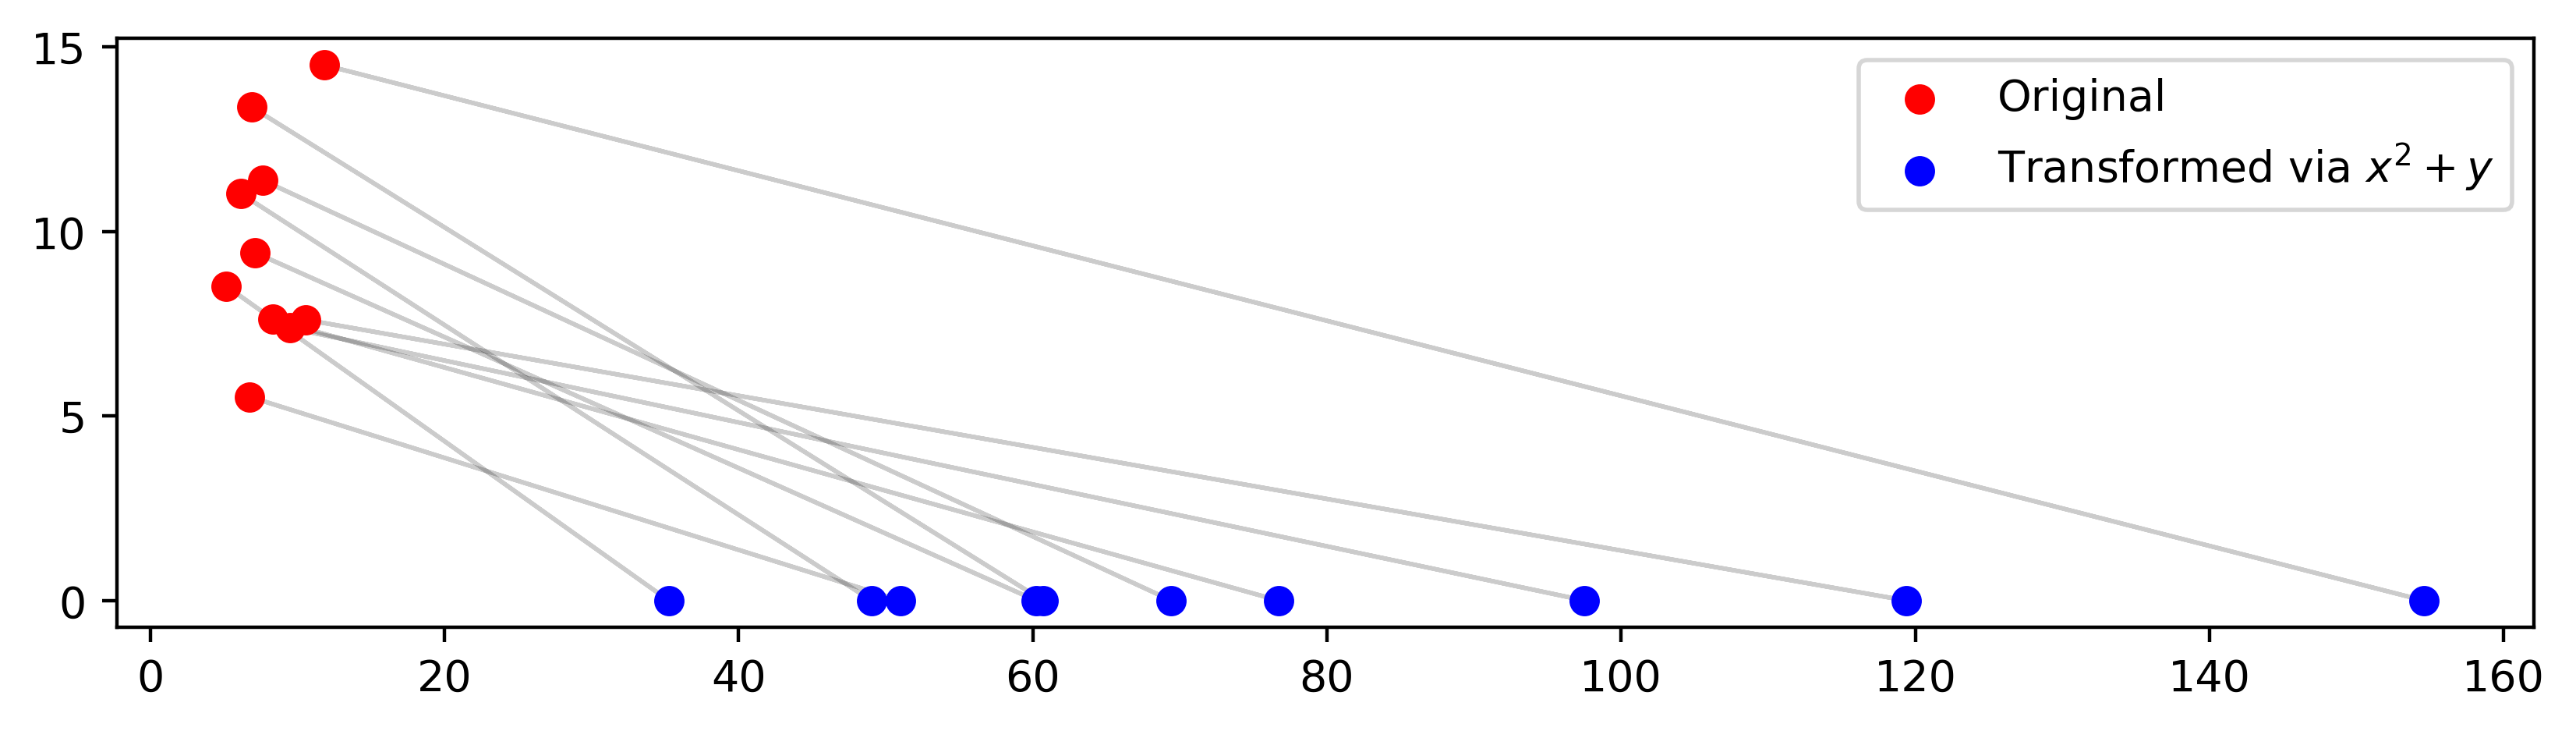

In [ ]:
x = np.random.uniform(5, 15, size=(10,))
y = np.random.uniform(5, 15, size=(10,))

trans = x + y

fig, ax = plt.subplots(figsize=(10, 2.5), dpi=400)
for i in range(len(x)):
    plt.arrow(x[i], y[i], trans[i]-x[i], -y[i], alpha=0.2)
plt.scatter(x, y, color='red', label='Original')
plt.scatter(trans, [0]*len(trans), color='blue', label='Transformed via $x+y$')
plt.legend()
plt.show()

trans = x / y

fig, ax = plt.subplots(figsize=(10, 2.5), dpi=400)
for i in range(len(x)):
    plt.arrow(x[i], y[i], trans[i]-x[i], -y[i], alpha=0.2)
plt.scatter(x, y, color='red', label='Original')
plt.scatter(trans, [0]*len(trans), color='blue', label='Transformed via $x/y$')
plt.legend()
plt.show()

trans = x + np.log(y)

fig, ax = plt.subplots(figsize=(10, 2.5), dpi=400)
for i in range(len(x)):
    plt.arrow(x[i], y[i], trans[i]-x[i], -y[i], alpha=0.2)
plt.scatter(x, y, color='red', label='Original')
plt.scatter(trans, [0]*len(trans), color='blue', label='Transformed via $x + \log y$')
plt.legend()
plt.show()

trans = np.log(x) * np.log(y)

fig, ax = plt.subplots(figsize=(10, 2.5), dpi=400)
for i in range(len(x)):
    plt.arrow(x[i], y[i], trans[i]-x[i], -y[i], alpha=0.2)
plt.scatter(x, y, color='red', label='Original')
plt.scatter(trans, [0]*len(trans), color='blue', label='Transformed via $\log x \cdot \log y$')
plt.legend()
plt.show()

trans = np.sin(x) + np.sin(y)

fig, ax = plt.subplots(figsize=(10, 2.5), dpi=400)
for i in range(len(x)):
    plt.arrow(x[i], y[i], trans[i]-x[i], -y[i], alpha=0.2)
plt.scatter(x, y, color='red', label='Original')
plt.scatter(trans, [0]*len(trans), color='blue', label='Transformed via $\sin x + \sin y$')
plt.legend()
plt.show()

trans = x**2 + y

fig, ax = plt.subplots(figsize=(10, 2.5), dpi=400)
for i in range(len(x)):
    plt.arrow(x[i], y[i], trans[i]-x[i], -y[i], alpha=0.2)
plt.scatter(x, y, color='red', label='Original')
plt.scatter(trans, [0]*len(trans), color='blue', label='Transformed via $x^2 + y$')
plt.legend()
plt.show()

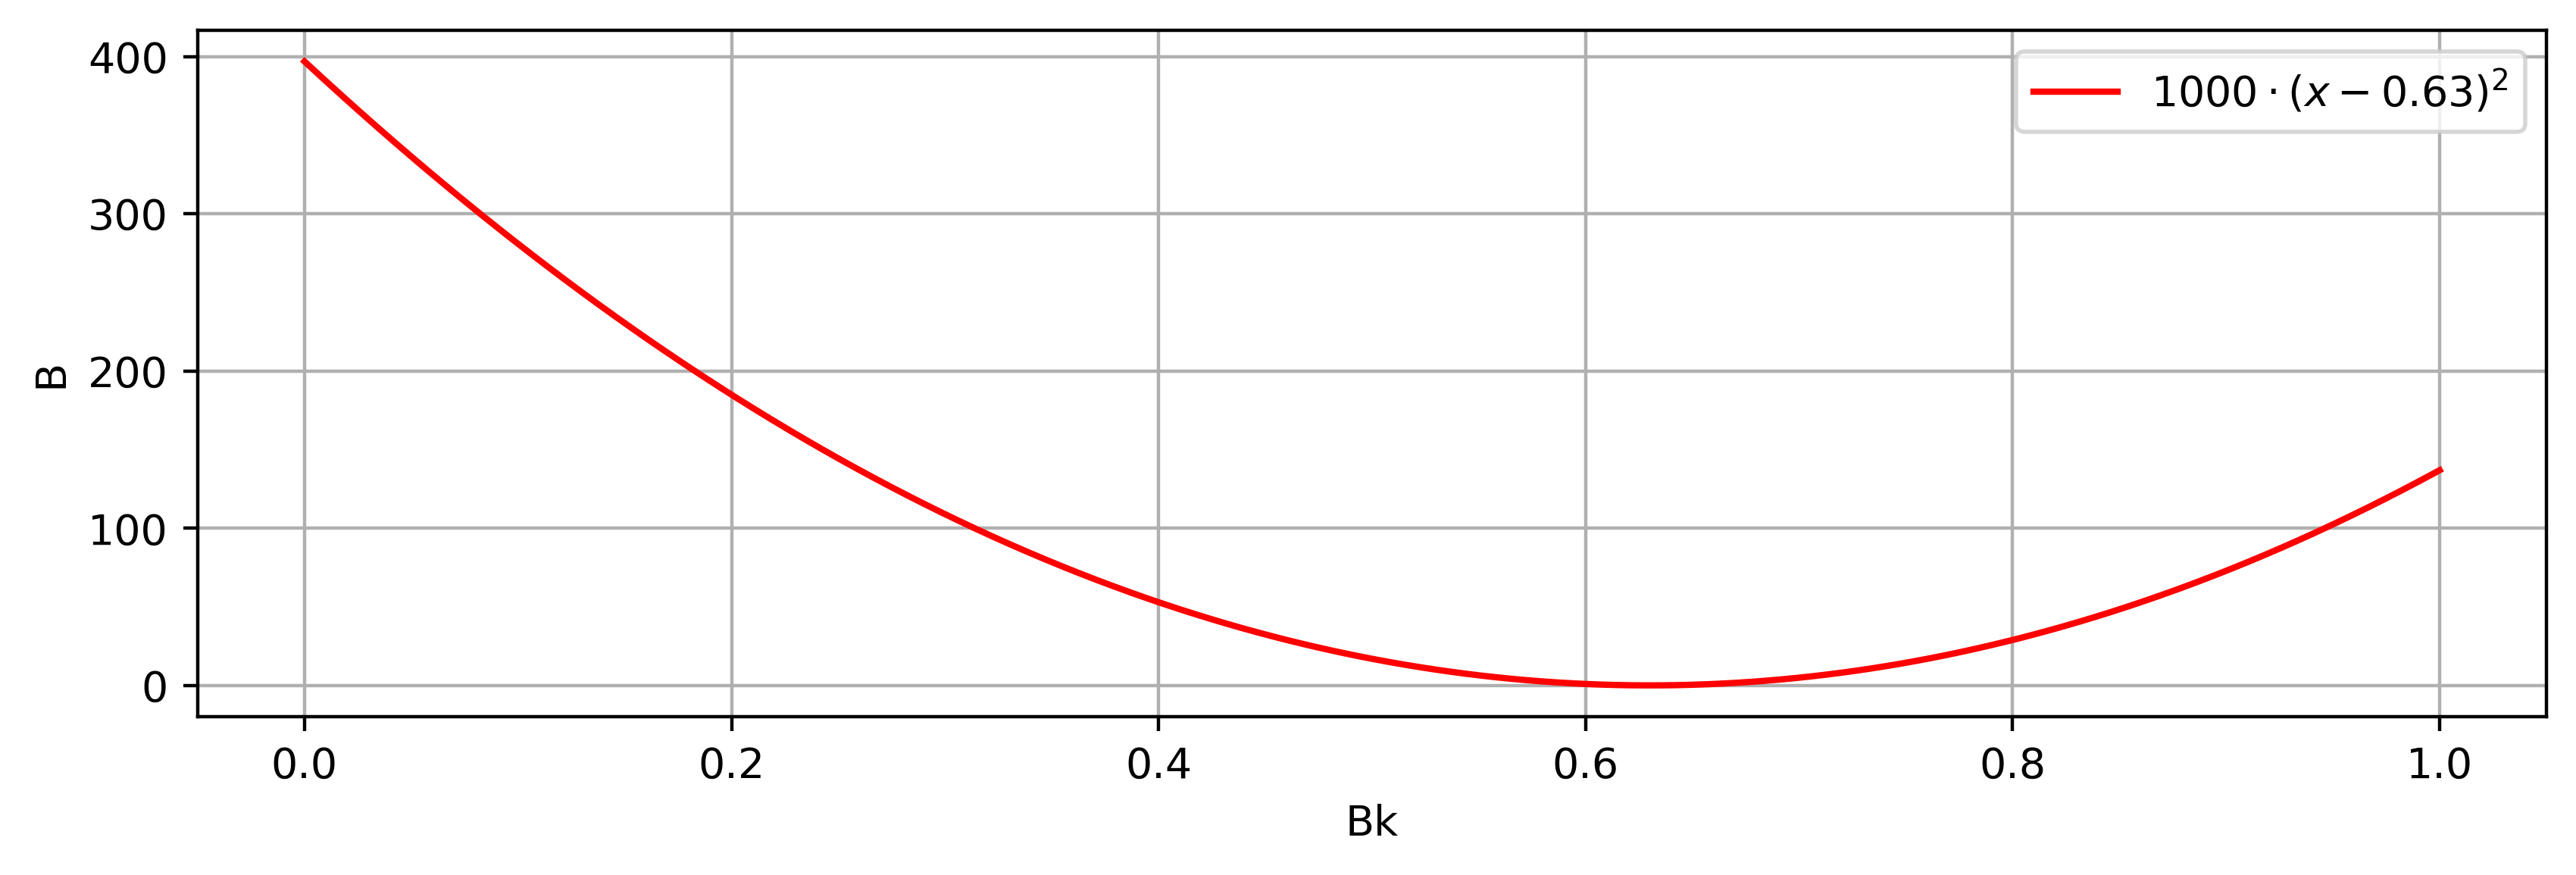

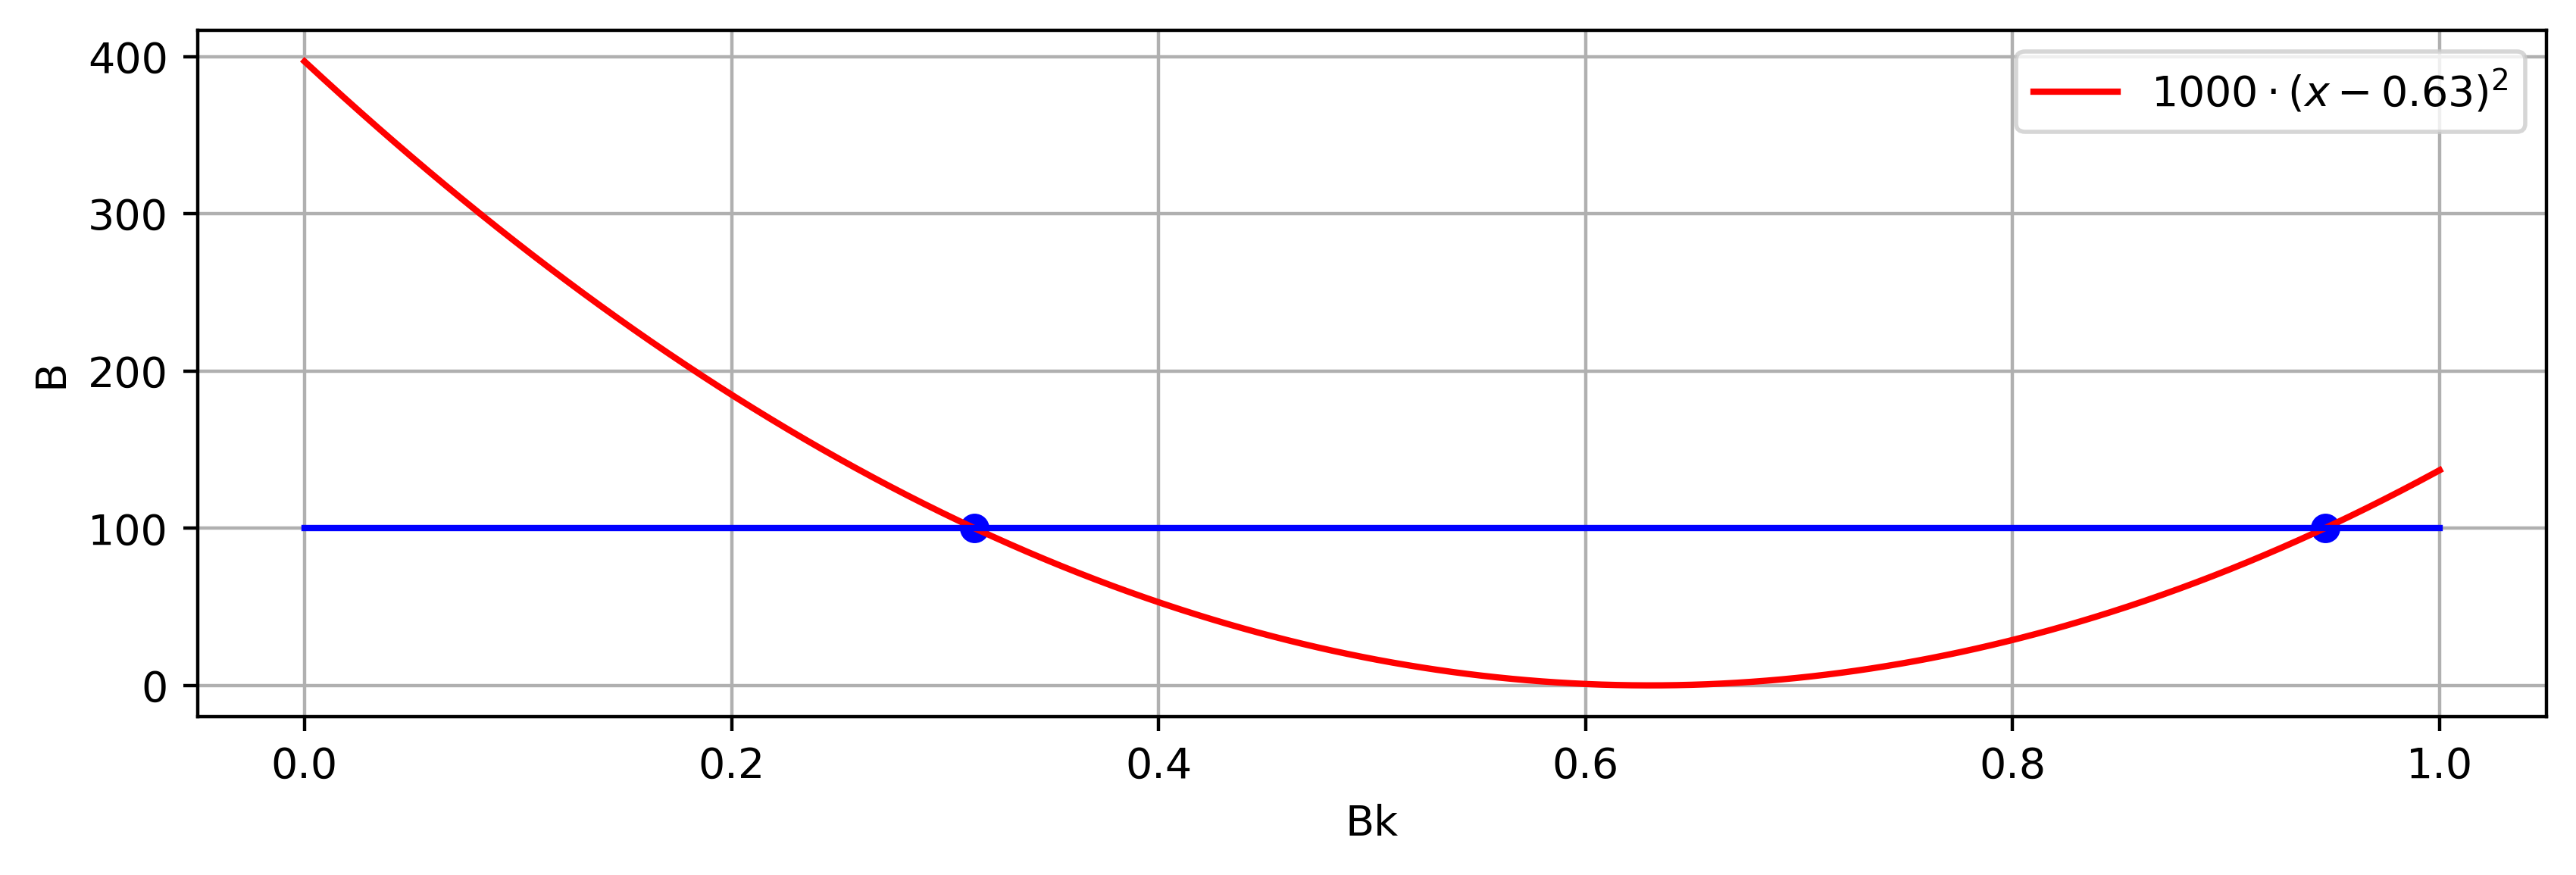

In [ ]:
x = np.linspace(0, 1, 1000)
y = 1000*(x-0.63)**2

plt.figure(figsize=(10, 3), dpi=400)
plt.plot(x, y, color='red', label='$1000\cdot(x-0.63)^2$')
plt.ylabel('B')
plt.xlabel('Bk')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10, 3), dpi=400)
plt.plot(x, y, color='red', label='$1000\cdot(x-0.63)^2$')
plt.ylabel('B')
plt.xlabel('Bk')
plt.plot([0, 1], [100, 100], color='blue')
plt.scatter([np.sqrt(0.1)+0.63, -np.sqrt(0.1)+.63], [100, 100], color='blue')
plt.grid()
plt.legend()
plt.show()

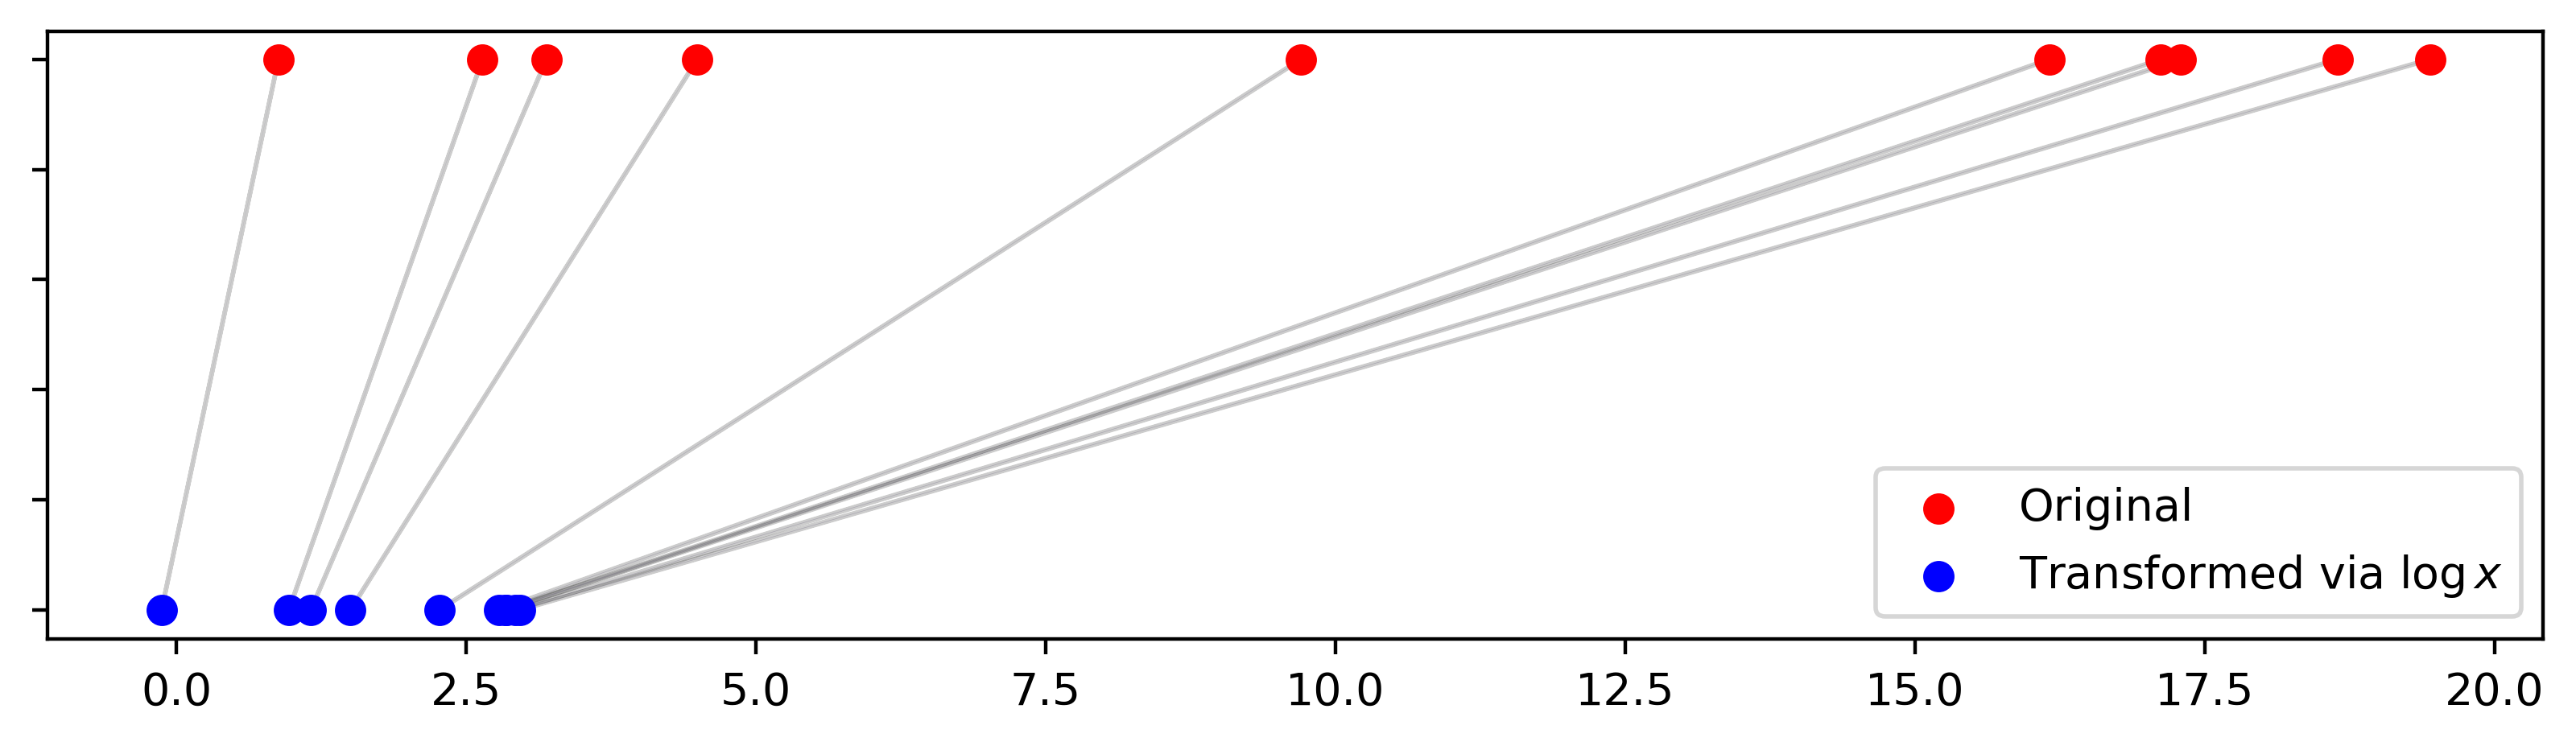

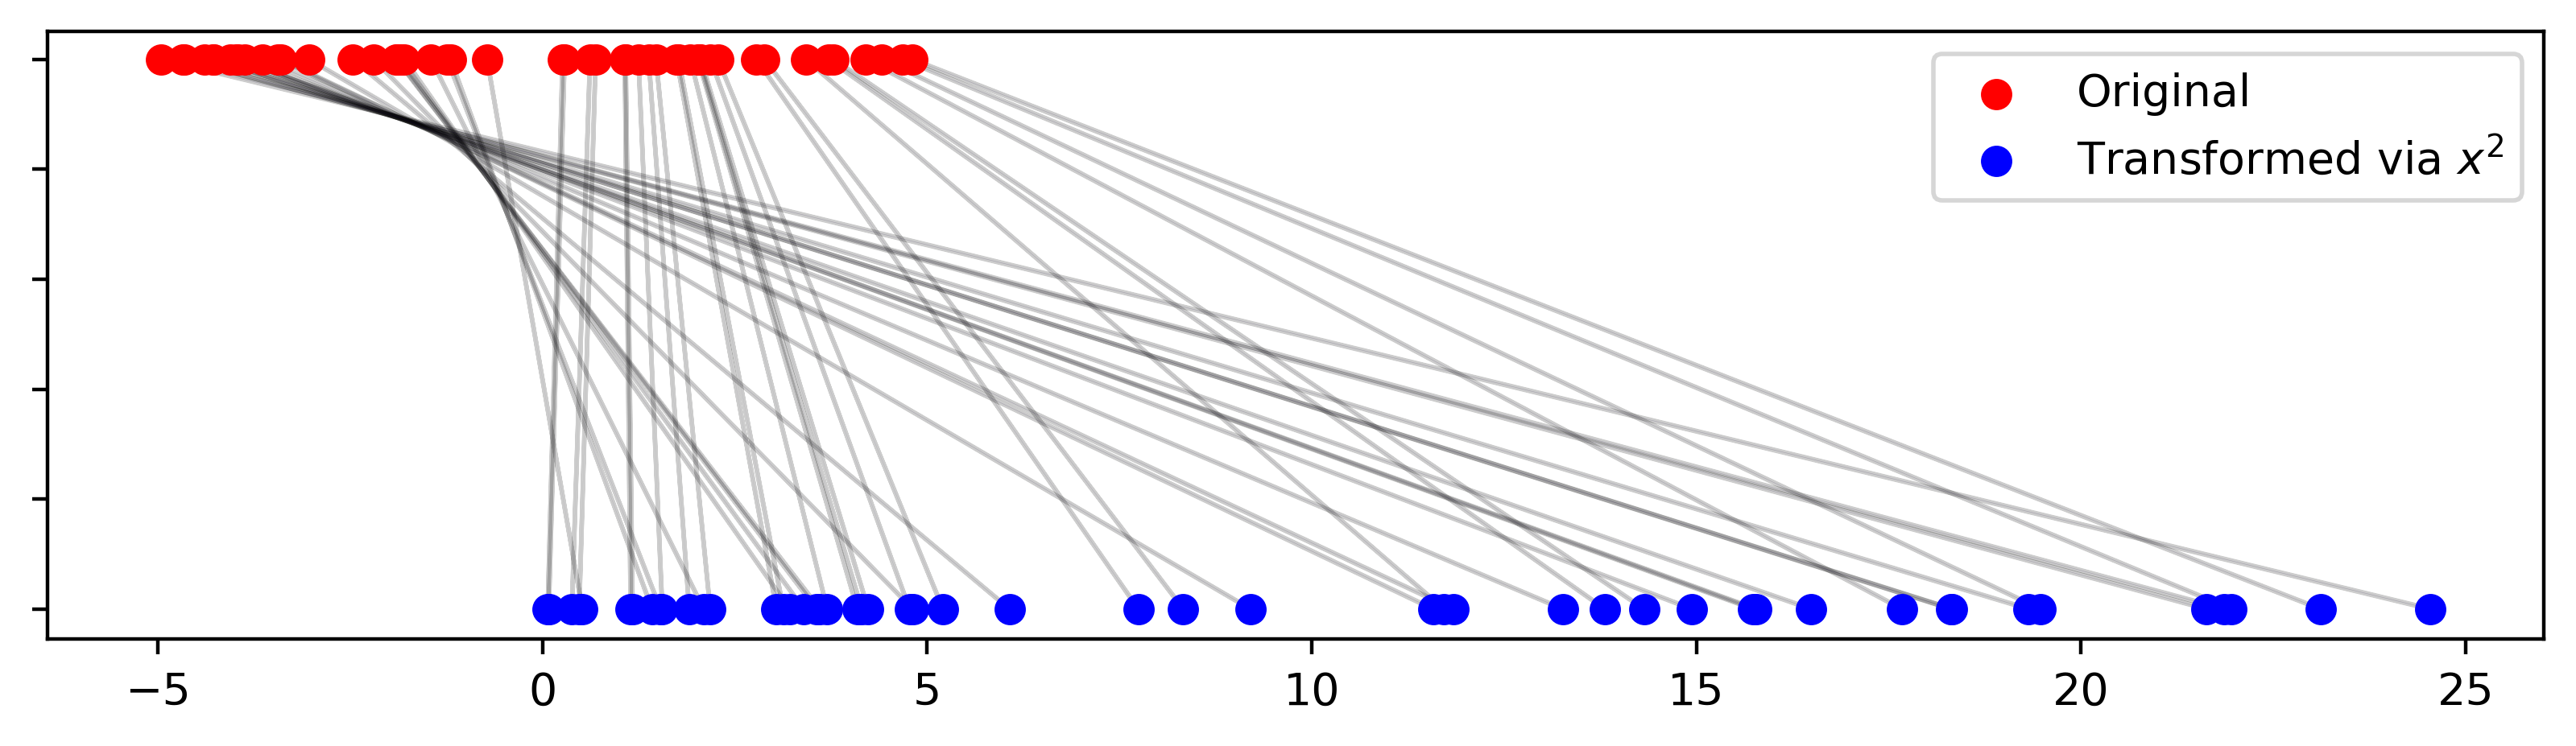

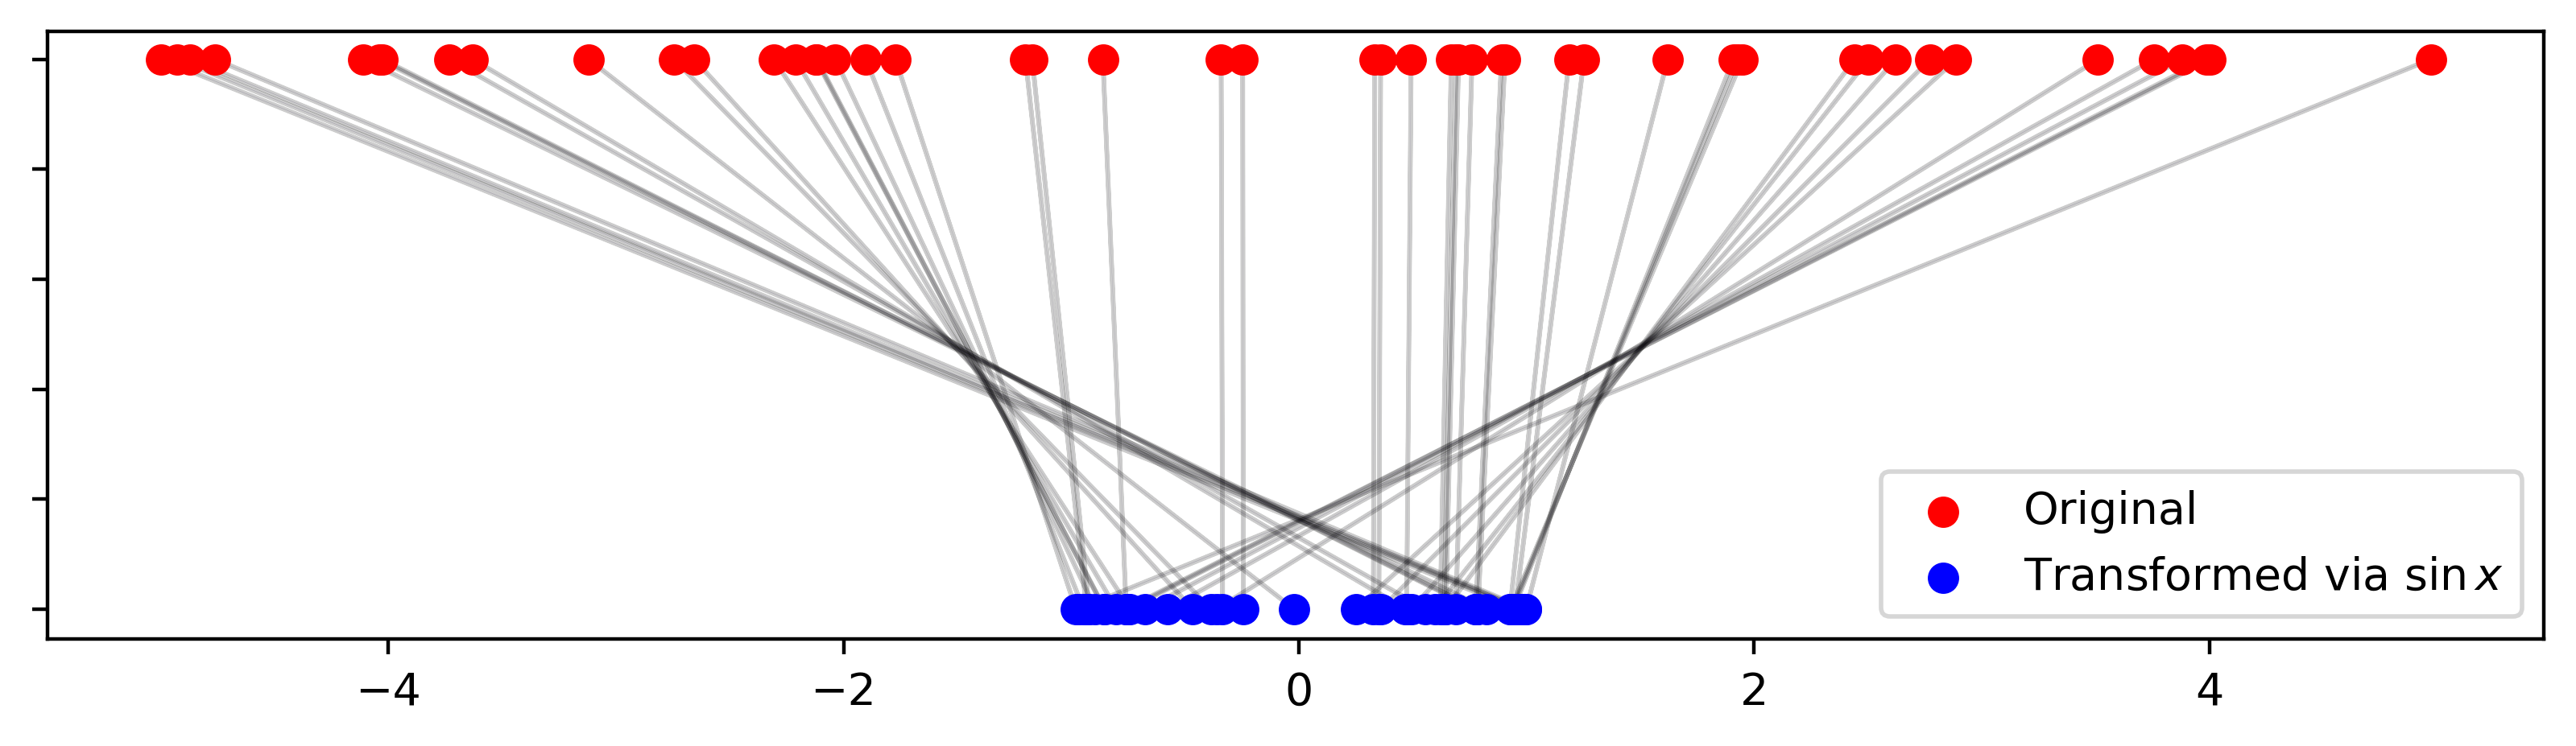

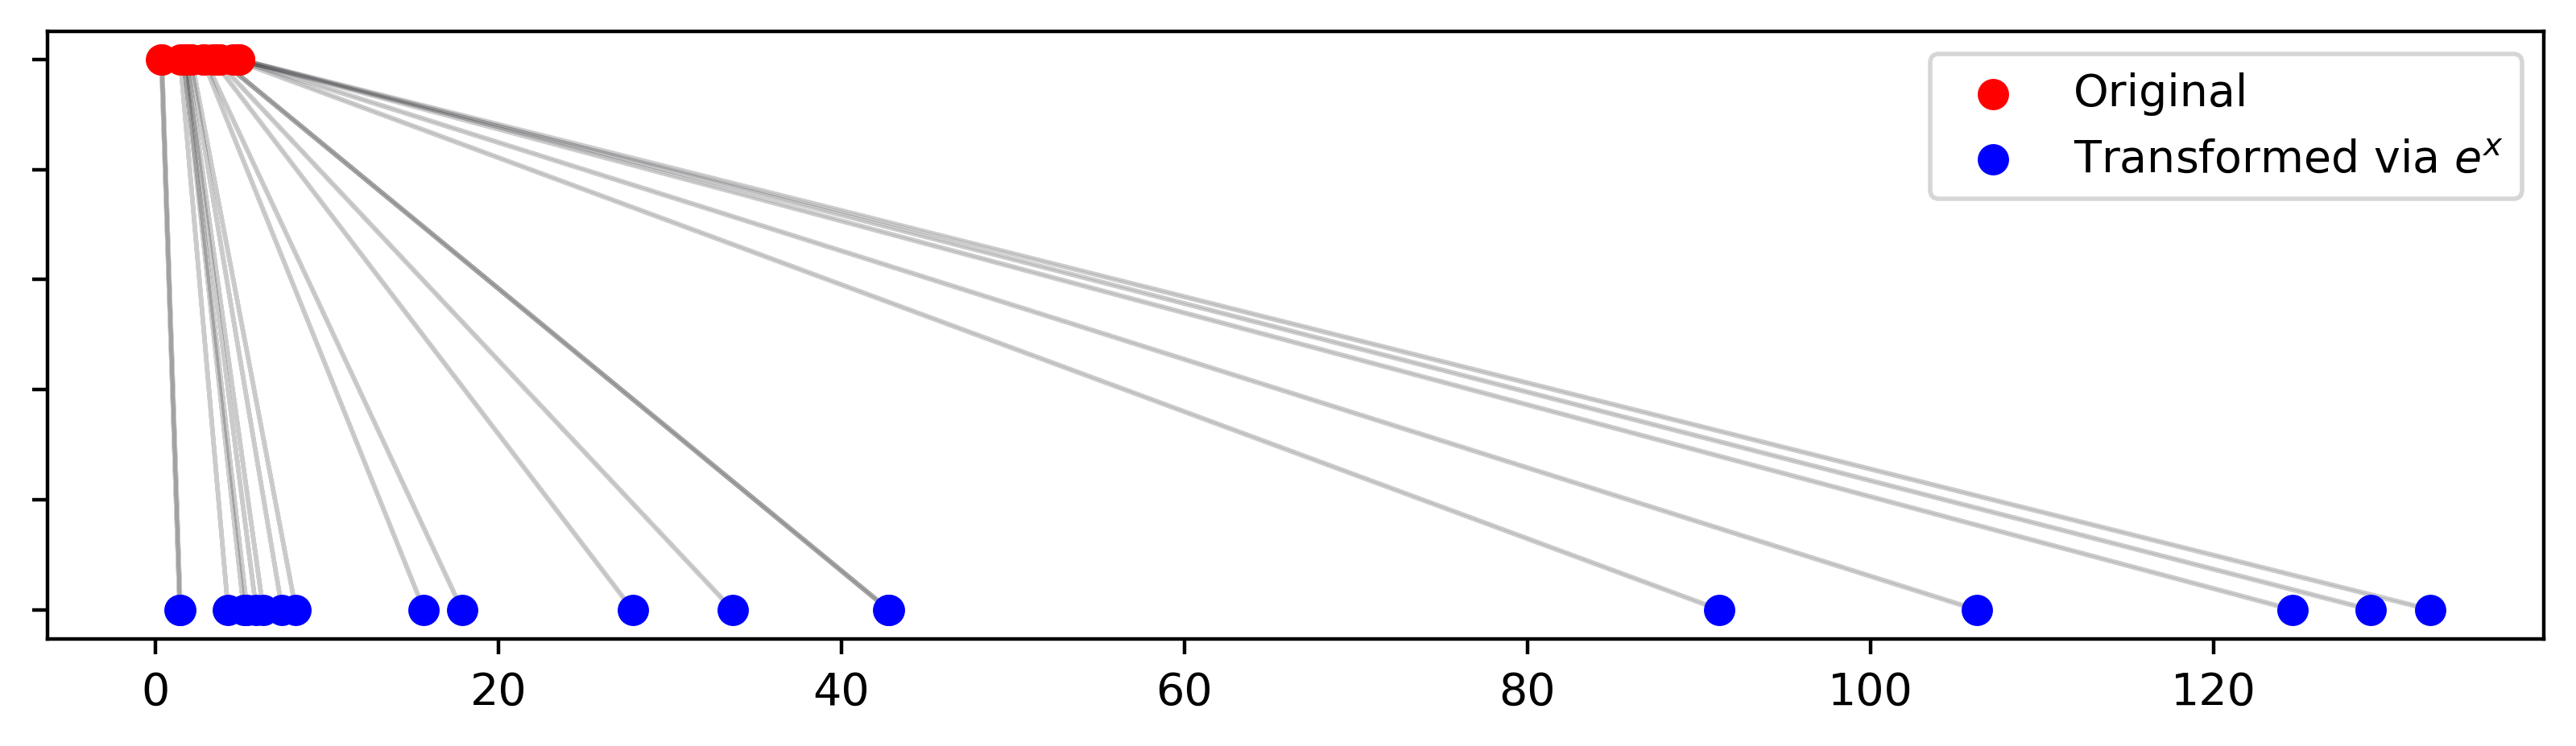

In [ ]:
orig_val = np.random.uniform(0, 20, size=(10,))

transformed_val = np.log(orig_val)
fig, ax = plt.subplots(figsize=(10, 2.5), dpi=400)
for i in range(len(orig_val)):
    plt.arrow(orig_val[i], 1, transformed_val[i] - orig_val[i], -1, alpha=0.2)
plt.scatter(orig_val, [1]*len(orig_val), color='red', label='Original')
plt.scatter(transformed_val, [0]*len(orig_val), color='blue', label='Transformed via $\log x$')
ax.set_yticklabels([])
plt.legend()
plt.show()

orig_val = np.random.uniform(-5, 5, size=(50,))
transformed_val = orig_val**2
fig, ax = plt.subplots(figsize=(10, 2.5), dpi=400)
for i in range(len(orig_val)):
    plt.arrow(orig_val[i], 1, transformed_val[i] - orig_val[i], -1, alpha=0.2)
plt.scatter(orig_val, [1]*len(orig_val), color='red', label='Original')
plt.scatter(transformed_val, [0]*len(orig_val), color='blue', label='Transformed via $x^2$')
ax.set_yticklabels([])
plt.legend()
plt.show()

orig_val = np.random.uniform(-5, 5, size=(50,))
transformed_val = np.sin(orig_val)
fig, ax = plt.subplots(figsize=(10, 2.5), dpi=400)
for i in range(len(orig_val)):
    plt.arrow(orig_val[i], 1, transformed_val[i] - orig_val[i], -1, alpha=0.2)
plt.scatter(orig_val, [1]*len(orig_val), color='red', label='Original')
plt.scatter(transformed_val, [0]*len(orig_val), color='blue', label='Transformed via $\sin x$')
ax.set_yticklabels([])
plt.legend()
plt.show()

orig_val = np.random.uniform(0, 5, size=(20,))
transformed_val = np.e**orig_val
fig, ax = plt.subplots(figsize=(10, 2.5), dpi=400)
for i in range(len(orig_val)):
    plt.arrow(orig_val[i], 1, transformed_val[i] - orig_val[i], -1, alpha=0.2)
plt.scatter(orig_val, [1]*len(orig_val), color='red', label='Original')
plt.scatter(transformed_val, [0]*len(orig_val), color='blue', label='Transformed via $e^x$')
ax.set_yticklabels([])
plt.legend()
plt.show()

### Principal Component Analysis

#### PCA Visualizations

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


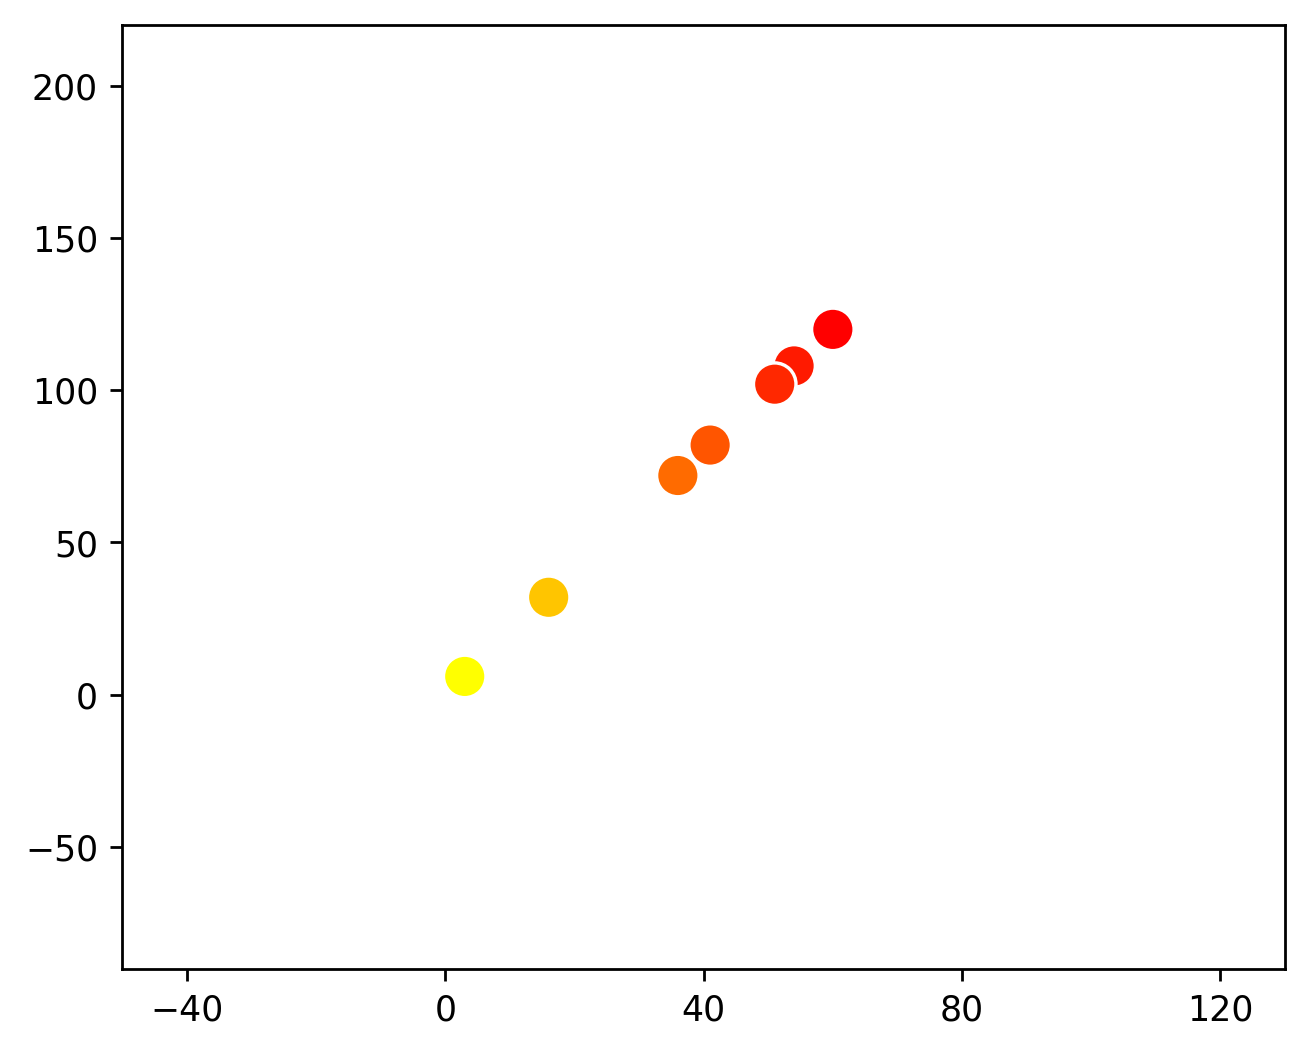

In [ ]:
from numpy.random import default_rng

rng = default_rng(seed=77)
pca_x = rng.choice(70, size=7, replace=False)
pca_y = 2*pca_x

plt.figure(figsize=(6, 5), dpi=250)
plt.xlim(-50, 130)
plt.ylim(-90, 220)
plt.xticks([-40, 0, 40, 80, 120])
# plt.yticks([-40, 0, 40, 80, 120])
sns.scatterplot(pca_x, pca_y, s=150, c=pca_y, cmap="autumn_r")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


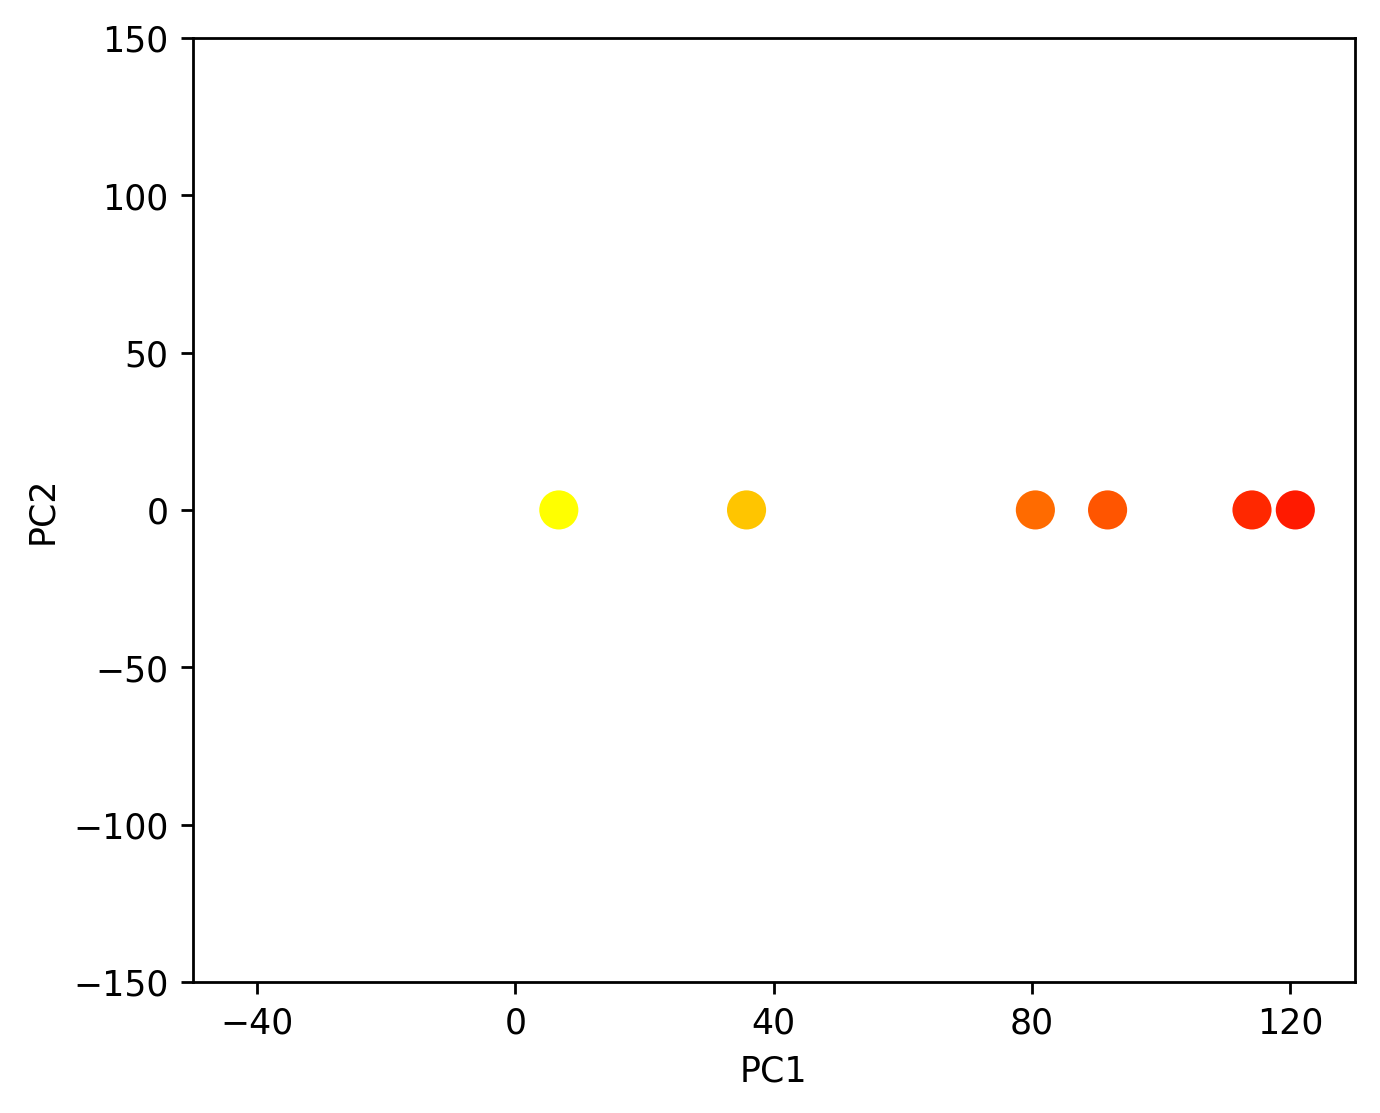

In [ ]:
def rotate(p, origin=(0, 0), degrees=0):
    angle = np.deg2rad(degrees)
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle),  np.cos(angle)]])
    o = np.atleast_2d(origin)
    p = np.atleast_2d(p)
    return np.squeeze((R @ (p.T-o.T) + o.T).T)

x_li = []
y_li = []
for i in zip(pca_x, pca_y):
    new_x, new_y = rotate(i, (0, 0),-63.435)
    x_li.append(new_x)
    y_li.append(new_y)
    
plt.figure(figsize=(6, 5), dpi=250)
plt.xlim(-50, 130)
plt.ylim(-150, 150)
plt.xticks([-40, 0, 40, 80, 120])
plt.xlabel("PC1")
plt.ylabel("PC2")
sns.scatterplot(x_li, y_li, s=150, c=pca_y, cmap="autumn_r")
plt.show()

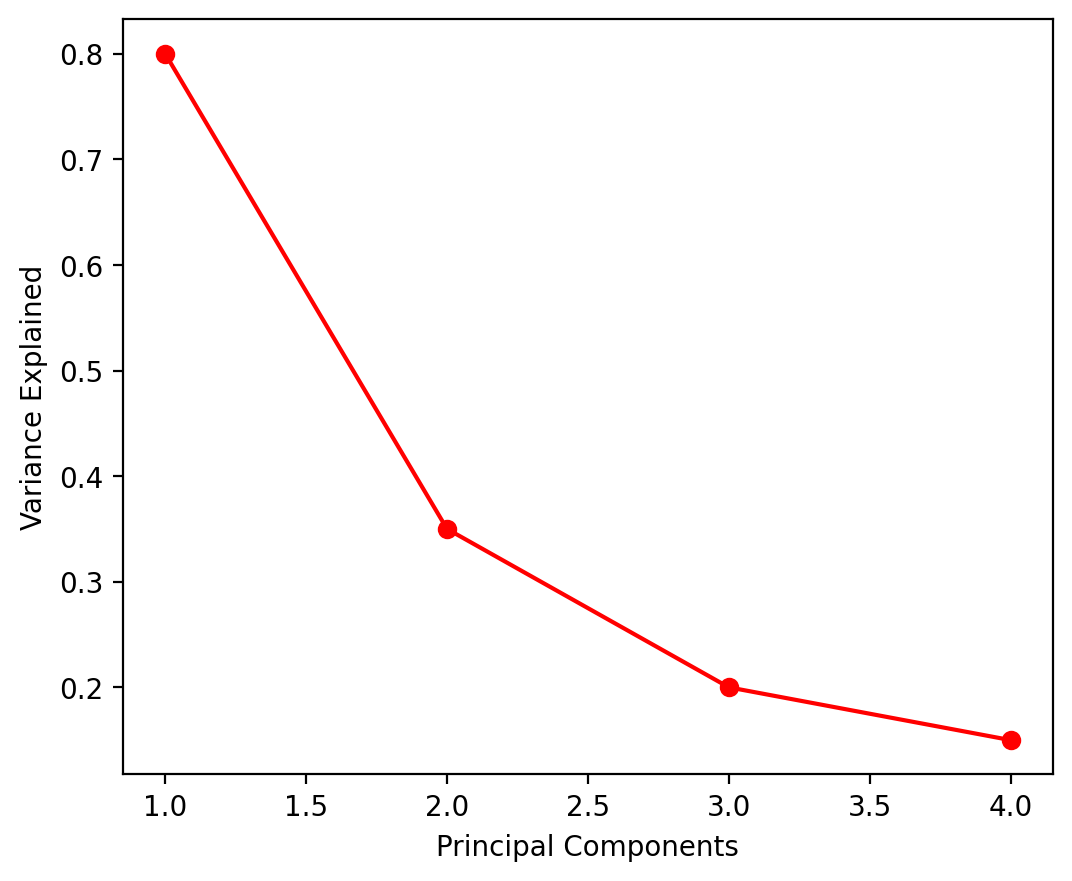

In [ ]:
pc_li = [1, 2, 3, 4,]
var_li = [0.8, 0.35, 0.2, 0.15]
plt.figure(figsize=(6, 5), dpi=200)
plt.ylabel("Variance Explained")
plt.xlabel("Principal Components")
plt.plot(pc_li, var_li, "ro-")
plt.show()

#### Applying PCA

In [ ]:
# Dummy Dataset where the goal to predict diagnosis of breast cancer
from sklearn.datasets import load_breast_cancer
# PCA
from sklearn.decomposition import PCA
# standarization
from sklearn.preprocessing import StandardScaler

breast_cancer = load_breast_cancer()
breast_cancer = pd.DataFrame(data=np.concatenate([breast_cancer["data"], breast_cancer["target"].reshape(-1, 1)], axis=1), 
                             columns=np.append(breast_cancer["feature_names"],"diagnostic"))

# standarize
scaler = StandardScaler()
breast_cancer_scaled = scaler.fit_transform(breast_cancer.drop("diagnostic", axis=1))
# the data originally have 30 features, for visualization purposes later on, 
# we're only going to keep 2 principal components
pca = PCA(n_components=2)
# transform on features
new_data = pca.fit_transform(breast_cancer_scaled)
# reconstruct dataframe
new_data = pd.DataFrame(new_data, columns=[f"PCA{i+1}" for i in range(new_data.shape[1])])
new_data["diagnostic"] = breast_cancer["diagnostic"]

In [ ]:
# we're dropping the target column in new_data and not the 
# original to keep the ordering of columns
combined_data = pd.concat([new_data.drop("diagnostic", axis=1), breast_cancer], axis=1)
combined_data

PCA1       PCA2  mean radius  mean texture  mean perimeter  \
0     9.192837   1.948583        17.99         10.38          122.80   
1     2.387802  -3.768172        20.57         17.77          132.90   
2     5.733896  -1.075174        19.69         21.25          130.00   
3     7.122953  10.275589        11.42         20.38           77.58   
4     3.935302  -1.948072        20.29         14.34          135.10   
..         ...        ...          ...           ...             ...   
564   6.439315  -3.576817        21.56         22.39          142.00   
565   3.793382  -3.584048        20.13         28.25          131.20   
566   1.256179  -1.902297        16.60         28.08          108.30   
567  10.374794   1.672010        20.60         29.33          140.10   
568  -5.475243  -0.670637         7.76         24.54           47.92   

     mean area  mean smoothness  mean compactness  mean concavity  \
0       1001.0          0.11840           0.27760         0.30010   
1       1326.0          0.08474           0.07864         0.08690   
2       1203.0          0.10960           0.15990         0.19740   
3        386.1          0.14250           0.28390         0.24140   
4       1297.0          0.10030           0.13280         0.19800   
..         ...              ...               ...             ...   
564     1479.0          0.11100           0.11590         0.24390   
565     1261.0          0.09780           0.10340         0.14400   
566      858.1          0.08455           0.10230         0.09251   
567     1265.0          0.11780           0.27700         0.35140   
568      181.0          0.05263           0.04362         0.00000   

     mean concave points  ...  worst texture  worst perimeter  worst area  \
0                0.14710  ...          17.33           184.60      2019.0   
1                0.07017  ...          23.41           158.80      1956.0   
2                0.12790  ...          25.53           152.50      1709.0   
3                0.10520  ...          26.50            98.87       567.7   
4                0.10430  ...          16.67           152.20      1575.0   
..                   ...  ...            ...              ...         ...   
564              0.13890  ...          26.40           166.10      2027.0   
565              0.09791  ...          38.25           155.00      1731.0   
566              0.05302  ...          34.12           126.70      1124.0   
567              0.15200  ...          39.42           184.60      1821.0   
568              0.00000  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  diagnostic  
0                  0.2654          0.4601                  0.11890         0.0  
1                  0.1860          0.2750                  0.08902         0.0  
2                  0.2430          0.3613                  0.08758         0.0  
3                  0.2575          0.6638                  0.17300         0.0  
4                  0.1625          0.2364                  0.07678         0.0  
..                    ...             ...                      ...         ...  
564                0.2216          0.2060                  0.07115         0.0  
565       

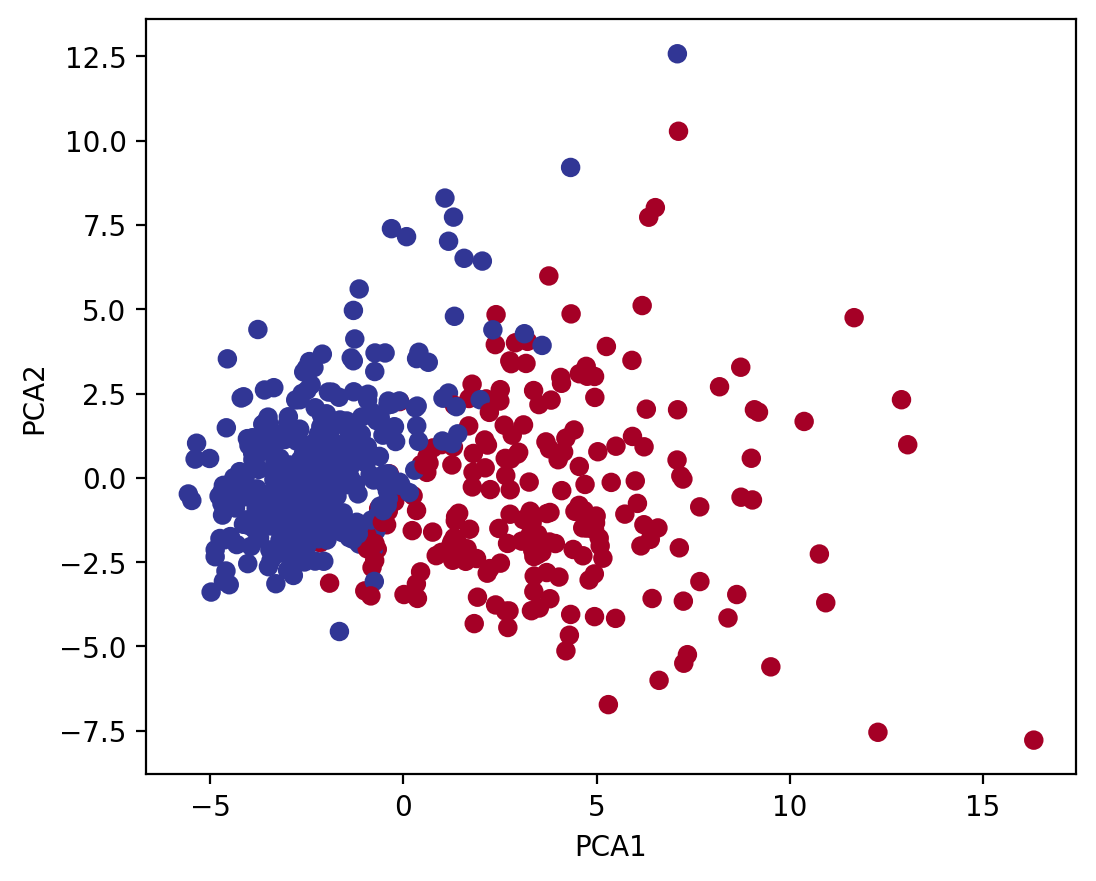

In [ ]:
plt.figure(figsize=(6, 5), dpi=200)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.scatter(new_data.PCA1, new_data.PCA2, c=new_data.diagnostic, cmap="RdYlBu")
plt.show()

### t-SNE

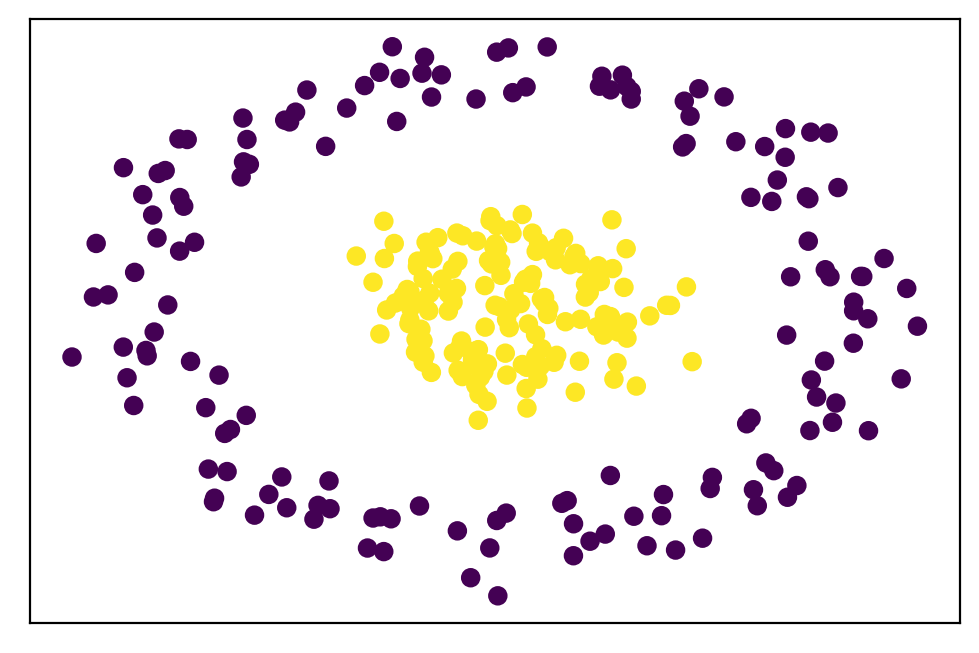

In [ ]:
from sklearn import datasets

plt.figure(dpi=200)
plt.yticks([])
plt.xticks([])
X, y = datasets.make_circles(300, noise=0.1, factor=0.25, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y)

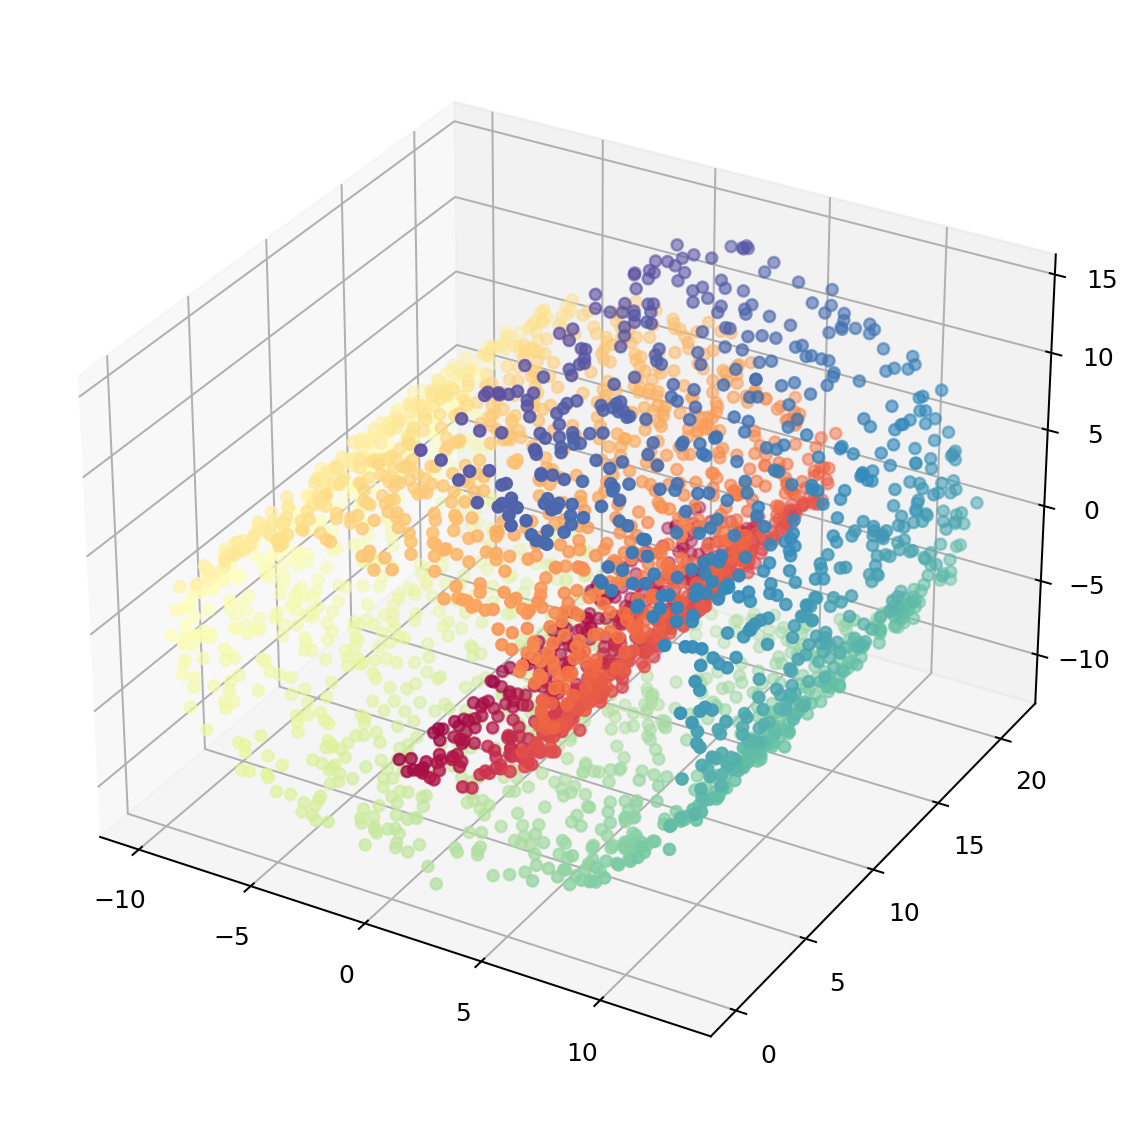

In [ ]:
# generate a nonlinearly seperable data in the shape of a swiss roll
# 3-dimensions
swiss_roll, color = datasets.make_swiss_roll(n_samples=3000, noise=0.2, random_state=42)
fig = plt.figure(figsize=(8, 8), dpi=180)

# visualize
ax = fig.add_subplot(projection="3d")
ax.scatter(swiss_roll[:, 0], swiss_roll[:, 1], swiss_roll[:, 2], c=color, cmap=plt.cm.Spectral)

In [ ]:
from sklearn.manifold import TSNE
embedding = TSNE(n_components=2, perplexity=40) 
X_transformed = embedding.fit_transform(swiss_roll)

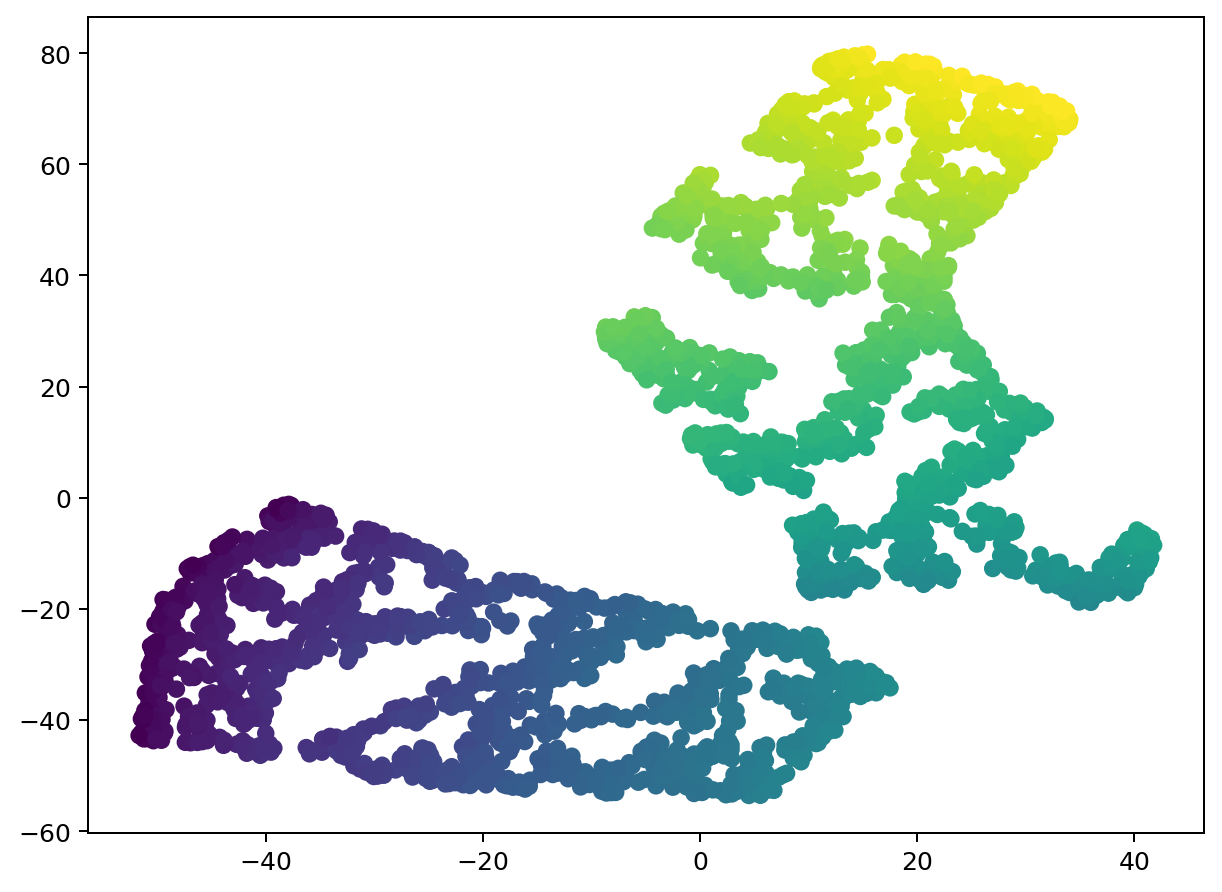

In [ ]:
plt.figure(figsize=(8, 6), dpi=180)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=color)

### Linear Discriminant Analysis

In [ ]:
# Dummy Dataset where the goal to predict diagnosis of breast cancer
from sklearn.datasets import load_breast_cancer
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# standarization
from sklearn.preprocessing import StandardScaler

breast_cancer = load_breast_cancer()
breast_cancer = pd.DataFrame(data=np.concatenate([breast_cancer["data"], breast_cancer["target"].reshape(-1, 1)], axis=1), 
                             columns=np.append(breast_cancer["feature_names"],"diagnostic"))

# standarize
scaler = StandardScaler()
breast_cancer_scaled = scaler.fit_transform(breast_cancer.drop("diagnostic", axis=1))
# the data originally have 30 features, for visualization purposes later on, 
# we're only going to keep 2 principal components
lda = LinearDiscriminantAnalysis(n_components=1)
# transform on features
new_data = lda.fit_transform(breast_cancer_scaled, breast_cancer["diagnostic"])
# reconstruct dataframe
new_data = pd.DataFrame(new_data, columns=[f"LDA{i+1}" for i in range(new_data.shape[1])])
new_data["diagnostic"] = breast_cancer["diagnostic"]

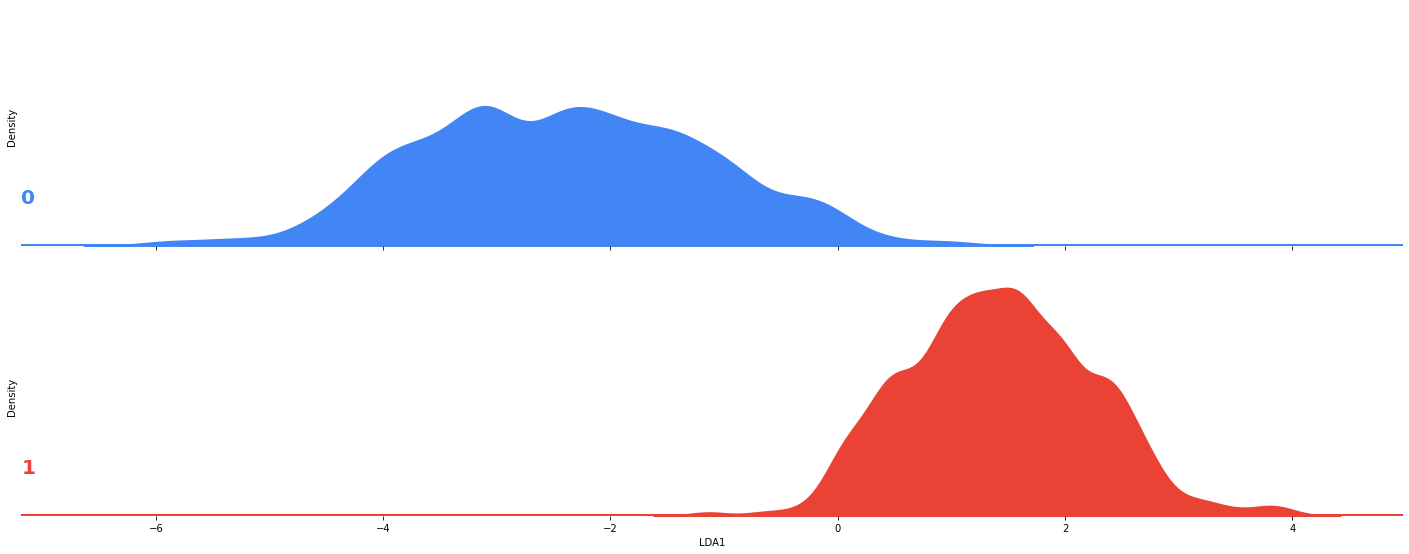

In [ ]:
g = sns.FacetGrid(new_data, #the dataframe to pull from
                  row="diagnostic", #define the column for each subplot row to be differentiated by
                  hue="diagnostic", #define the column for each subplot color to be differentiated by
                  aspect=5, #aspect * height = width
                  height=4, #height of each subplot
                  palette=['#4285F4','#EA4335','#FBBC05','#34A853'] #google colors
                 )
g.map(sns.kdeplot, "LDA1", shade=True, alpha=1, lw=1.5, bw_method=0.2)
g.map(plt.axhline, y=0, lw=4)

def label(x, color, label):
    ax = plt.gca() #get the axes of the current object
    ax.text(0, .2, #location of text
            int(float(label)), #text label
            fontweight="bold", color=color, size=20, #text attributes
            ha="left", va="center", #alignment specifications
            transform=ax.transAxes) #specify axes of transformation

g.map(label, "LDA1") #the function counts as a plotting object!
#prevent overlapping issues by 'removing' axis face color
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0),})
# g.fig.subplots_adjust(hspace= .25)

g.set_titles("") #set title to blank
g.set(yticks=[]) #set y ticks to blank
g.despine(bottom=True, left=True) #remove 'spines'

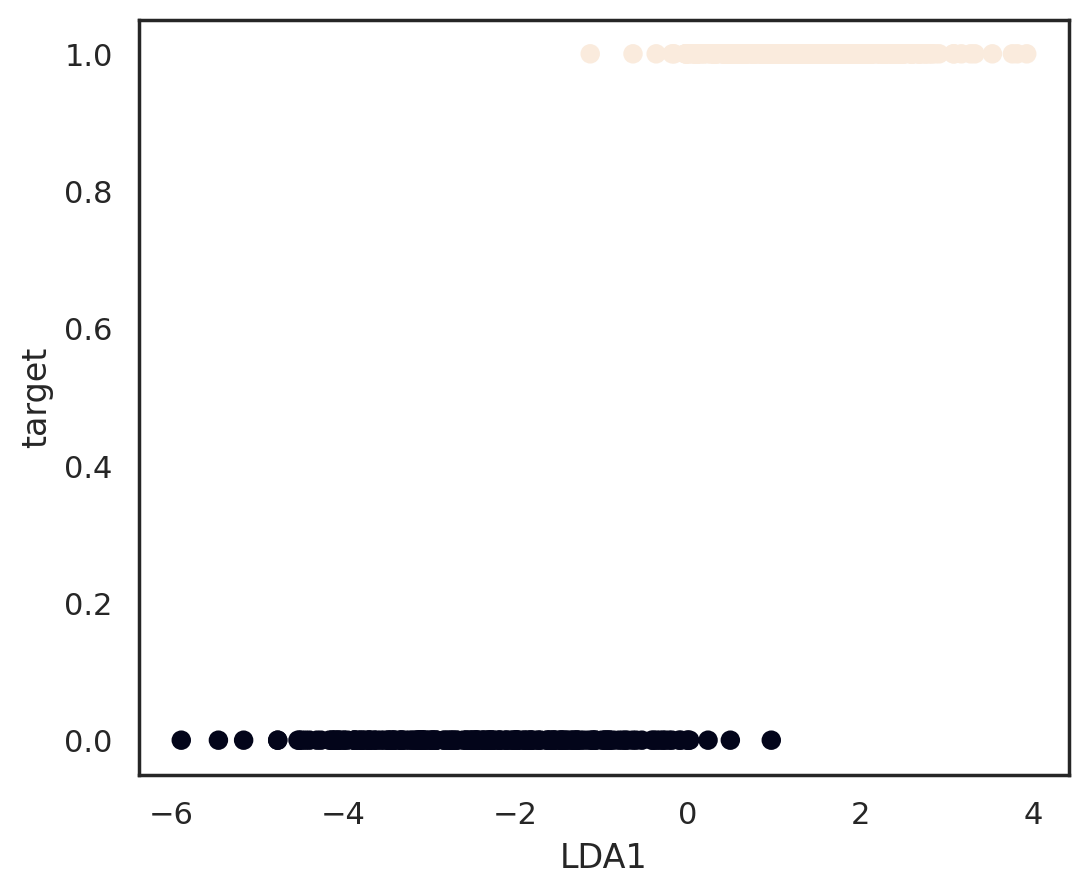

In [ ]:
plt.figure(figsize=(6, 5), dpi=200)
plt.xlabel("LDA1")
plt.ylabel("target")
plt.scatter(new_data.LDA1, new_data.diagnostic, c=new_data.diagnostic)
plt.show()

### Statistic-Based Selection

In [ ]:
# only take first 2000 rows as the whole data is too large
gene_data = pd.read_csv("../input/cleaned-genomics-data/cleaned.csv", nrows=2000)
gene_data

Unnamed: 0  label  loc_0  loc_1  loc_2  loc_3  loc_4  loc_5  loc_6  \
0              0      7      0      0      0      1      2      0      2   
1              1      5      1      0      1      0      3      1      1   
2              2      1      1      3      1      1      3      3      1   
3              3      5      3      1      0      3      3      2      3   
4              4      6      2      1      1      3      3      0      1   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
1995        1995      9      2      0      3      0      3      0      1   
1996        1996      3      2      1      0      3      0      3      0   
1997        1997      3      2      3      0      1      1      3      2   
1998        1998      8      2      3      3      2      1      0      2   
1999        1999      9      1      1      3      1      2      2      0   

      loc_7  ...  loc_240  loc_241  loc_242  loc_243  loc_244  loc_245  \
0         3  ...        0        2        0        0        0        0   
1         3  ...        0        1        1        3        1        3   
2         0  ...        2        3        3        1        0        3   
3         1  ...        3        1        0        3        0        3   
4         3  ...        2        3        0        1        0        2   
...     ...  ...      ...      ...      ...      ...      ...      ...   
1995      0  ...        2        2        0        2        0        2   
1996      1  ...        3        3        1        1        2        2   
1997      1  ...        0        0        1        0        0        0   
1998      3  ...        3        1        2        2        3        1   
1999      1  ...        3        1        0        1        3        3   

      loc_246  loc_247  loc_248  loc_249  
0           2        2        2        2  
1           2        1        1        0  
2           0        2        3        0  
3           1        0        3        1  
4           2        2        2        0  
...       ...      ...      ...      ...  
1995        3        0        3        0  
1996        0        1        2        3  
1997        0        0        0        1  
1998        1        0        2        2  
1999        3        0        2        0  

[2000 rows x 252 columns]

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

([], [])

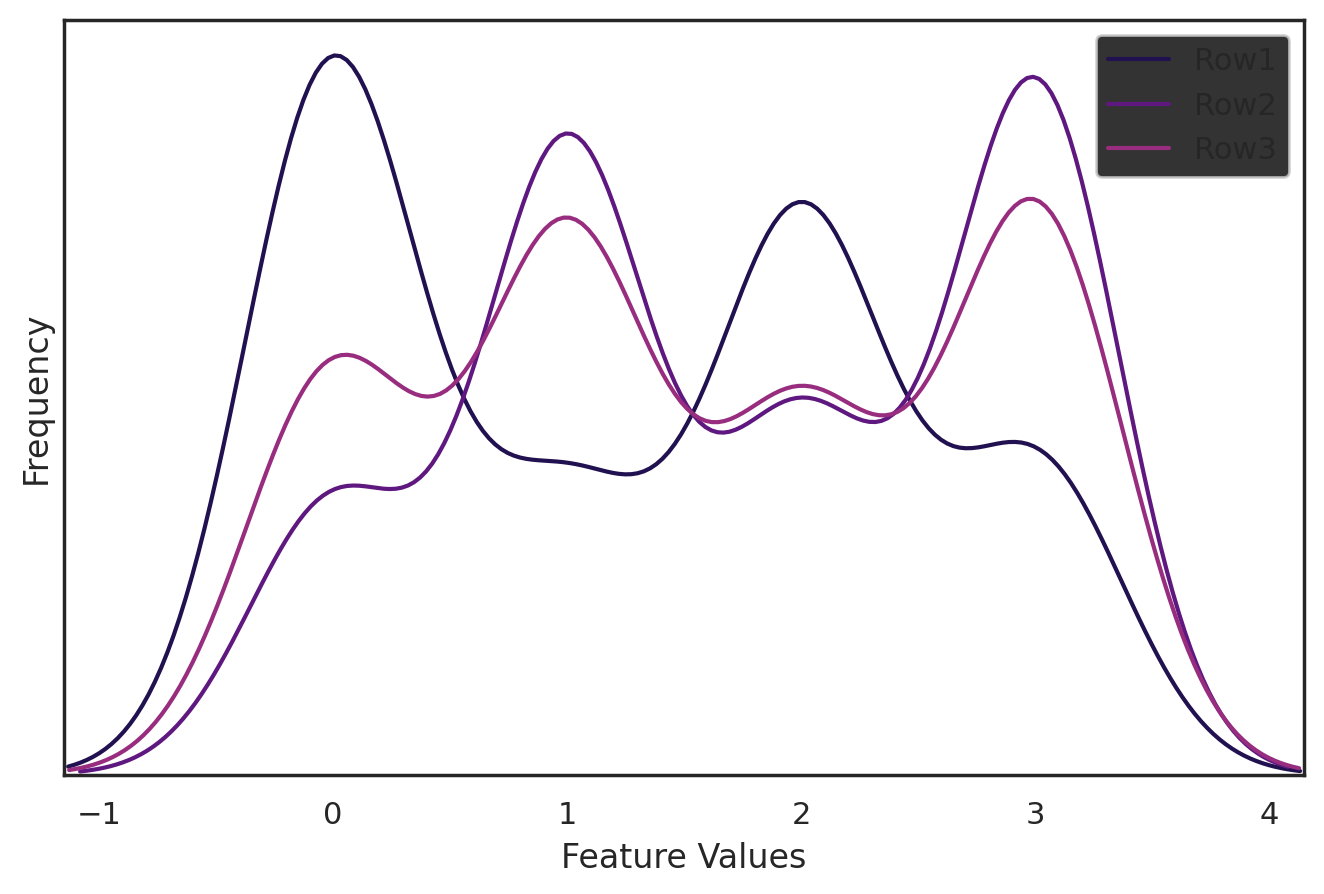

In [ ]:
# distribution of row 1
plt.figure(figsize=(8, 5), dpi=200)
sns.set_palette("magma")
sns.distplot(gene_data.drop(["Unnamed: 0", "label"], axis=1).iloc[0], hist=False, label="Row1")
sns.distplot(gene_data.drop(["Unnamed: 0", "label"], axis=1).iloc[1], hist=False, label="Row2")
sns.distplot(gene_data.drop(["Unnamed: 0", "label"], axis=1).iloc[2], hist=False, label="Row3")
plt.legend()
plt.ylabel("Frequency")
plt.xlabel("Feature Values")
plt.xlim(-1.15, 4.15)
plt.yticks([])

In [ ]:
gene_feature = gene_data.drop(["Unnamed: 0", "label"], axis=1).columns.to_list()

for stats in ["mean", "std", "kurt", "skew", "median"]:
    gene_data[f"{stats}_feat"] = getattr(gene_data[gene_feature], stats)(axis = 1)

---

## Feature Selection

### Information Gain

In [ ]:
# Train a simple Decision Tree on the Dataset without feature selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split as tts

# train test split so we can evaluate our performance on unseen test data
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=42)

# Decision Tree
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

# Predict on unseen test dataset
predictions = dt.predict(X_test)

# evaluate performance
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      0.98      0.99        52

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90



In [ ]:
from sklearn.datasets import load_wine
# load dummy dataset
wine_data = load_wine()

# get X and y
X = wine_data["data"]
y = wine_data["target"]

# Make dataframe for better interprebility
wine_data = pd.DataFrame(data=np.concatenate([X, y.reshape(-1, 1)], axis=1), columns=np.append(wine_data["feature_names"], "target"))
wine_data

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  target  
0                            3.92   1065.0     0.0  
1                            3.40   1050.0     0.0  
2                            3.17   1185.0     0.0  
3                            3.45   1480.0     0.0  
4                            2.93    735.0     0.0  
..                            ...      ...     ...  
173                          1.74    740.0     2.0  
174                          1.56    750.0     2.0  
175                          1.56    835.0     2.0  
176                          1.62    840.0     2.0  
177                          1.60    560.0     2.0  

[178 rows x 14 columns]

In [ ]:
# Train a simple decision tree on the dataset without feature selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split as tts

# train test split so we can evaluate our performance on unseen test data
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=42)

# Decision Tree
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

# Predict on unseen test dataset
predictions = dt.predict(X_test)

# evaluate performance
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.88      1.00      0.93        21
           2       1.00      0.93      0.96        14

    accuracy                           0.94        54
   macro avg       0.96      0.94      0.95        54
weighted avg       0.95      0.94      0.94        54



In [ ]:
# Already good enough performance, but can it be better with feature selection?
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# mutual info classif calculates the mutual information between two variables, aka information gain
# select K best chooses the k top features based on the feature selection method provided
# select top 11 features
X_new = SelectKBest(mutual_info_classif, k=8).fit_transform(X, y)

In [ ]:
# Decision Tree with Feature selection

# train test split so we can evaluate our performance on unseen test data
X_train, X_test, y_train, y_test = tts(X_new, y, test_size=0.3, random_state=42)

# Decision Tree
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

# Predict on unseen test dataset
predictions = dt.predict(X_test)

# evaluate performance
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

# BETTER PERFORMANCE!

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      1.00      1.00        21
           2       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



### Variance Threshold

In [ ]:
# we can perform Variance Threshold solely using Pandas

# example dataset, using patient's data to predict their breast cancer diagnostic 
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
breast_cancer = pd.DataFrame(data=np.concatenate([breast_cancer["data"], breast_cancer["target"].reshape(-1, 1)], axis=1), columns=np.append(breast_cancer["feature_names"],"diagnostic"))

# diagnostic is our target column
breast_cancer

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  diagnostic  
0                  0.2654          0.4601                  0.11890         0.0  
1                  0.1860          0.2750                  0.08902         0.0  
2                  0.2430          0.3613                  0.08758         0.0  
3                  0.2575          0.6638                  0.17300         0.0  
4                  0.1625          0.2364   

In [ ]:
# Scale the data before calculation
from sklearn.preprocessing import MinMaxScaler

# Get the name of all the features
features = load_breast_cancer()["feature_names"]

scaler = MinMaxScaler()
breast_cancer[features] = scaler.fit_transform(breast_cancer[features])

In [ ]:
# Scale the data before calculation
from sklearn.preprocessing import MinMaxScaler

# Get the name of all the features
features = load_breast_cancer()["feature_names"]

scaler = MinMaxScaler()
breast_cancer[features] = scaler.fit_transform(breast_cancer[features])

In [ ]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = tts(breast_cancer[features], breast_cancer["diagnostic"], random_state=42, test_size=0.3)

rf = DecisionTreeClassifier(max_depth=7, random_state=42)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92        63
         1.0       0.97      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



In [ ]:
# returns the variance of each column that's more than 0.02
var_list = breast_cancer[features].var() >= 0.015
var_list = var_list[var_list == True]

# Select those features from the dataset
features = var_list.index.to_list()
features

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'compactness error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points']

In [ ]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = tts(breast_cancer[features], breast_cancer["diagnostic"], random_state=42, test_size=0.3)

rf = DecisionTreeClassifier(max_depth=7, random_state=42)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94        63
         1.0       0.97      0.95      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



### Recursive Feature Elimination

In [ ]:
# internet is required to fetch dataset
from sklearn.datasets import fetch_covtype
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split as tts

# load data
forest_cover = fetch_covtype()
forest_cover = pd.DataFrame(data=np.concatenate([forest_cover["data"], forest_cover["target"].reshape(-1, 1)], axis=1))
# rename target column
forest_cover = forest_cover.rename(columns={54:"cover_type"})

In [ ]:
# feature name is from 0 to 53
features = range(54)
X_train, X_test, y_train, y_test = tts(forest_cover[features], forest_cover["cover_type"], random_state=42, test_size=0.4)

rf = RandomForestClassifier(max_depth=7, n_estimators=50, random_state=42)
rf.fit(X_train, y_train)
predictions = rf.predict_proba(X_test)
print(roc_auc_score(y_test.values, predictions, multi_class="ovr"))

0.9391709194206818


In [ ]:
# top 15 important features
feat_import = pd.DataFrame(zip(rf.feature_importances_, features), columns=["importance", "feature"]).sort_values("importance", ascending=False)
feat_import_top = feat_import[:10].reset_index(drop=True)

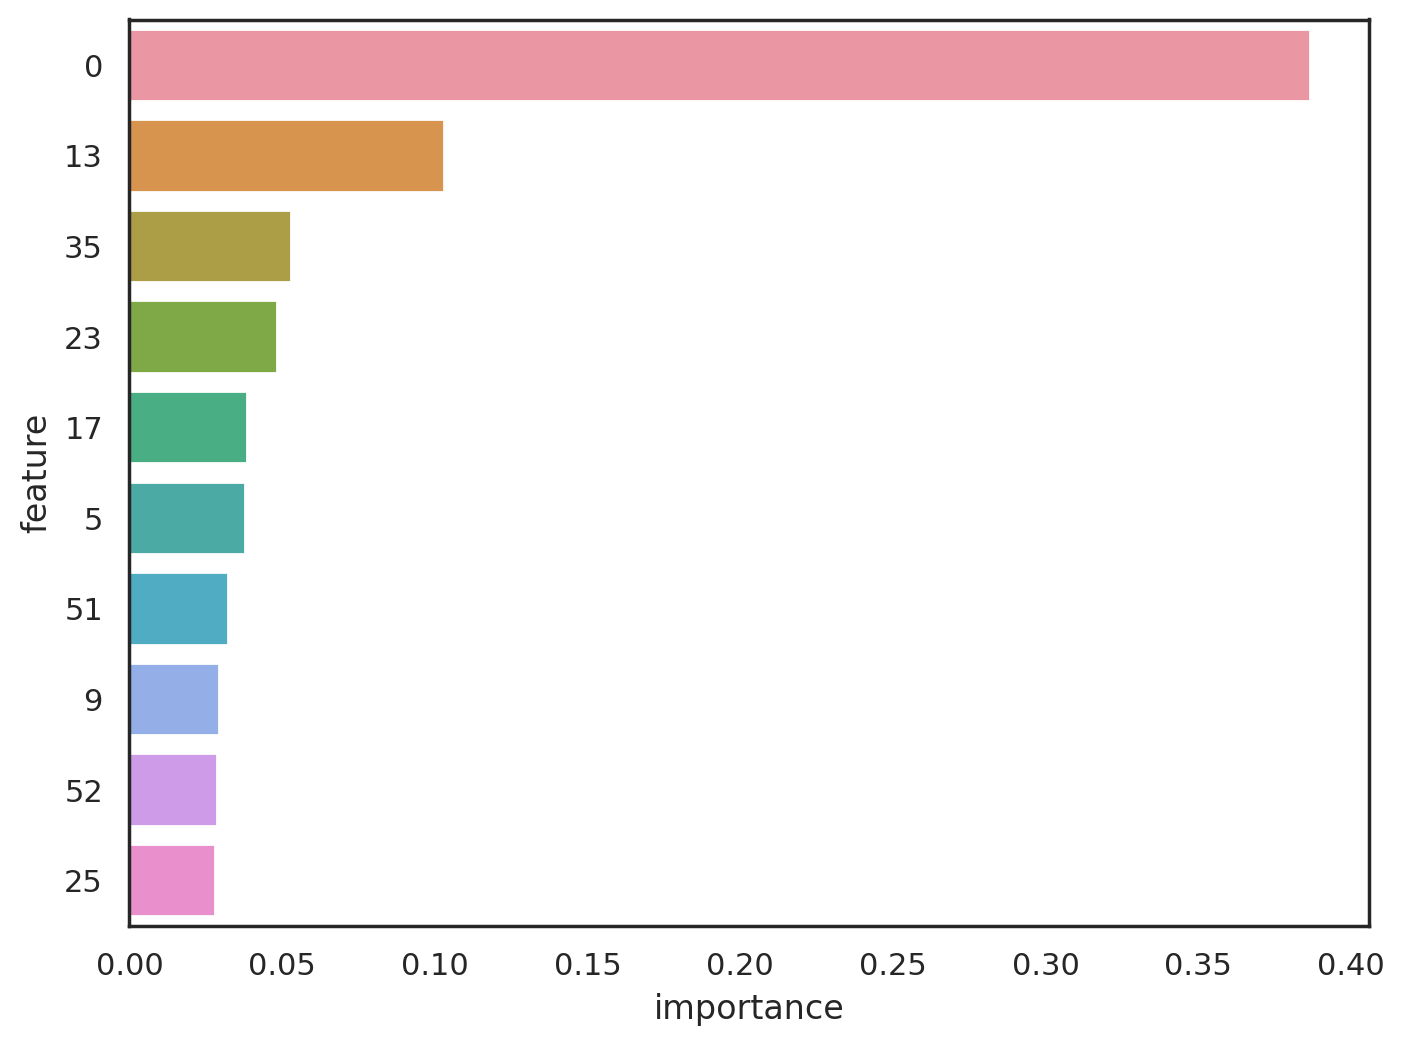

In [ ]:
# plot as bar graph
plt.figure(figsize=(8, 6), dpi=200)
sns.barplot(x=feat_import_top.importance,y=feat_import_top.feature, data=feat_import_top, orient="h", 
            order=feat_import_top["feature"])
plt.show()

In [ ]:
from sklearn.feature_selection import RFE
# select top 20 features by 3
rfe = RFE(estimator=RandomForestClassifier(max_depth=7, n_estimators=50, random_state=42), n_features_to_select=20, step=3)
rfe.fit(X_train, y_train)

# all the kept features
X_train.columns[rfe.support_]

Index([0, 1, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 17, 23, 25, 35, 36, 51, 52, 53], dtype='object')

In [ ]:
# evaluate performance with removed feature
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

In [ ]:
rf = RandomForestClassifier(max_depth=7, n_estimators=50, random_state=42)
rf.fit(X_train_rfe, y_train)
predictions = rf.predict_proba(X_test_rfe)
print(roc_auc_score(y_test.values, predictions, multi_class="ovr"))

0.941085291426437


### Permutation Importance

In [ ]:
# internet is required to fetch dataset
from sklearn.datasets import fetch_covtype
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split as tts

# load data
forest_cover = fetch_covtype()
forest_cover = pd.DataFrame(data=np.concatenate([forest_cover["data"], forest_cover["target"].reshape(-1, 1)], axis=1))
# rename target column
forest_cover = forest_cover.rename(columns={54:"cover_type"})

# feature name is from 0 to 53
features = range(54)
X_train, X_test, y_train, y_test = tts(forest_cover[features], forest_cover["cover_type"], random_state=42, test_size=0.4)

rf = RandomForestClassifier(max_depth=7, n_estimators=50, random_state=42)
rf.fit(X_train, y_train)
predictions = rf.predict_proba(X_test)
print(roc_auc_score(y_test.values, predictions, multi_class="ovr"))

0.9391709194206818


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.metrics import make_scorer

# convert metric to scorer for eli5
scocer_roc_auc = make_scorer(roc_auc_score, needs_proba=True, multi_class="ovr")
perm = PermutationImportance(rf, scoring=scocer_roc_auc,random_state=42).fit(X_test, y_test)

<AxesSubplot:xlabel='importance', ylabel='feature'>

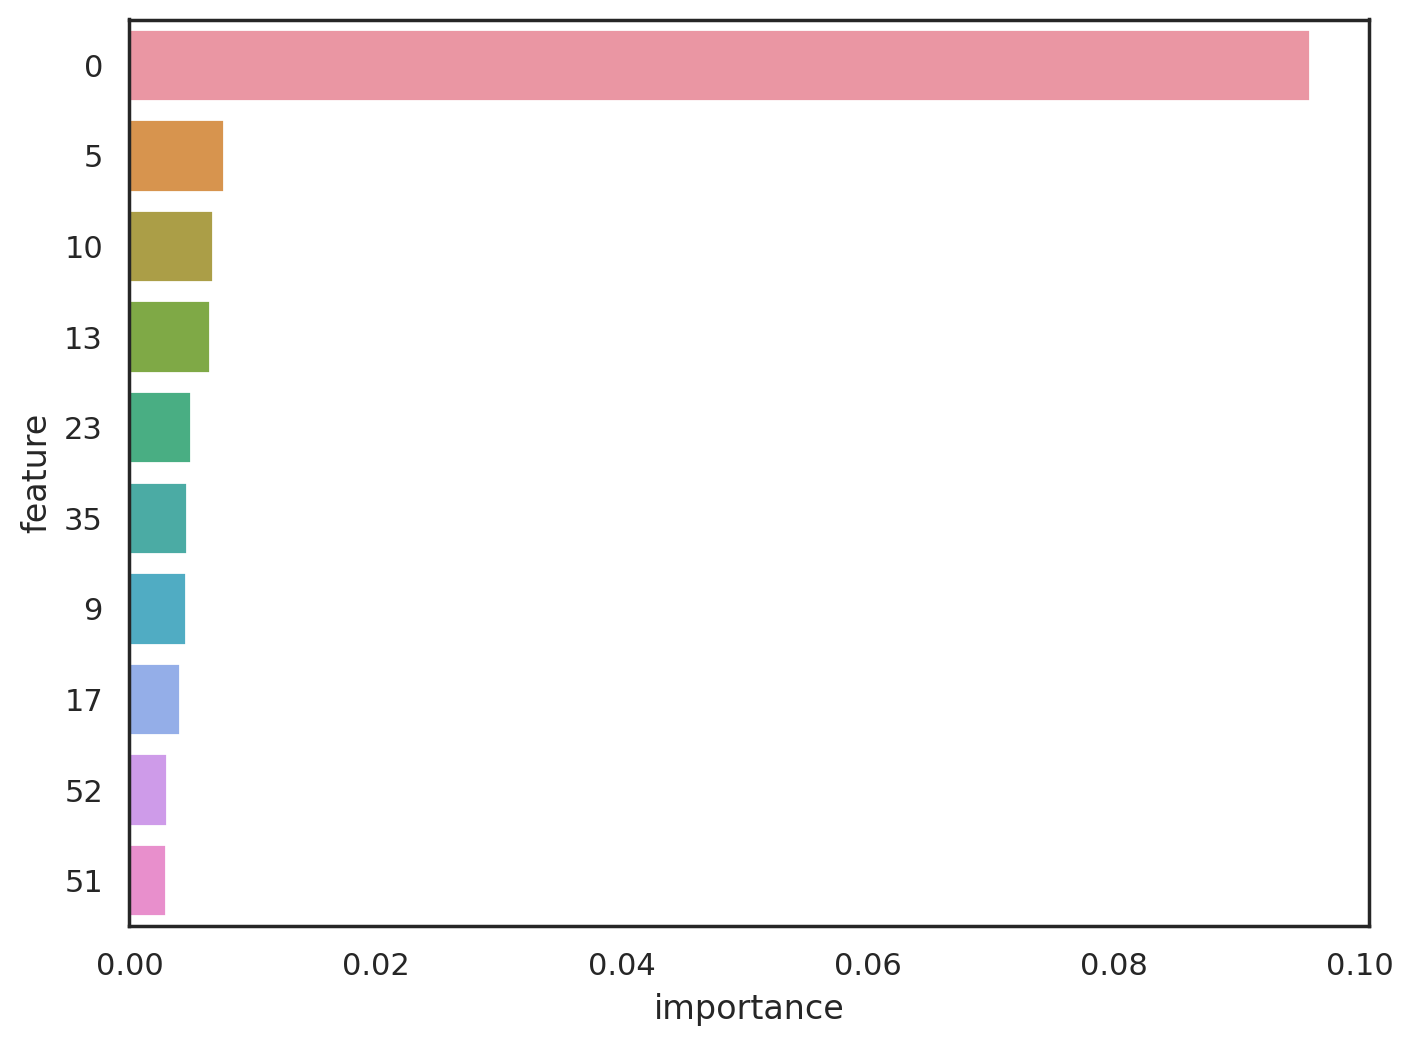

In [ ]:
# top 15 important features
feat_import = pd.DataFrame(zip(perm.feature_importances_, features), columns=["importance", "feature"]).sort_values("importance", ascending=False)
feat_import_top = feat_import[:10].reset_index(drop=True)
# plot as bar graph
plt.figure(figsize=(8, 6), dpi=200)
sns.barplot(x=feat_import_top.importance,y=feat_import_top.feature, data=feat_import_top, orient="h", 
            order=feat_import_top["feature"])

In [ ]:
# retrain model with top 20 features
rf = RandomForestClassifier(max_depth=7, n_estimators=50, random_state=42)
X_train_permu = X_train[feat_import[:20]["feature"].values]
X_test_permu = X_test[feat_import[:20]["feature"].values]

rf.fit(X_train_permu, y_train)
predictions = rf.predict_proba(X_test_permu)
print(roc_auc_score(y_test.values, predictions, multi_class="ovr"))

0.9416695122695309


### LASSO Coefficient Selection

In [ ]:
# internet is required to fetch dataset
from sklearn.datasets import fetch_covtype
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split as tts

# load data
forest_cover = fetch_covtype()
forest_cover = pd.DataFrame(data=np.concatenate([forest_cover["data"], forest_cover["target"].reshape(-1, 1)], axis=1))
# rename target column
forest_cover = forest_cover.rename(columns={54:"cover_type"})

# feature name is from 0 to 53
features = range(54)
X_train, X_test, y_train, y_test = tts(forest_cover[features], forest_cover["cover_type"], random_state=42, test_size=0.4)

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.005)
lasso.fit(X_train, y_train)

# convert all weights to positive values, 
# feature importance
feat_import_lasso = abs(lasso.coef_)

# select features with coeffcient greater than 0
features = np.array(features)[feat_import_lasso > 0]
features

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 23, 24,
       35, 36, 37, 43, 44, 45, 46, 48, 51, 52, 53])

<AxesSubplot:xlabel='importance', ylabel='feature'>

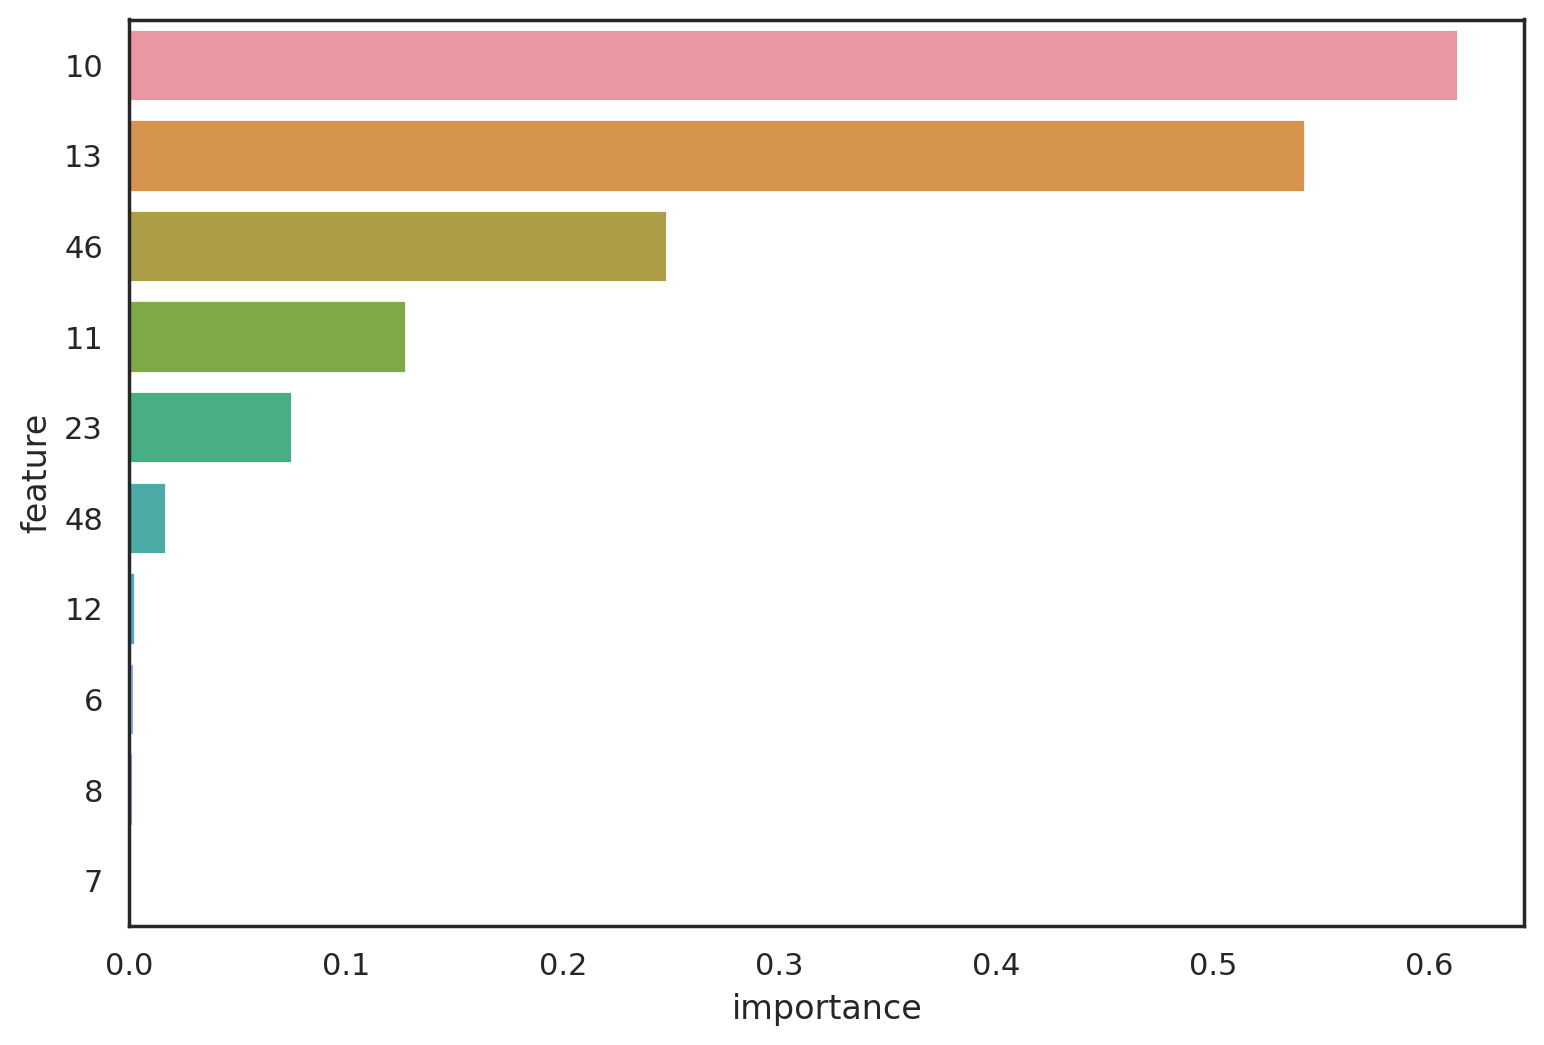

In [ ]:
# top 15 important features
feat_import = pd.DataFrame(zip(feat_import_lasso, features), columns=["importance", "feature"]).sort_values("importance", ascending=False)
feat_import_top = feat_import[:10].reset_index(drop=True)
# plot as bar graph
plt.figure(figsize=(9, 6), dpi=200)
sns.barplot(x=feat_import_top.importance,y=feat_import_top.feature, data=feat_import_top, orient="h", 
            order=feat_import_top["feature"])

In [ ]:
# retrain model with selected features
X_train, X_test, y_train, y_test = tts(forest_cover[features], forest_cover["cover_type"], random_state=42, test_size=0.4)

rf = RandomForestClassifier(max_depth=7, n_estimators=50, random_state=42)
rf.fit(X_train, y_train)
predictions = rf.predict_proba(X_test)
print(roc_auc_score(y_test.values, predictions, multi_class="ovr"))

0.9406498087559407
